## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, pdftables_api, joblib
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, PassiveAggressiveRegressor, SGDRegressor, HuberRegressor, ARDRegression, GammaRegressor, PoissonRegressor, RANSACRegressor, RidgeCV, ElasticNetCV, TweedieRegressor, QuantileRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from scipy.stats import probplot
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_regression, mutual_info_regression, SequentialFeatureSelector, RFECV

In [2]:
## Converting the dataset contained in PDF into a CSV file
# conversion = pdftables_api.Client('zf1l3ni5vlkx')
# conversion.csv('Assignment Dataset - Brandintelle - dataset.pdf','dataset.csv')

## Loading the dataset

In [3]:
df = pd.read_csv('dataset.csv',usecols=lambda x: x != 'Sr No')
df.head()

DATE        Sales  TV_Spends  OOH_Spends  Print_Spends  \
0  2015-11-23  2754371.667   167687.6           0   95463.66667   
1  2015-11-30  2584276.667   214600.9           0       0.00000   
2  2015-12-07  2547386.667        0.0      248022    3404.00000   
3  2015-12-14  2875220.000   625877.3           0  132600.00000   
4  2015-12-21  2215953.333        0.0      520005       0.00000   

   FB_Impressions  Paid_Search_Clicks  Search_Spends  competitor_sales_B  \
0    7.290385e+07             0.00000              0             8125009   
1    1.658110e+07         29511.71546          31000             7901549   
2    4.995477e+07         36132.35896          28400             8300197   
3    3.164930e+07         36804.21096          31900             8122883   
4    8.802269e+06         28401.74407          27100             7105985   

      FB_Spends  events  
0  228213.98740      na  
1   34258.57351      na  
2  127691.26130  event0  
3   84014.72031      na  
4   20687.47816      na

## Understanding the shape and structure of the dataset

In [4]:
df.shape

(208, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                208 non-null    object 
 1   Sales               208 non-null    float64
 2   TV_Spends           208 non-null    float64
 3   OOH_Spends          208 non-null    int64  
 4   Print_Spends        208 non-null    float64
 5   FB_Impressions      208 non-null    float64
 6   Paid_Search_Clicks  208 non-null    float64
 7   Search_Spends       208 non-null    int64  
 8   competitor_sales_B  208 non-null    int64  
 9   FB_Spends           208 non-null    float64
 10  events              208 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 18.0+ KB


In [6]:
df.describe()

Sales     TV_Spends     OOH_Spends   Print_Spends  \
count  2.080000e+02  2.080000e+02     208.000000     208.000000   
mean   1.822143e+06  1.113277e+05   81033.639423   27964.741987   
std    7.162286e+05  2.141877e+05  157483.924979   48623.026739   
min    6.722500e+05  0.000000e+00       0.000000       0.000000   
25%    1.165211e+06  0.000000e+00       0.000000       0.000000   
50%    1.874514e+06  0.000000e+00       0.000000       0.000000   
75%    2.378407e+06  1.380503e+05   95359.000000   35758.750002   
max    3.827520e+06  1.185349e+06  938178.000000  239417.333300   

       FB_Impressions  Paid_Search_Clicks  Search_Spends  competitor_sales_B  \
count    2.080000e+02          208.000000     208.000000        2.080000e+02   
mean     2.446024e+07        50835.620540   44366.346154        5.538025e+06   
std      3.509738e+07        40842.281019   35268.769589        2.077192e+06   
min      0.000000e+00            0.000000       0.000000        2.240235e+06   
25%      0.000000e+00        18842.053510   17650.000000        3.589581e+06   
50%      0.000000e+00        42795.757485   36050.000000        5.538524e+06   
75%      4.121226e+07        75710.530683   64025.000000        7.311814e+06   
max      1.782983e+08       156564.384600  134100.000000        9.984742e+06   

           FB_Spends  
count     208.000000  
mean    64369.734788  
std     94810.914099  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%    108690.367000  
max    462011.742200

In [7]:
df.isna().sum()

DATE                  0
Sales                 0
TV_Spends             0
OOH_Spends            0
Print_Spends          0
FB_Impressions        0
Paid_Search_Clicks    0
Search_Spends         0
competitor_sales_B    0
FB_Spends             0
events                0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Exploratory Data Analysis

### Univariate Analysis

Skewness of Sales: 0.24521570453575126
Kurtosis of Sales: -0.8304394212678265


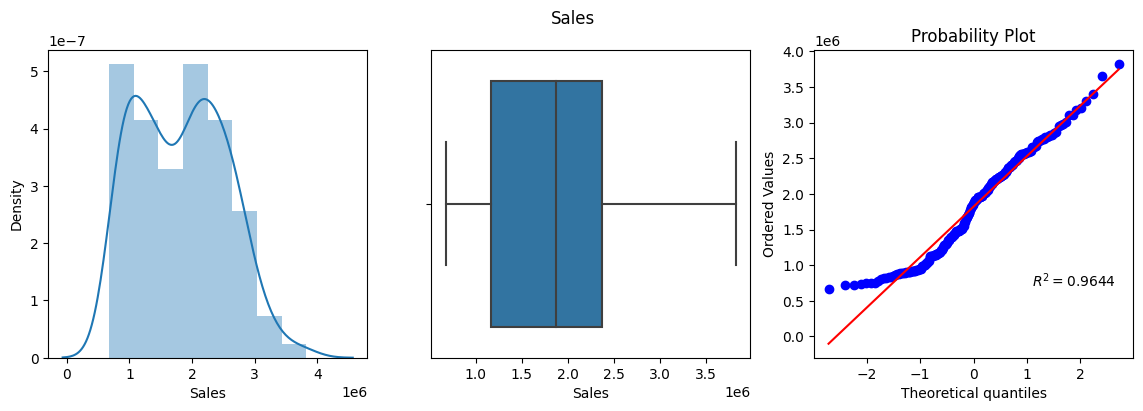

Skewness of TV_Spends: 2.777197561438994
Kurtosis of TV_Spends: 8.654882533891652


<Figure size 640x480 with 0 Axes>

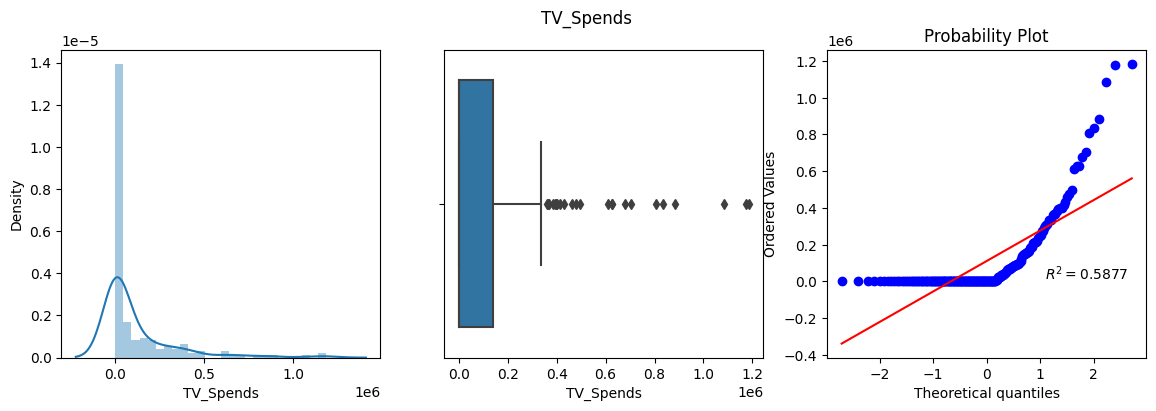

Skewness of OOH_Spends: 2.734360028555514
Kurtosis of OOH_Spends: 8.49512688926539


<Figure size 640x480 with 0 Axes>

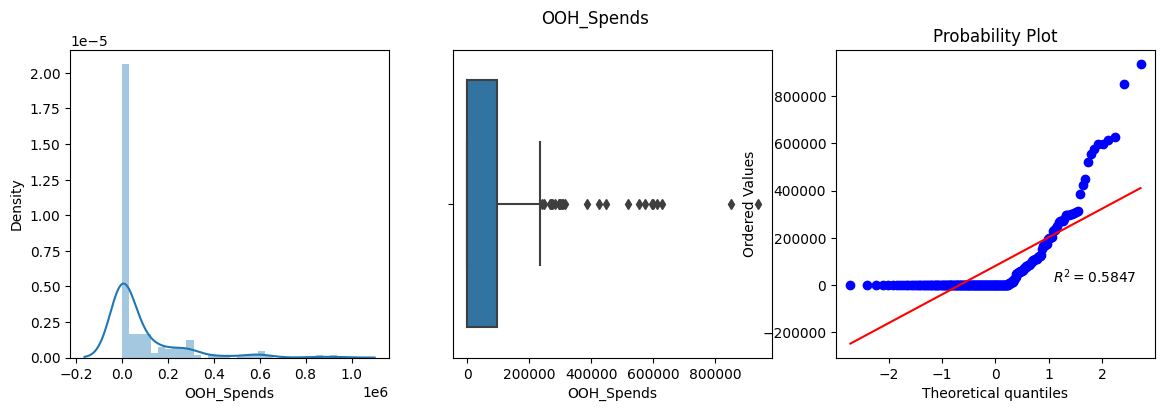

Skewness of Print_Spends: 1.99421317147676
Kurtosis of Print_Spends: 3.5619972865133294


<Figure size 640x480 with 0 Axes>

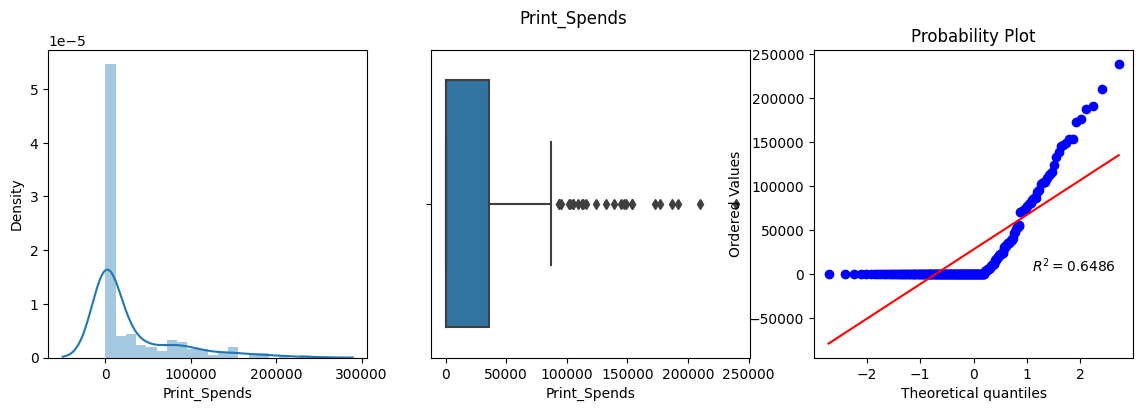

Skewness of FB_Impressions: 1.7234686121899916
Kurtosis of FB_Impressions: 3.069585631518528


<Figure size 640x480 with 0 Axes>

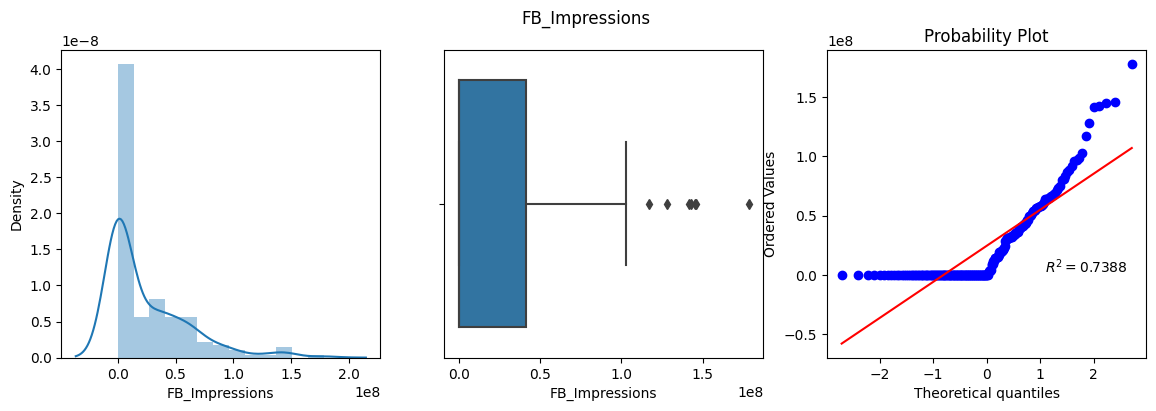

Skewness of Paid_Search_Clicks: 0.7258130394327139
Kurtosis of Paid_Search_Clicks: -0.22398466622431634


<Figure size 640x480 with 0 Axes>

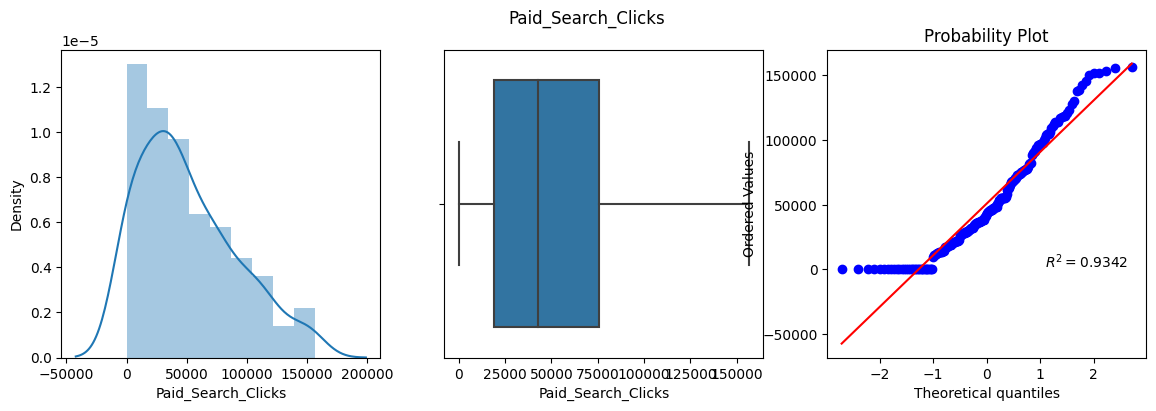

Skewness of Search_Spends: 0.6811875269813051
Kurtosis of Search_Spends: -0.4170652905772396


<Figure size 640x480 with 0 Axes>

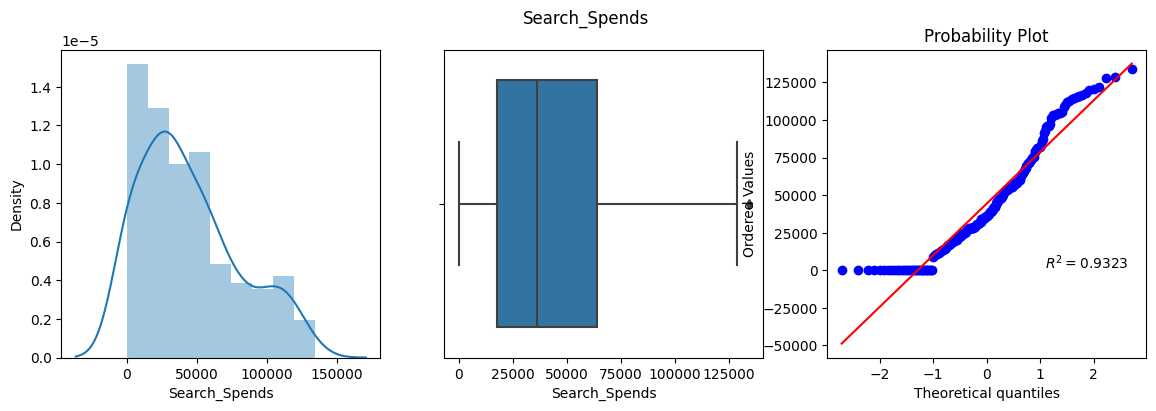

Skewness of competitor_sales_B: 0.1365815441207366
Kurtosis of competitor_sales_B: -1.2275321246206816


<Figure size 640x480 with 0 Axes>

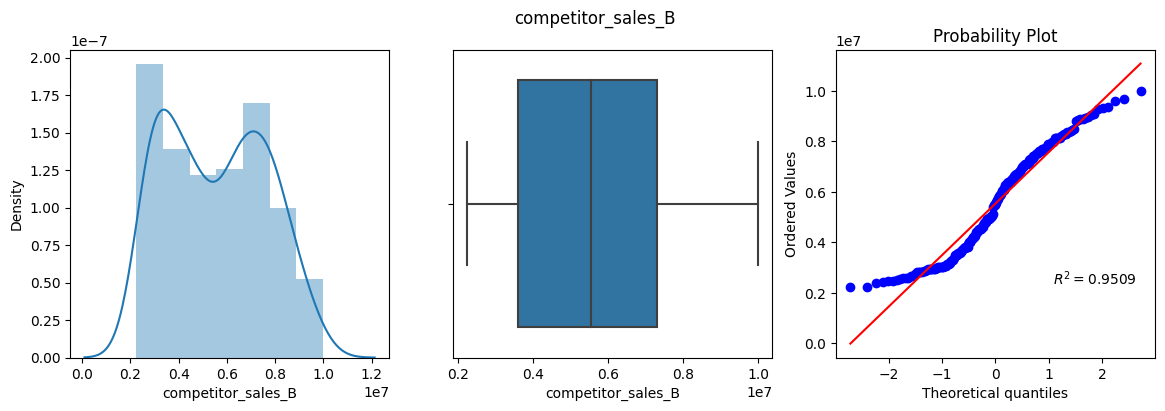

Skewness of FB_Spends: 1.7905618579405942
Kurtosis of FB_Spends: 3.3354554335296447


<Figure size 640x480 with 0 Axes>

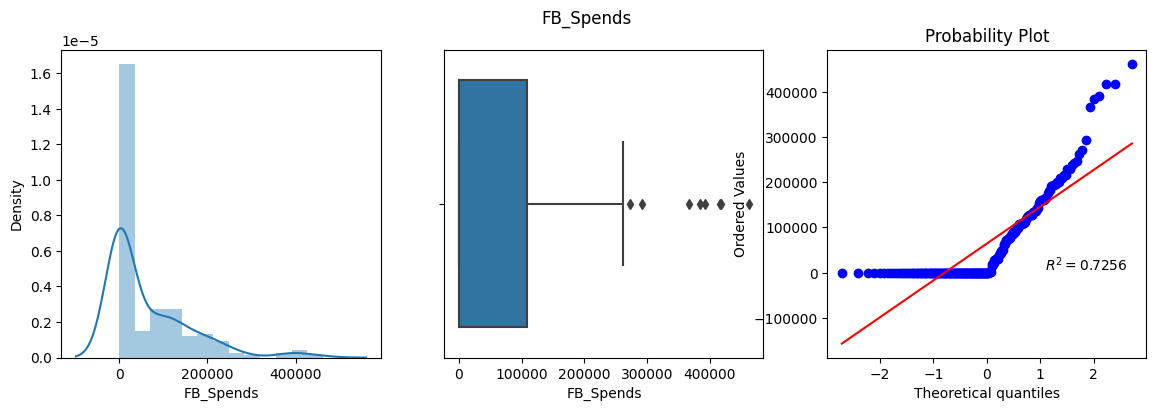

<Figure size 640x480 with 0 Axes>

In [9]:
for col in df.columns:
    if isinstance(df[col][0],np.number):
        print(f"Skewness of {col}:",df[col].skew())
        print(f"Kurtosis of {col}:",df[col].kurtosis())
        plt.figure(figsize=(14,4))
        plt.subplot(131)
        sns.distplot(df[col])
        plt.subplot(132)
        sns.boxplot(df[col])
        plt.subplot(133)
        probplot(df[col],rvalue=True,plot=plt,dist='norm')
        plt.suptitle(col)
        plt.show()
        plt.tight_layout()

The features "TV_Spends", "OOH_Spends", "Print_Spends", "FB_Impressions" and "FB_Spends" have highly right-skewed distributions due to the presence of outliers.

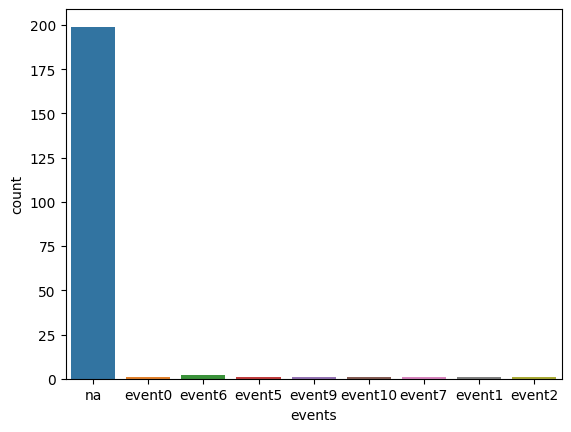

In [10]:
sns.countplot(df.events);

### Bivariate Analysis

In [11]:
df.corr()['Sales'].sort_values(ascending=False)[1:]

competitor_sales_B    0.916454
Search_Spends         0.442774
Paid_Search_Clicks    0.427513
TV_Spends             0.419869
FB_Spends             0.317594
FB_Impressions        0.315126
Print_Spends          0.230415
OOH_Spends            0.095279
Name: Sales, dtype: float64

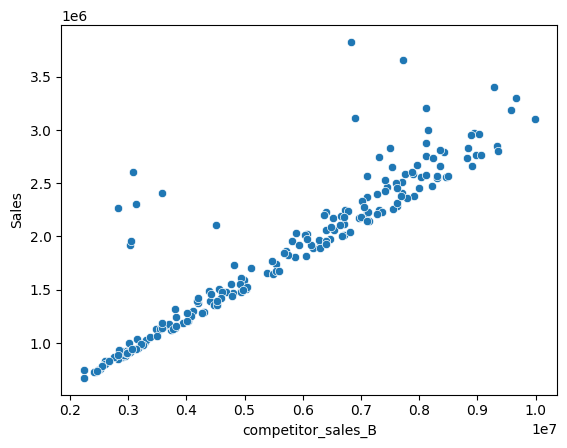

In [12]:
sns.scatterplot(x='competitor_sales_B',y='Sales',data=df);

There is a substantially high correlation between competitor sales and the local sales.

In [13]:
df.DATE = pd.to_datetime(df.DATE,errors='coerce')

In [14]:
df['month'] = df.DATE.dt.month_name()
df['day'] = df.DATE.dt.day_name()
df['year'] = df.DATE.dt.year
df['hour'] = df.DATE.dt.hour
df['daysinmonth'] = df.DATE.dt.daysinmonth
df['dayofweek'] = df.DATE.dt.dayofweek

In [15]:
df.describe()

Sales     TV_Spends     OOH_Spends   Print_Spends  \
count  2.080000e+02  2.080000e+02     208.000000     208.000000   
mean   1.822143e+06  1.113277e+05   81033.639423   27964.741987   
std    7.162286e+05  2.141877e+05  157483.924979   48623.026739   
min    6.722500e+05  0.000000e+00       0.000000       0.000000   
25%    1.165211e+06  0.000000e+00       0.000000       0.000000   
50%    1.874514e+06  0.000000e+00       0.000000       0.000000   
75%    2.378407e+06  1.380503e+05   95359.000000   35758.750002   
max    3.827520e+06  1.185349e+06  938178.000000  239417.333300   

       FB_Impressions  Paid_Search_Clicks  Search_Spends  competitor_sales_B  \
count    2.080000e+02          208.000000     208.000000        2.080000e+02   
mean     2.446024e+07        50835.620540   44366.346154        5.538025e+06   
std      3.509738e+07        40842.281019   35268.769589        2.077192e+06   
min      0.000000e+00            0.000000       0.000000        2.240235e+06   
25%      0.000000e+00        18842.053510   17650.000000        3.589581e+06   
50%      0.000000e+00        42795.757485   36050.000000        5.538524e+06   
75%      4.121226e+07        75710.530683   64025.000000        7.311814e+06   
max      1.782983e+08       156564.384600  134100.000000        9.984742e+06   

           FB_Spends         year   hour  daysinmonth  dayofweek  
count     208.000000   208.000000  208.0   208.000000      208.0  
mean    64369.734788  2017.379808    0.0    30.456731        0.0  
std     94810.914099     1.160949    0.0     0.803406        0.0  
min         0.000000  2015.000000    0.0    28.000000        0.0  
25%         0.000000  2016.000000    0.0    30.000000        0.0  
50%         0.000000  2017.000000    0.0    31.000000        0.0  
75%    108690.367000  2018.000000    0.0    31.000000        0.0  
max    462011.742200  2019.000000    0.0    31.000000        0.0

In [16]:
df.drop(['hour','dayofweek'],axis=1,inplace=True) # Since the variance of these features is 0, so they are completely irrelevant from the analysis and modeling perspective

In [17]:
df['Cost'] = df.TV_Spends + df.OOH_Spends + df.Print_Spends + df.Search_Spends + df.FB_Spends
df['Revenue'] = df.Sales - df.Cost
df.Revenue = df.Revenue.apply(abs)
df['CPM'] = (df.FB_Spends / df.FB_Impressions) * 1000 # Cost Per Thousand Impressions
df['CPC'] = df.Search_Spends / df.Paid_Search_Clicks # Cost Per Click
df['CPS'] = df.Cost / df.Sales # Cost Per Sale
df['ROI'] = (df.Revenue - df.Cost) / (df.Cost+0.0000001) * 100 # Return on Investment

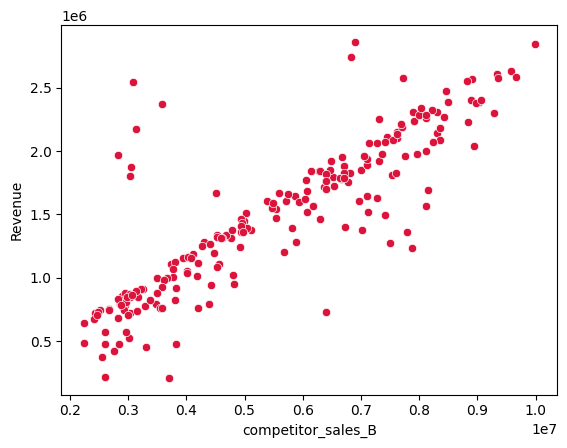

In [18]:
sns.scatterplot(x='competitor_sales_B',y='Revenue',data=df,color='crimson');

There is a significant positive correlation between total revenue and competitor sales. 

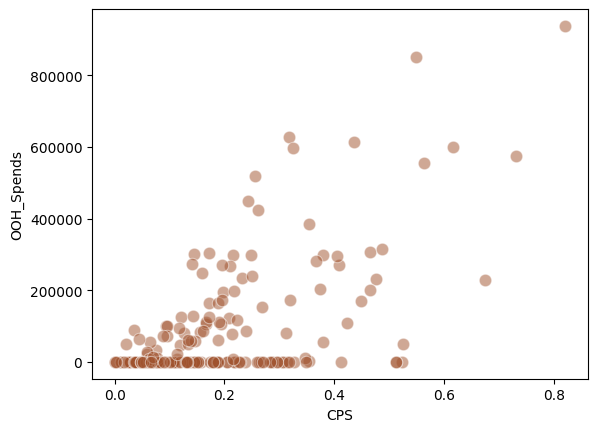

In [19]:
sns.scatterplot(x='CPS',y='OOH_Spends',data=df,color='sienna',s=80,alpha=0.5);

There is a strong positive correlation between spends on Outdoor medium and Cost per Sale.

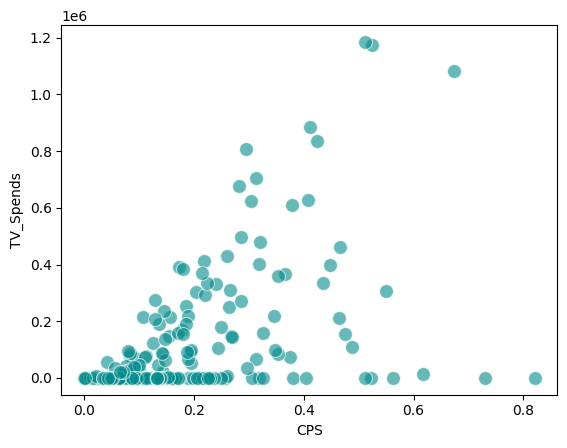

In [20]:
sns.scatterplot(x='CPS',y='TV_Spends',data=df,s=100,alpha=0.6,color='darkcyan');

There is a strong positive correlation between TV_Spends and Cost Per Sale. Cost per Sale can be minimized by lowering the TV spends.

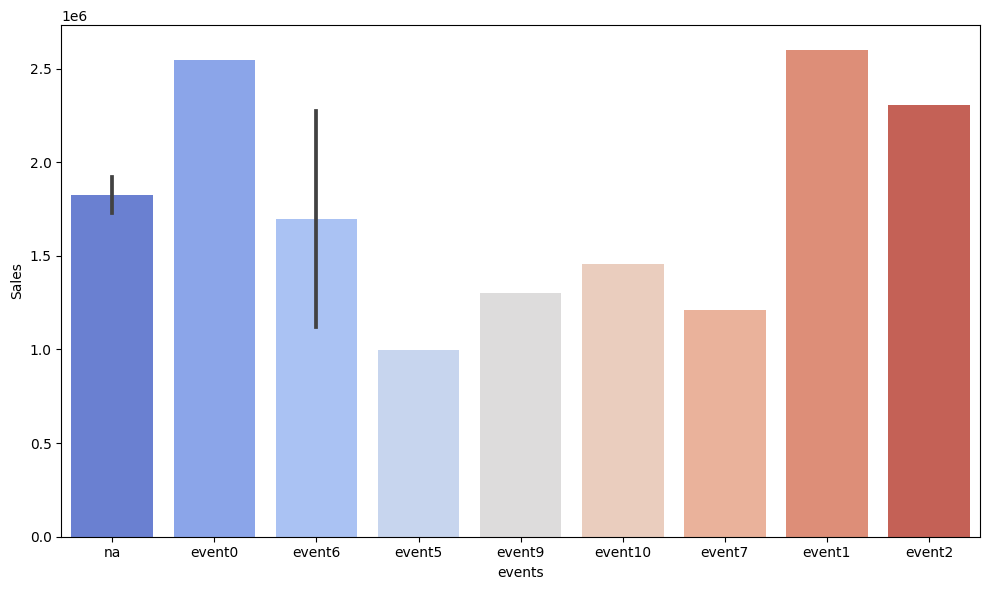

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='events',y='Sales',data=df,palette='coolwarm')
plt.tight_layout();

Event 1 generates the maximum sales whereas event 5 generates the least sales. Moreover, event 0 generates really high sales, less than only event 1. Event 1 and event 0 must be conducted as many times as possible throughout the marketing campaigns to enhance the overall sales.

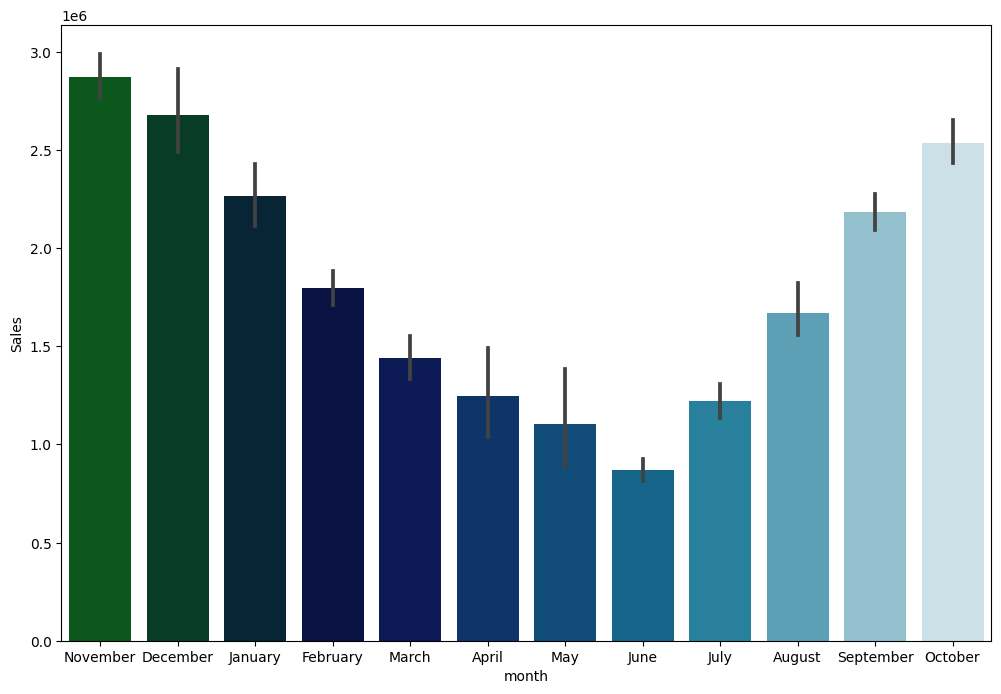

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x='month',y='Sales',data=df,palette='ocean');

The highest amount of sales are obtained during the final quarter of a year, in the months of October, November and December. A potential reason may be the festive shopping season when people do a lot of shopping due to reasonable discounts and affordable prices. On the other hand, the summer months of April, May and June generate the lowest amount of sales.

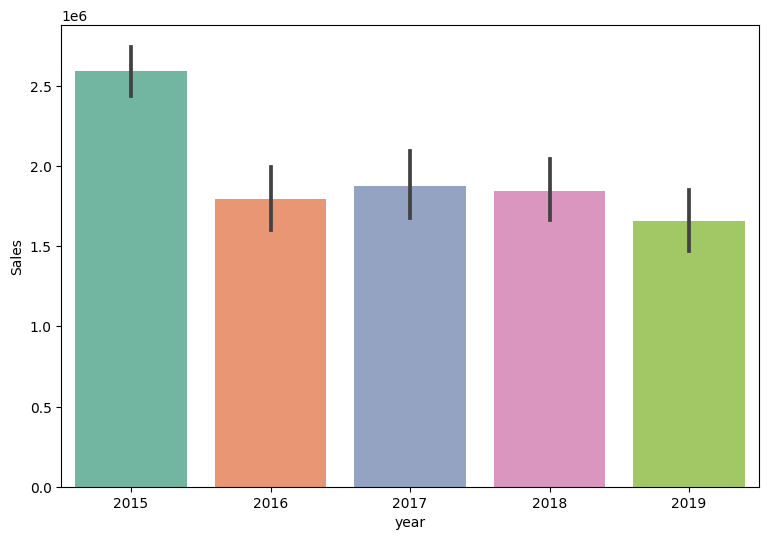

In [23]:
plt.figure(figsize=(9,6))
sns.barplot(x='year',y='Sales',data=df,palette='Set2');

The year of 2015 recorded the largest sales while the years of 2016 and 2019 observed the lowest sales.

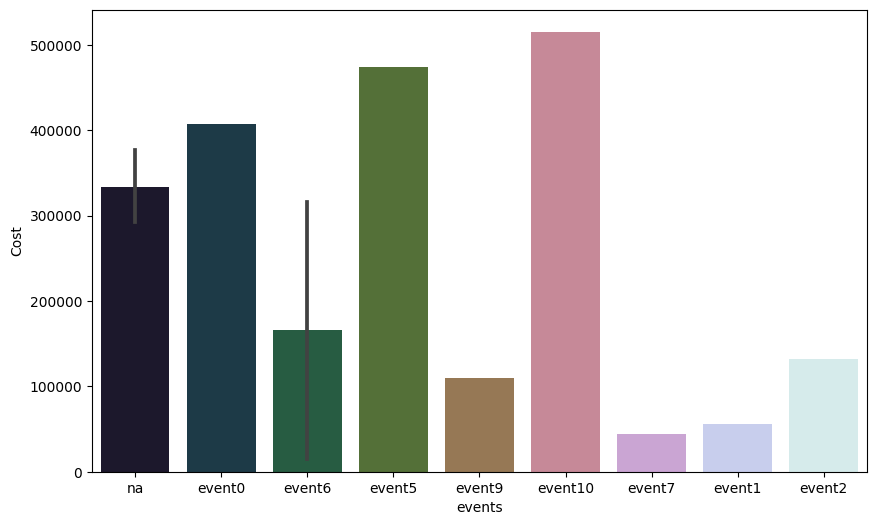

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='events',y='Cost',data=df,palette='cubehelix');

The highest amount was spent in event 10 whereas the lowest amount was expended in event 7.

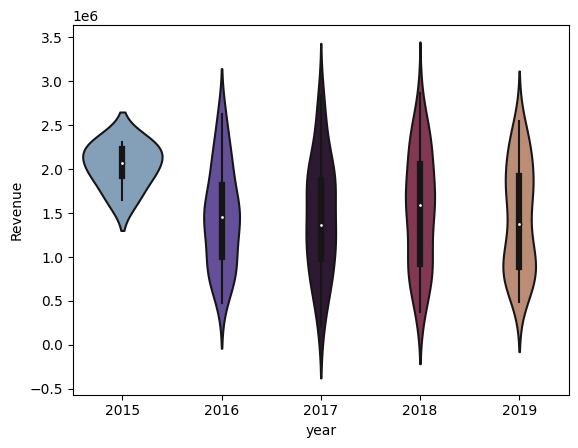

In [25]:
sns.violinplot(x='year',y='Revenue',data=df,palette='twilight');

The year 2015 generated the most revenue whereas 2017 and 2019 were the least profitable years.

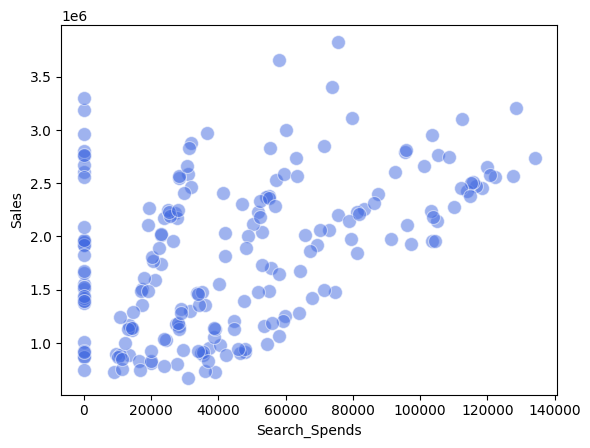

In [26]:
sns.scatterplot(x='Search_Spends',y='Sales',data=df,color='royalblue',s=100,alpha=0.5);

There is a mild positive correlation between spendings done on getting the paid advertisements on the search results and sales i.e. more the amount spent on the paid search results, more will be the total sales.

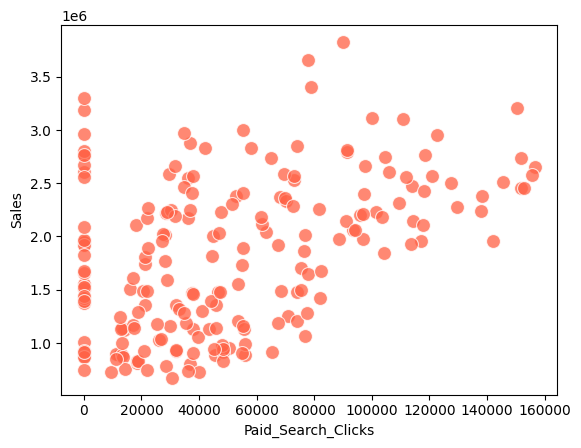

In [27]:
sns.scatterplot(x='Paid_Search_Clicks',y='Sales',data=df,color='tomato',s=100,alpha=0.76);

There is a mild positive correlation between sales and the number of user clicks on the paid advertisements posted on the search results i.e. more the user clicks on the paid search results, more will be the gross sales.

### Multivariate Analysis

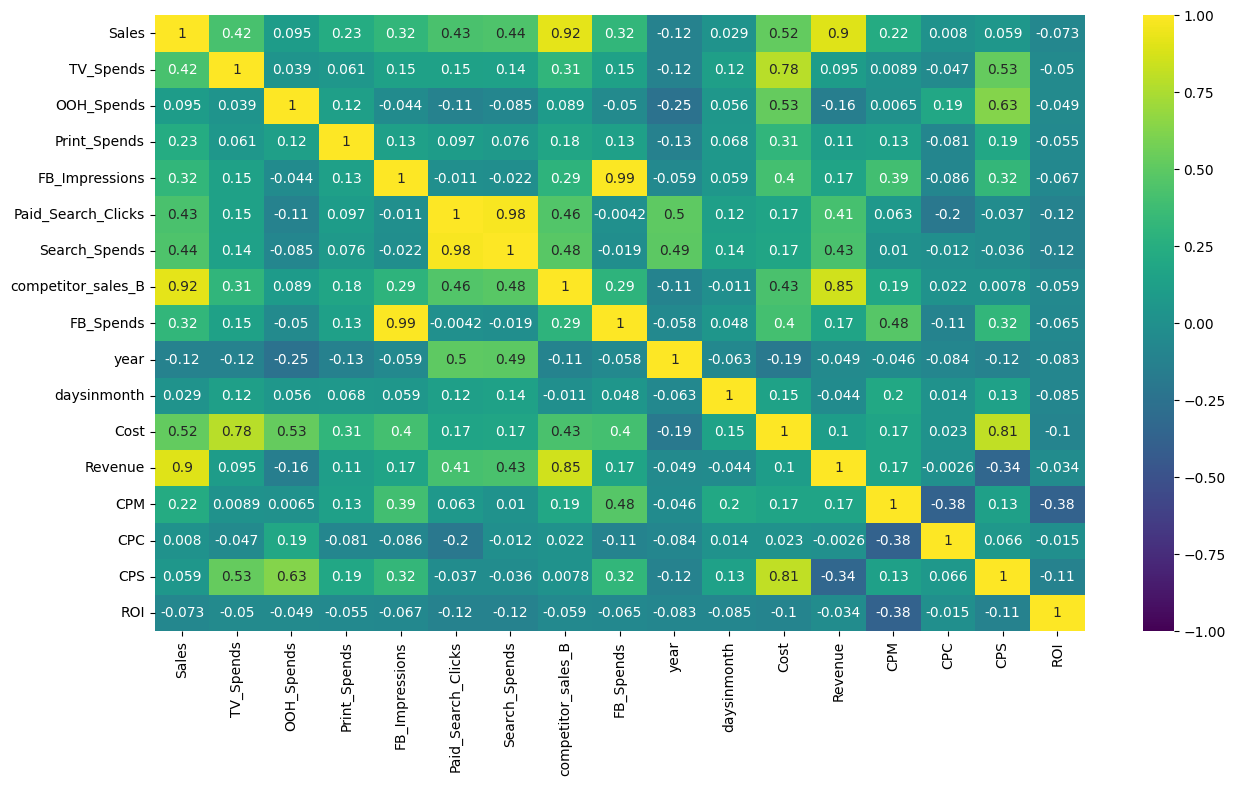

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1.0,vmax=1.0);

There is a perfect positive correlation between the features "FB_impressions" and "FB_Spends" i.e. more the spendings done on the FB advertisements, more will be the total number of user impressions. In addition, there is an almost perfect positive correlation between the features "Paid_Search_Clicks" and "Search_Spends" i.e. more the spendings done on the paid advertisements to place them in the search results, more will be the number of clicks.

There is a mild positive correlation between competitor sales and the spendings done on paid advertisements to get them on the search results as well as number of user clicks on the paid advertisements.

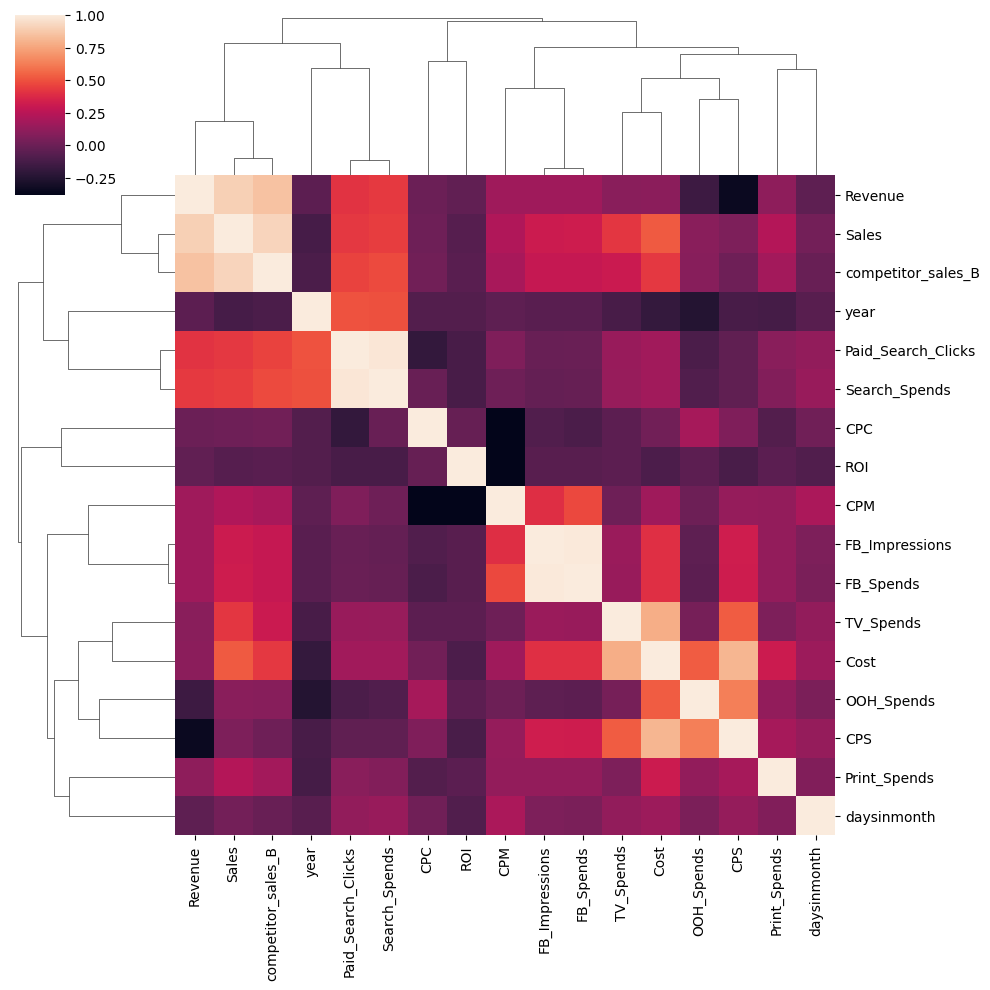

In [29]:
sns.clustermap(df.corr());

## Feature Engineering

### Feature Transformation

Skewness of Sales: 0.24521570453575126
Kurtosis of Sales: -0.8304394212678265


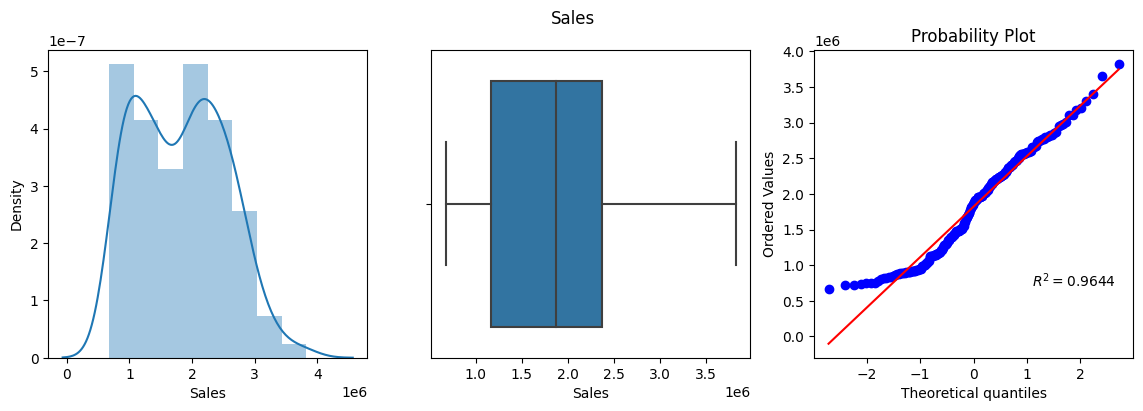

Skewness of TV_Spends: 2.777197561438994
Kurtosis of TV_Spends: 8.654882533891652


<Figure size 640x480 with 0 Axes>

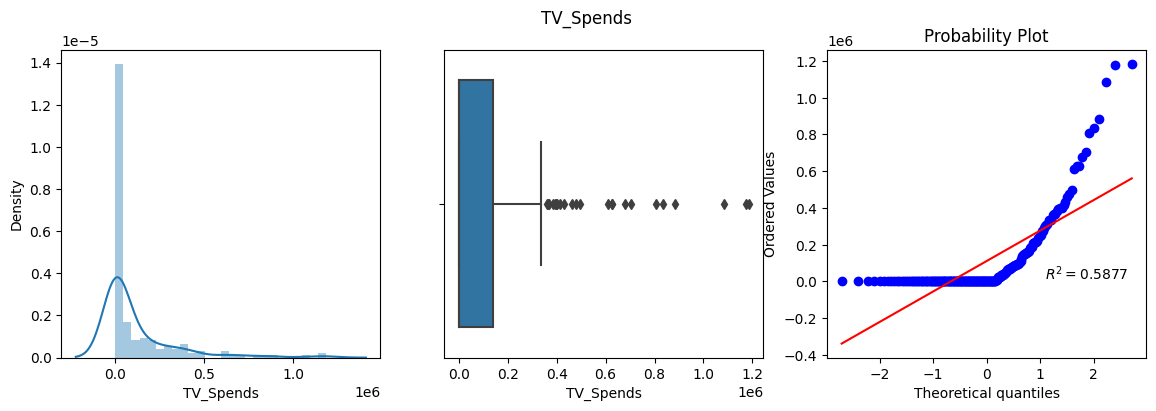

Skewness of OOH_Spends: 2.734360028555514
Kurtosis of OOH_Spends: 8.49512688926539


<Figure size 640x480 with 0 Axes>

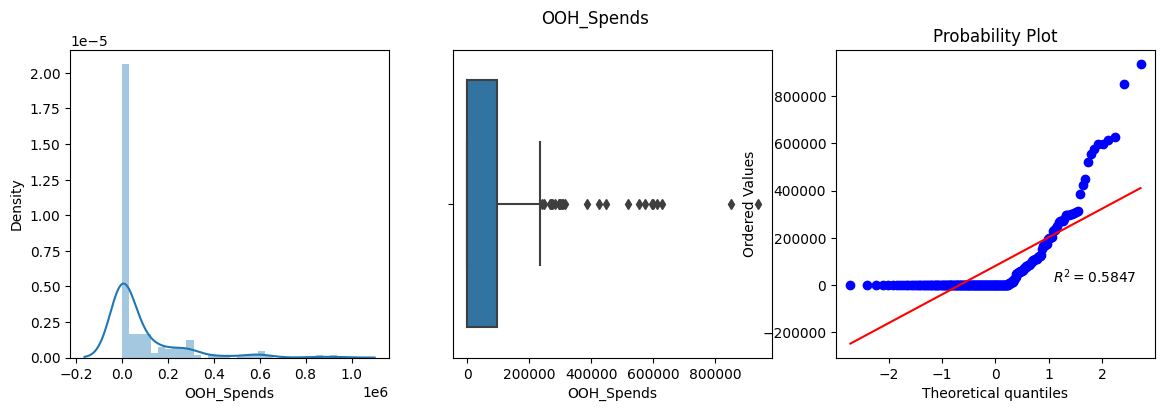

Skewness of Print_Spends: 1.99421317147676
Kurtosis of Print_Spends: 3.5619972865133294


<Figure size 640x480 with 0 Axes>

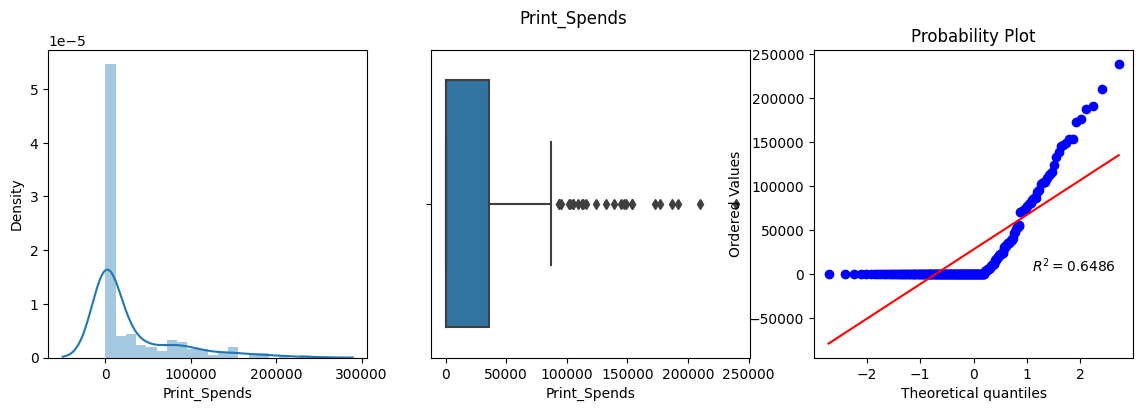

Skewness of FB_Impressions: 1.7234686121899916
Kurtosis of FB_Impressions: 3.069585631518528


<Figure size 640x480 with 0 Axes>

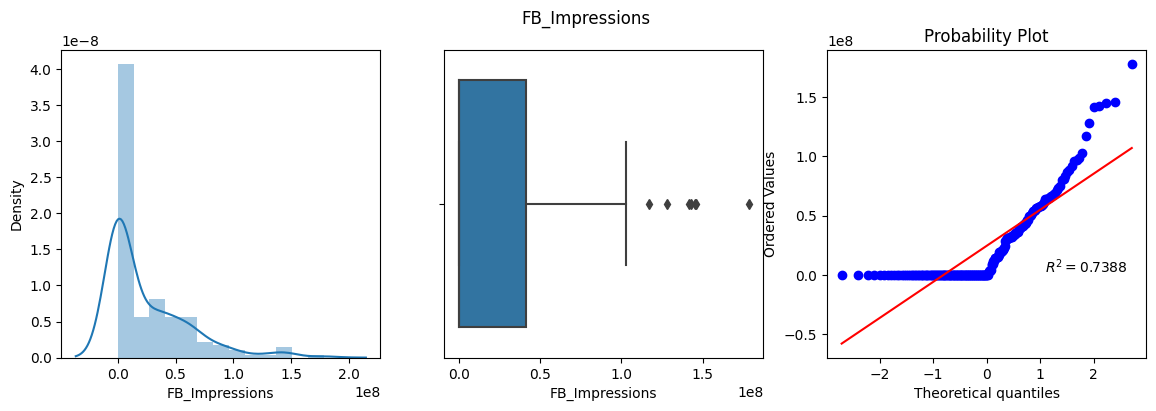

Skewness of Paid_Search_Clicks: 0.7258130394327139
Kurtosis of Paid_Search_Clicks: -0.22398466622431634


<Figure size 640x480 with 0 Axes>

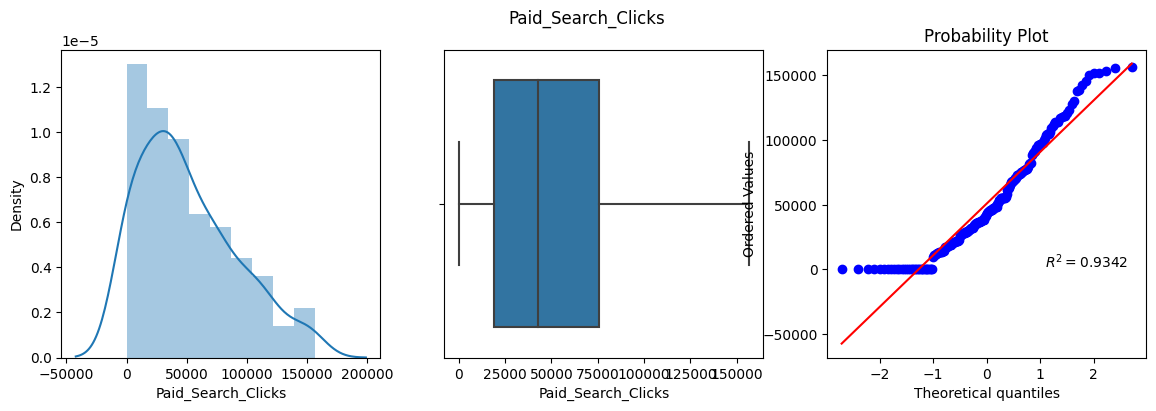

Skewness of Search_Spends: 0.6811875269813051
Kurtosis of Search_Spends: -0.4170652905772396


<Figure size 640x480 with 0 Axes>

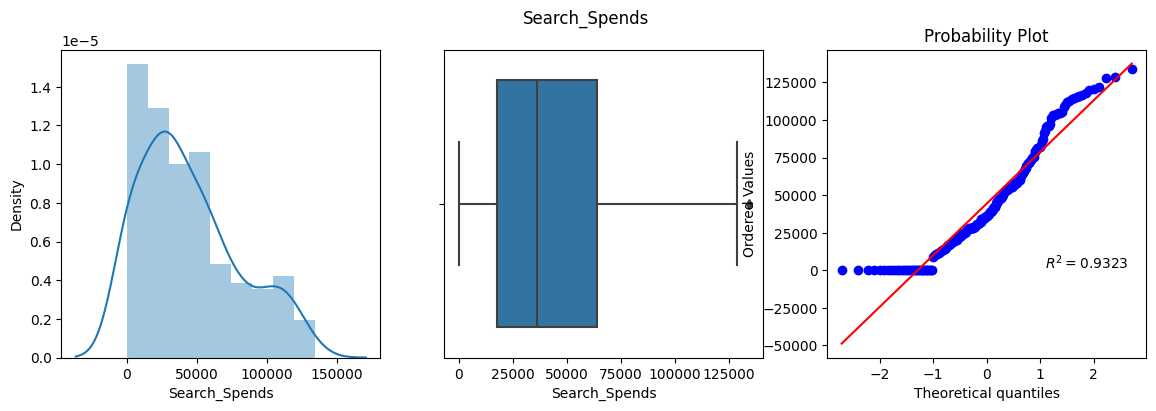

Skewness of competitor_sales_B: 0.1365815441207366
Kurtosis of competitor_sales_B: -1.2275321246206816


<Figure size 640x480 with 0 Axes>

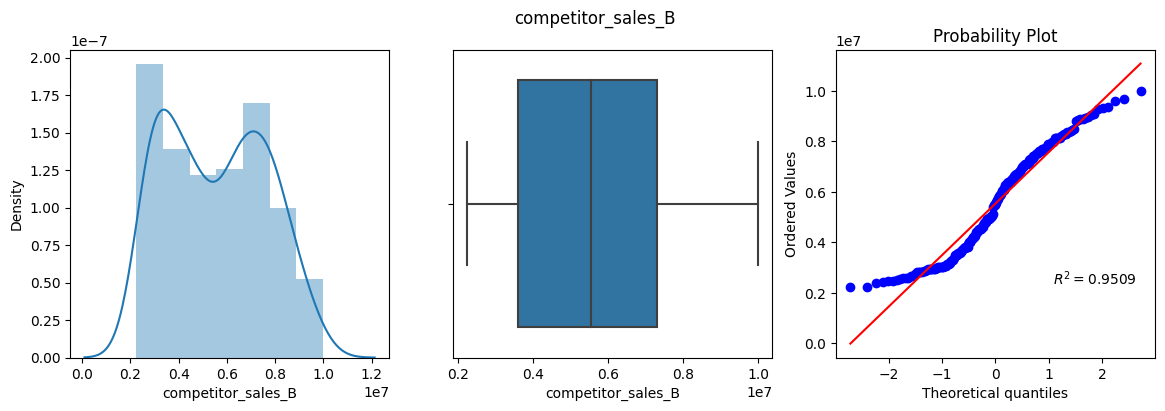

Skewness of FB_Spends: 1.7905618579405942
Kurtosis of FB_Spends: 3.3354554335296447


<Figure size 640x480 with 0 Axes>

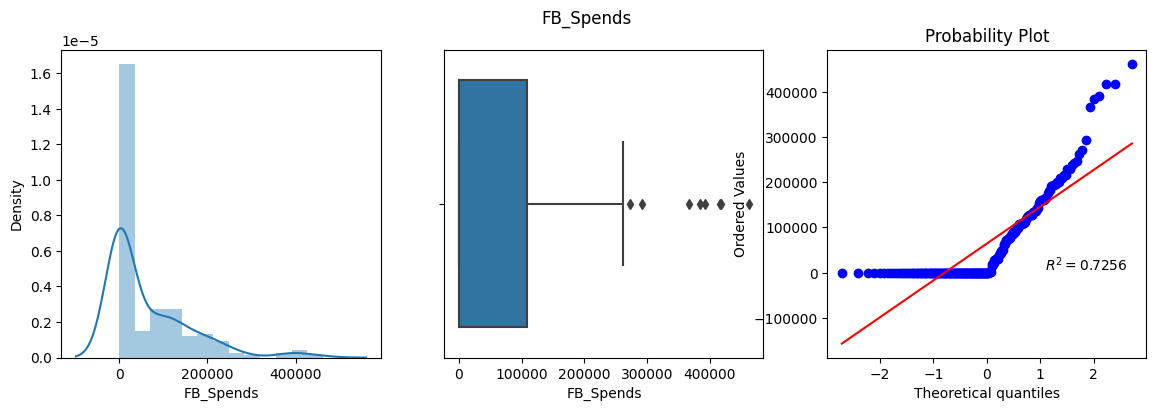

Skewness of year: -0.05078051343279563
Kurtosis of year: -1.1278308430264758


<Figure size 640x480 with 0 Axes>

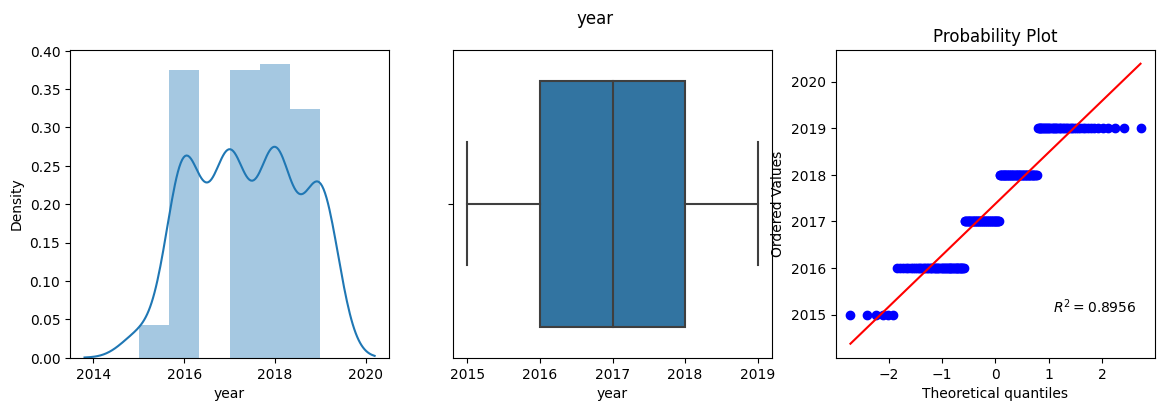

Skewness of daysinmonth: -1.6920990007816863
Kurtosis of daysinmonth: 2.606334501432511


<Figure size 640x480 with 0 Axes>

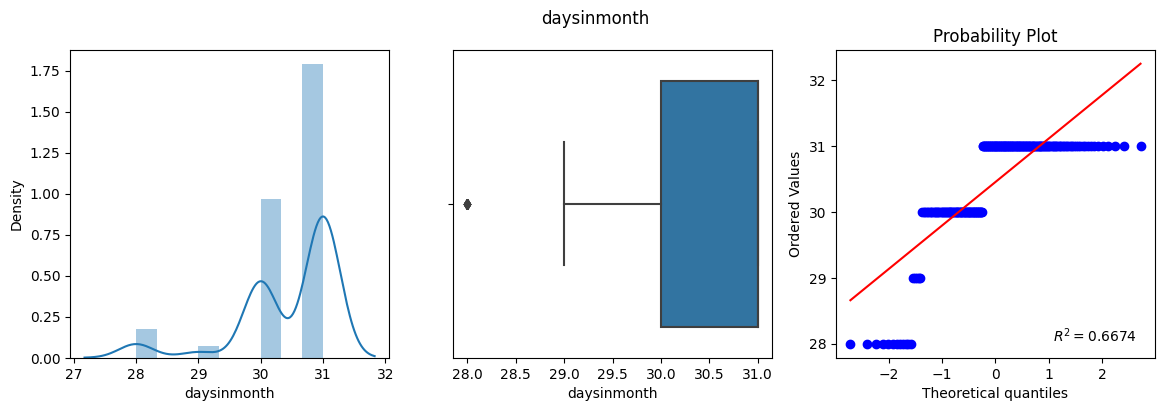

Skewness of Cost: 1.7219088731913106
Kurtosis of Cost: 3.4586868363962795


<Figure size 640x480 with 0 Axes>

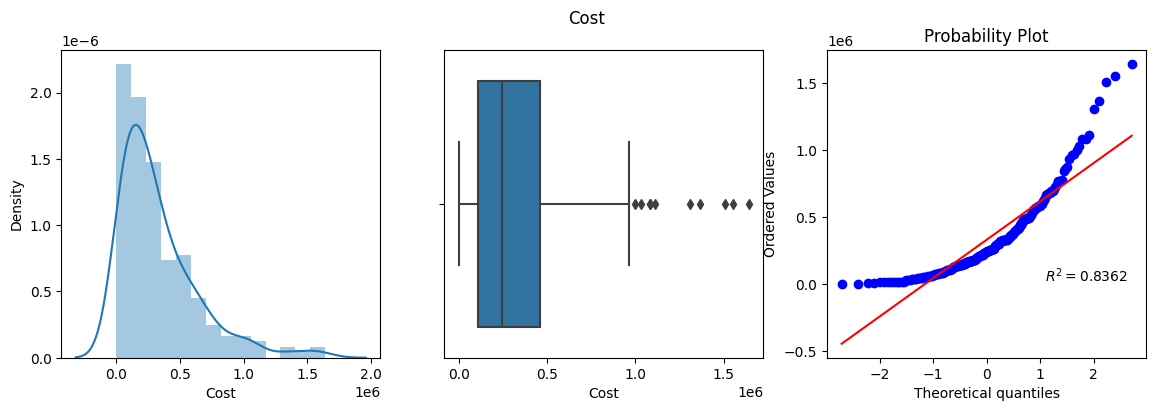

Skewness of Revenue: 0.08141150490176528
Kurtosis of Revenue: -0.9288581219899492


<Figure size 640x480 with 0 Axes>

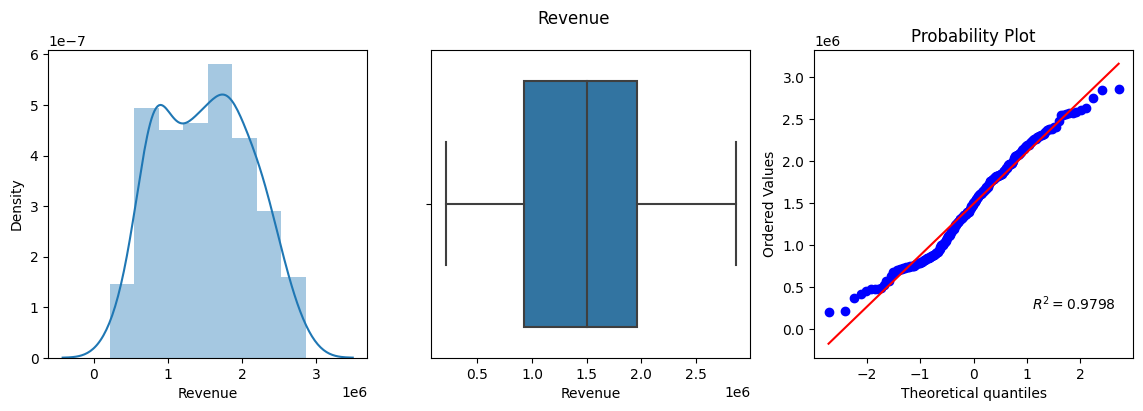

Skewness of CPM: -2.1023901136109315
Kurtosis of CPM: 5.772940138391196


<Figure size 640x480 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


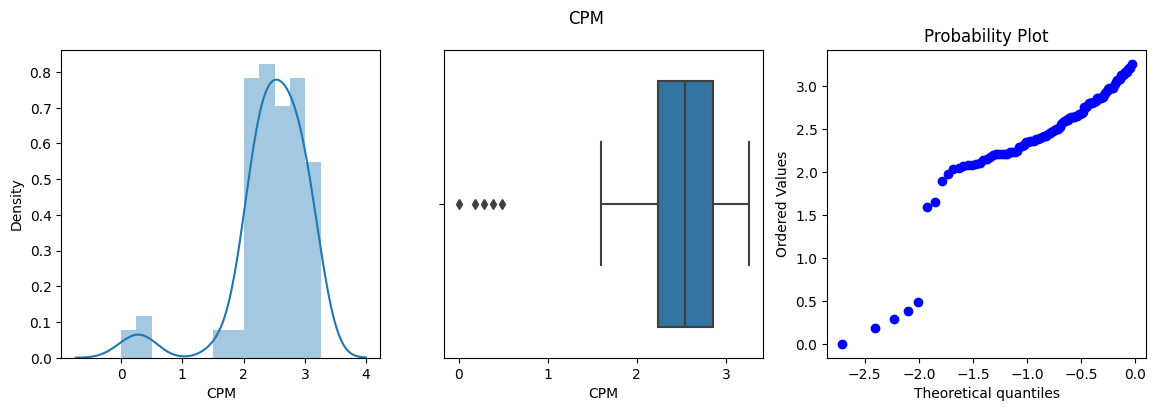

Skewness of CPC: 0.3979455274240653
Kurtosis of CPC: -1.105756446290241


<Figure size 640x480 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


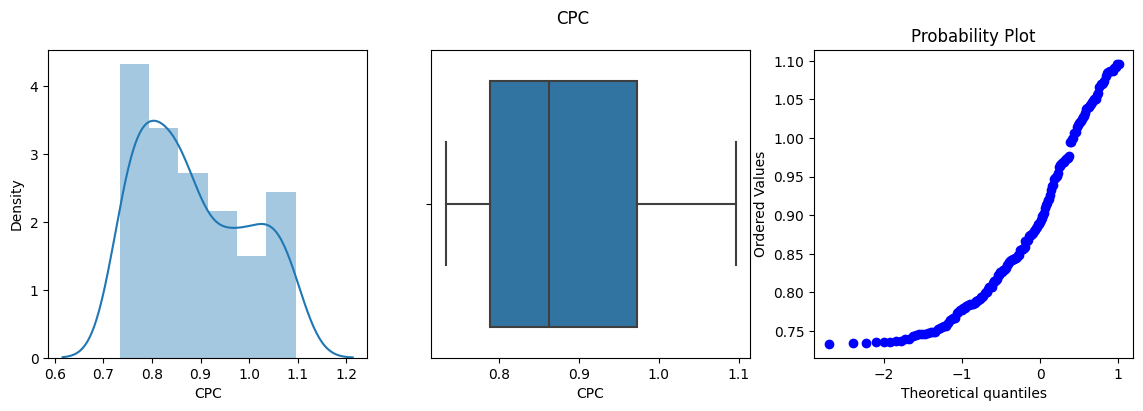

Skewness of CPS: 1.4762904851091423
Kurtosis of CPS: 2.441180332365141


<Figure size 640x480 with 0 Axes>

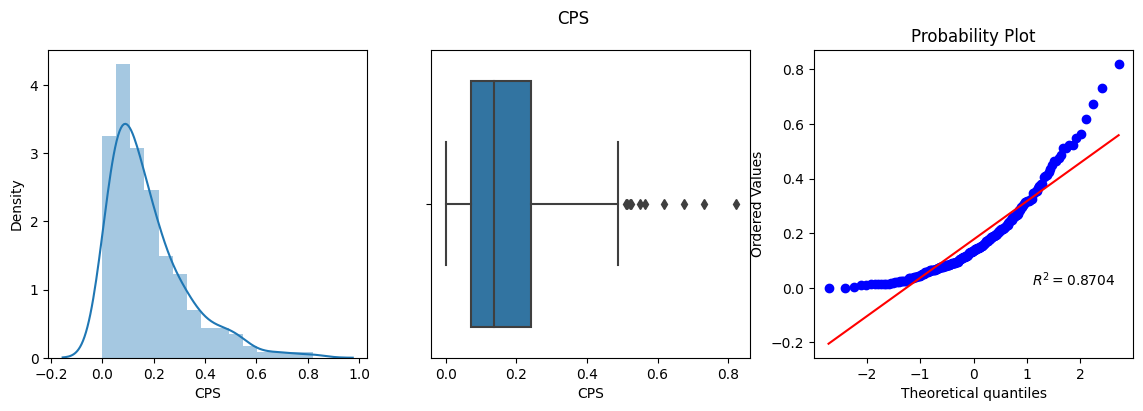

Skewness of ROI: 11.080683847221527
Kurtosis of ROI: 127.25623762759682


<Figure size 640x480 with 0 Axes>

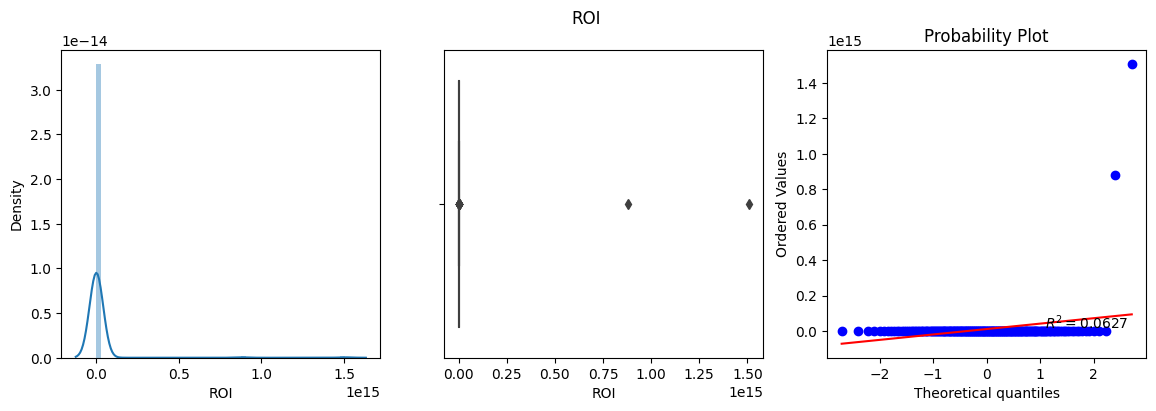

<Figure size 640x480 with 0 Axes>

In [30]:
for col in df.columns:
    if isinstance(df[col][0],np.number):
        print(f"Skewness of {col}:",df[col].skew())
        print(f"Kurtosis of {col}:",df[col].kurtosis())
        plt.figure(figsize=(14,4))
        plt.subplot(131)
        sns.distplot(df[col])
        plt.subplot(132)
        sns.boxplot(df[col])
        plt.subplot(133)
        probplot(df[col],rvalue=True,plot=plt,dist='norm')
        plt.suptitle(col)
        plt.show()
        plt.tight_layout()

In [31]:
outlier_cols = ['TV_Spends','OOH_Spends','Print_Spends','FB_Impressions','Search_Spends','FB_Spends','daysinmonth','Cost','CPM','CPS','ROI']

In [32]:
def apply_transform(transformer,col):
    plt.figure(figsize=(14,4))
    plt.subplot(231)
    sns.distplot(df[col])
    plt.subplot(232)
    sns.boxplot(df[col])
    plt.subplot(233)
    probplot(df[col],plot=plt,rvalue=True,dist='norm')
    plt.suptitle(col)
    tf_col = transformer.fit_transform(df[col])
    plt.subplot(234)
    sns.distplot(tf_col)
    plt.subplot(235)
    sns.boxplot(tf_col)
    plt.subplot(236)
    probplot(tf_col,plot=plt,rvalue=True,dist='norm')
    plt.show();

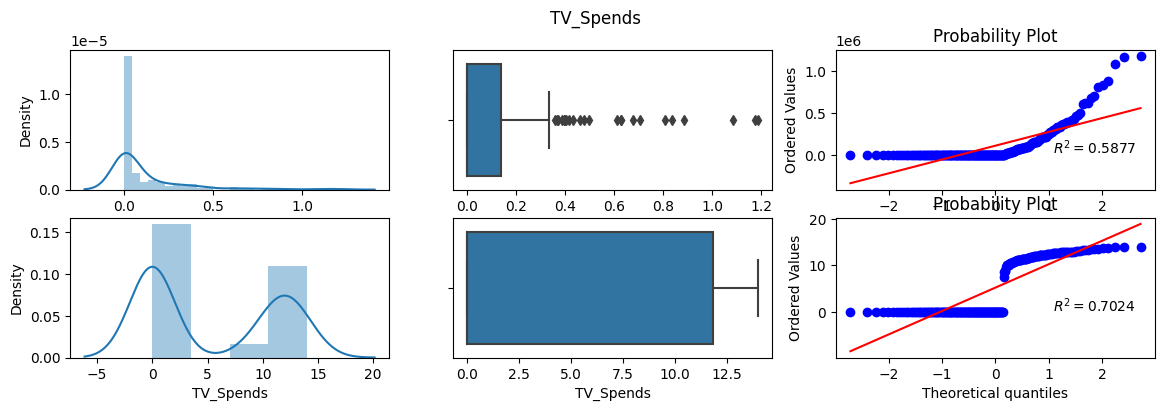

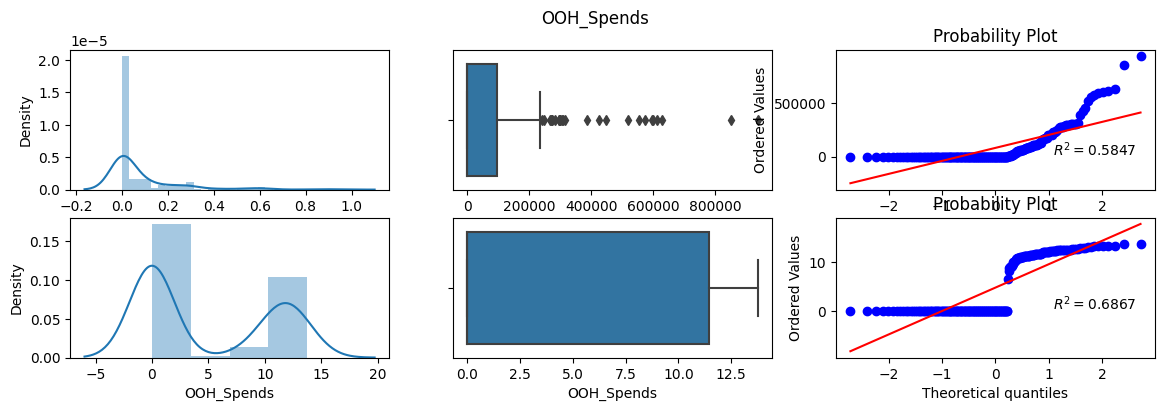

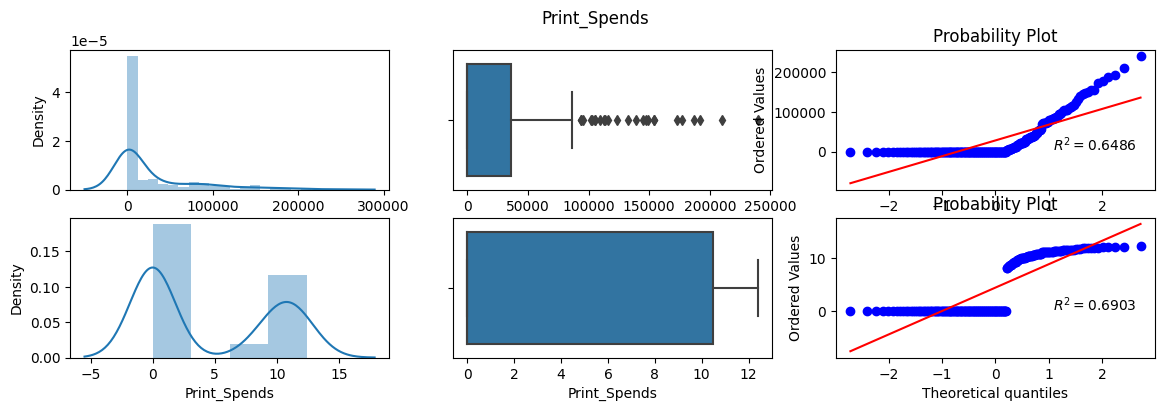

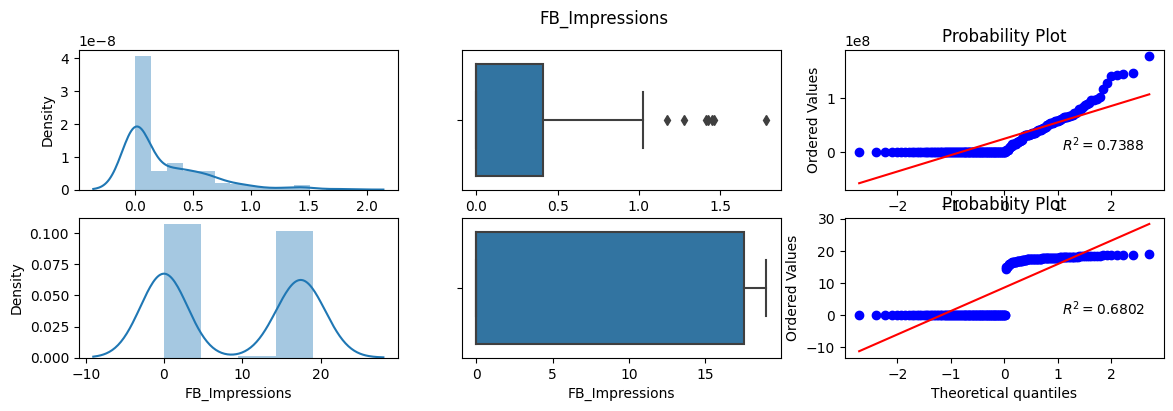

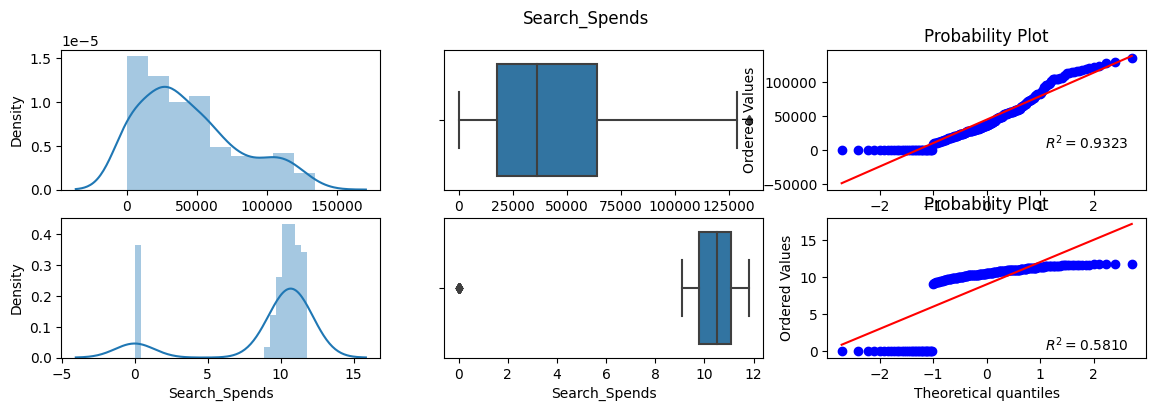

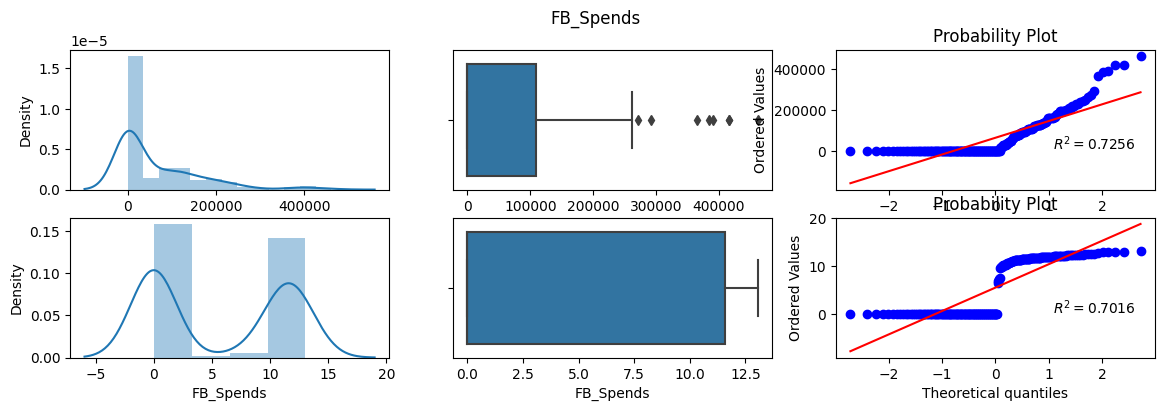

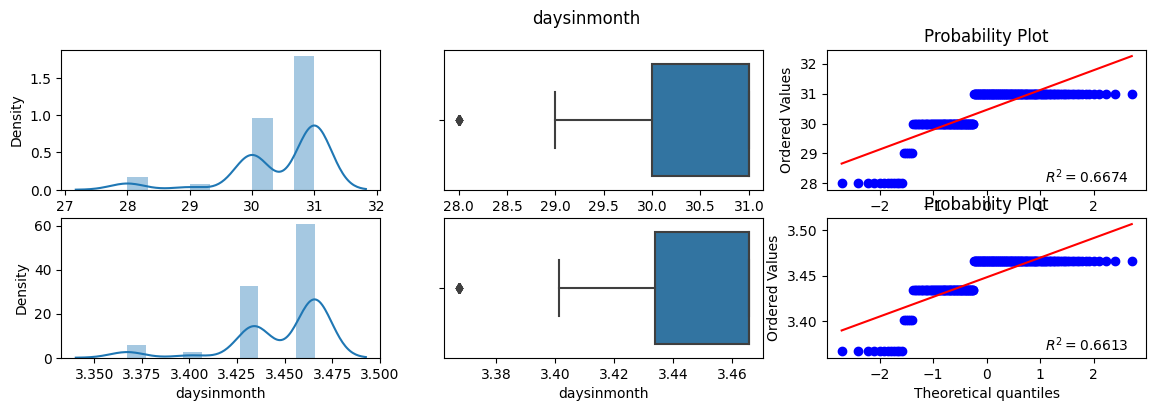

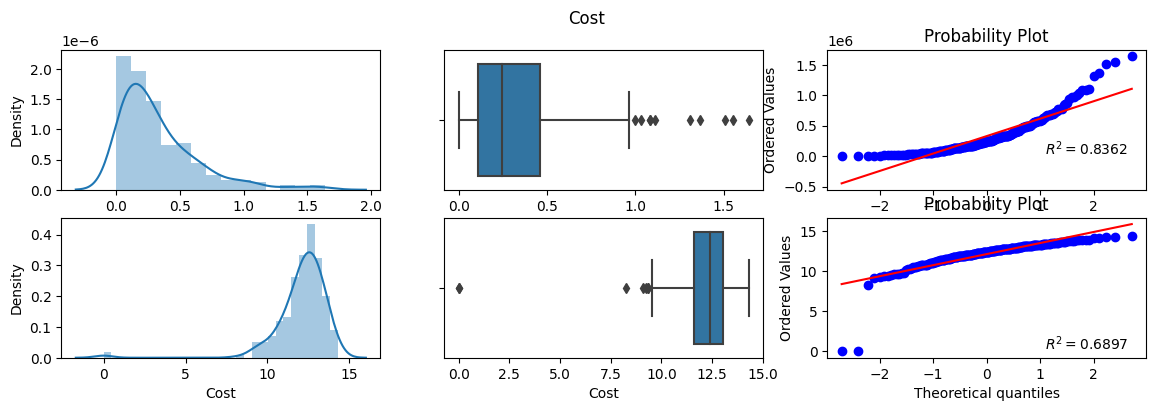

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


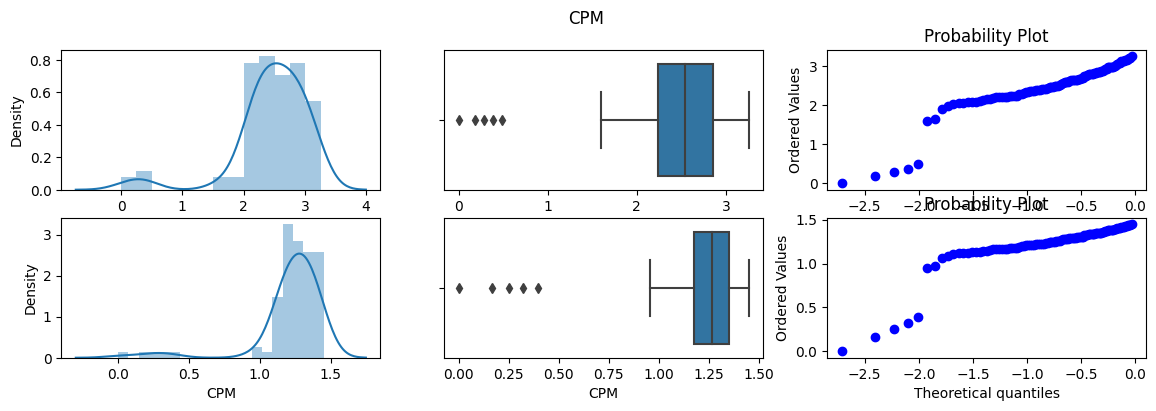

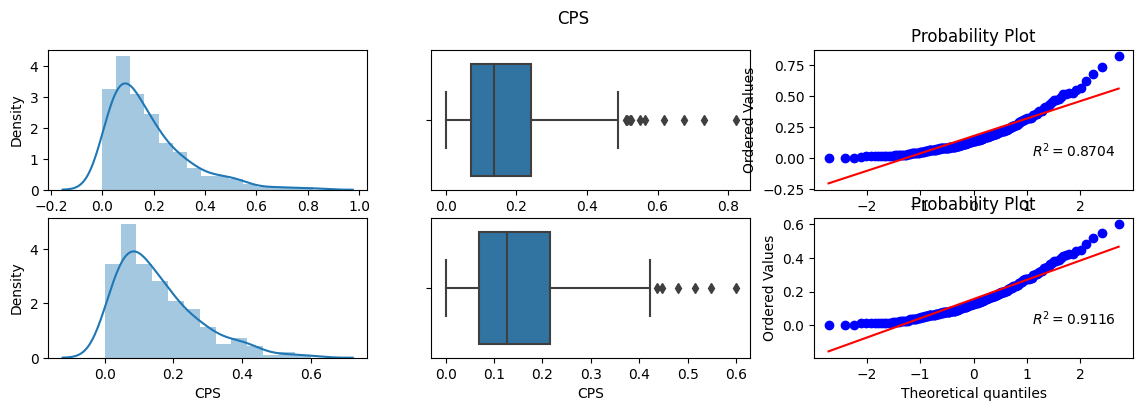

posx and posy should be finite values
posx and posy should be finite values


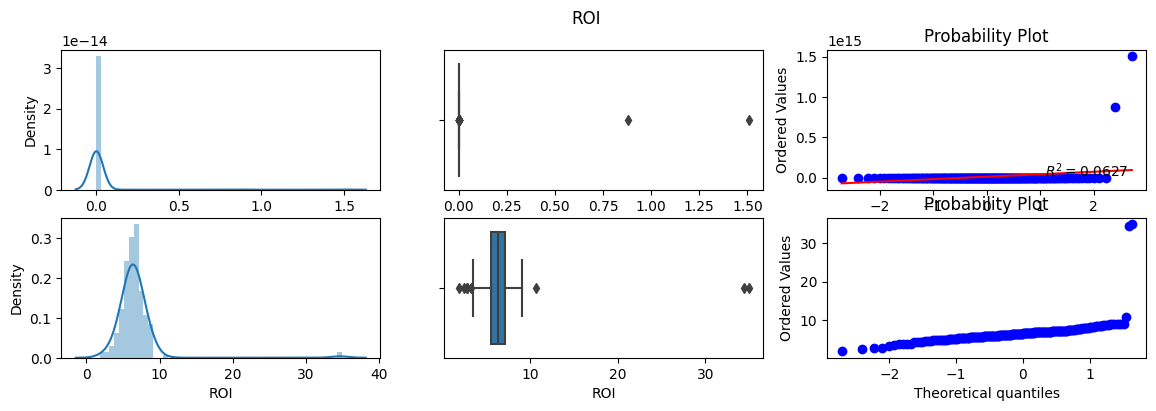

In [33]:
log_transformer = FunctionTransformer(np.log1p)

for col in outlier_cols:
    apply_transform(log_transformer,col)

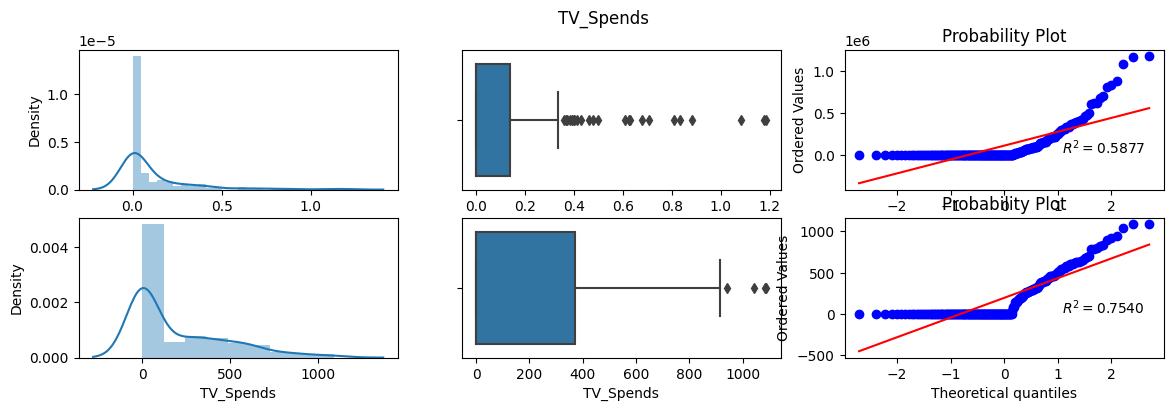

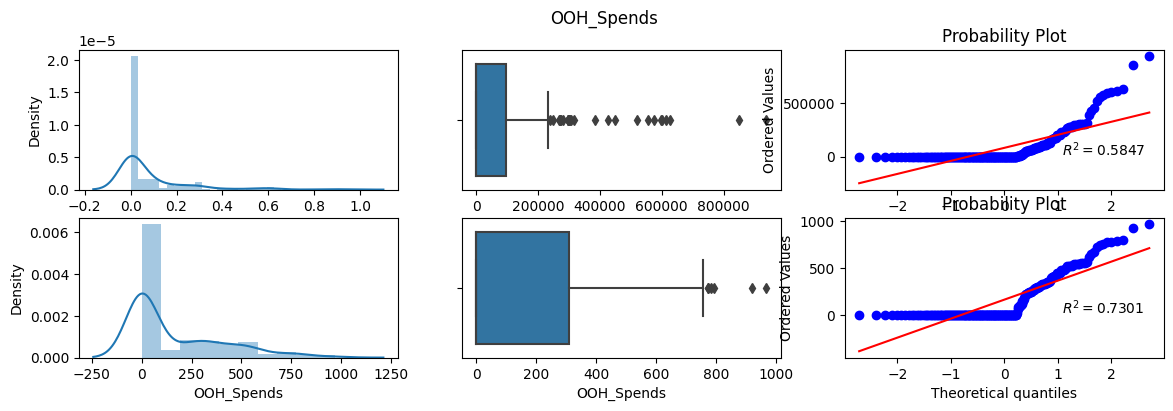

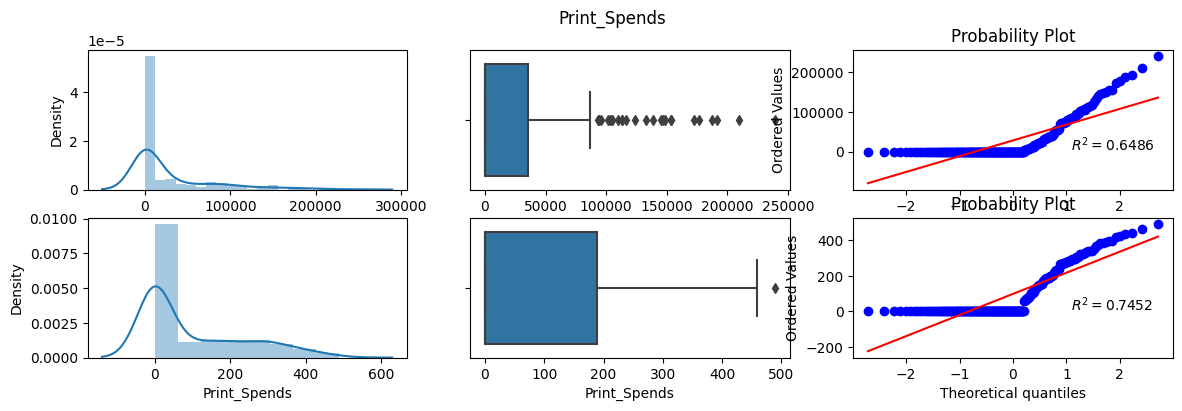

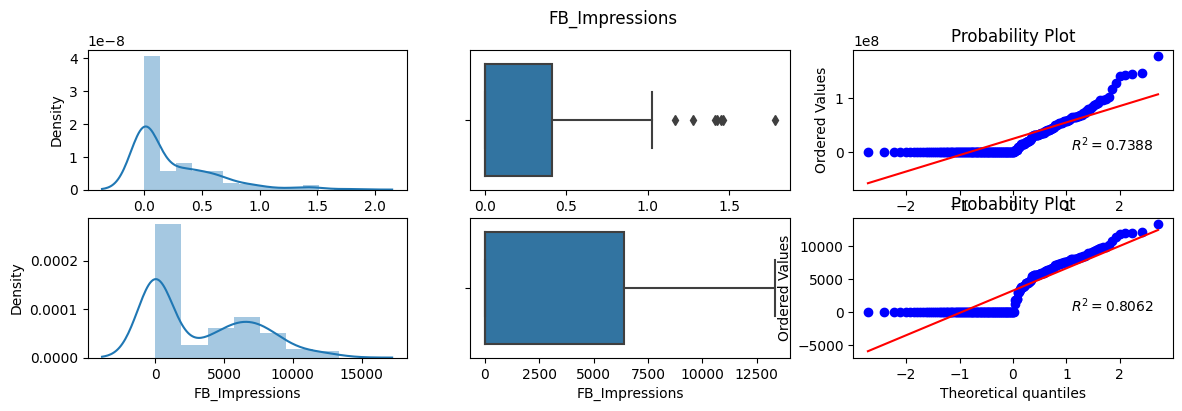

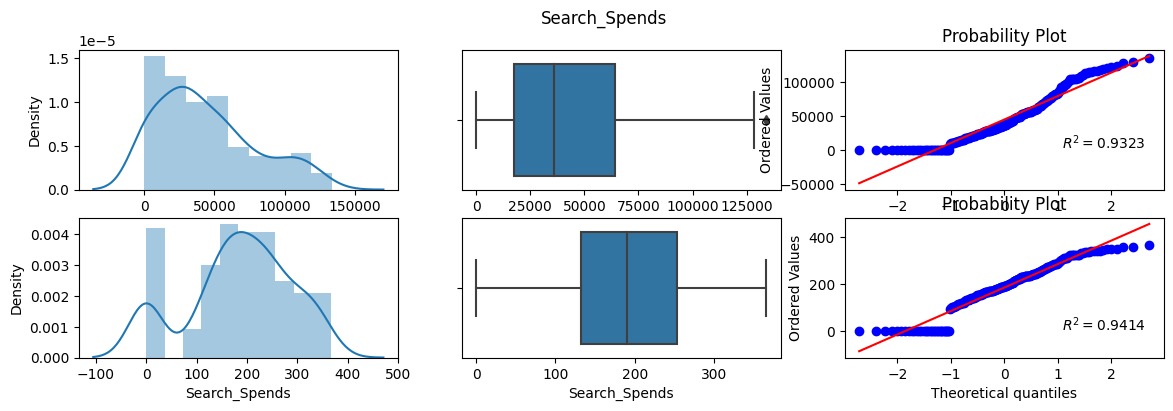

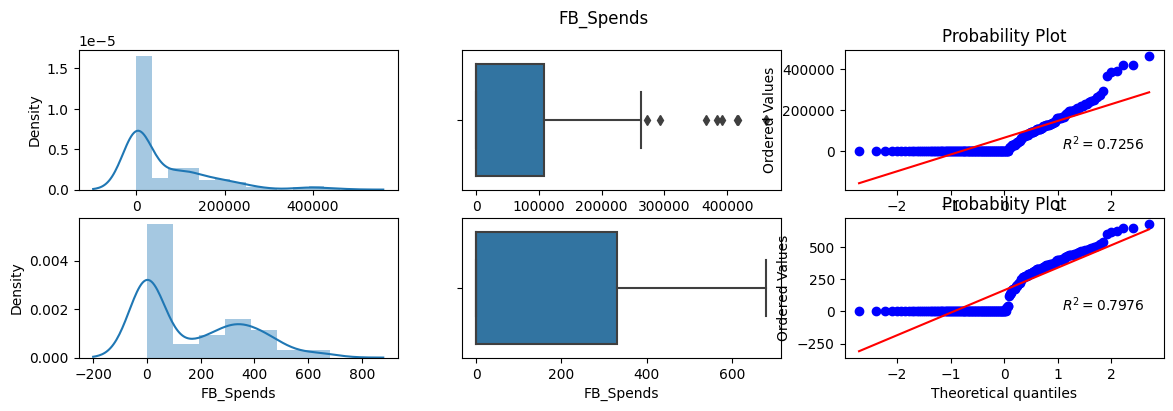

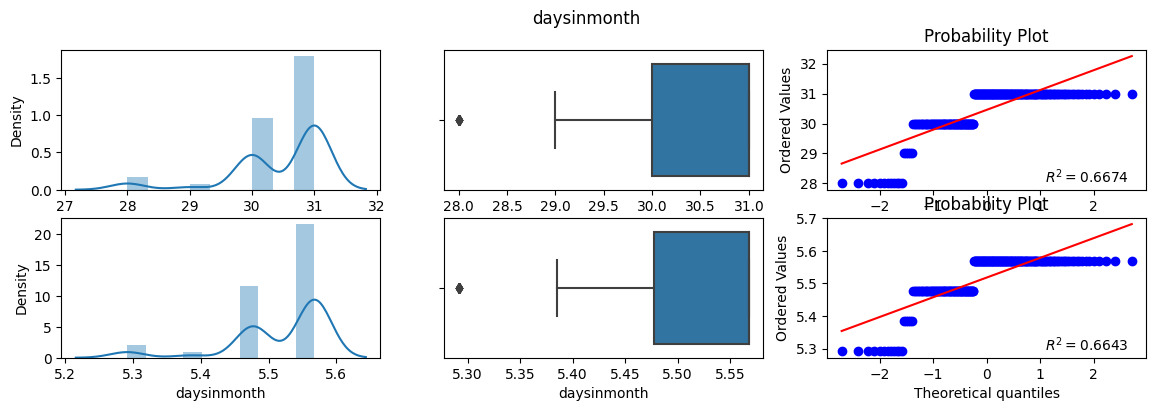

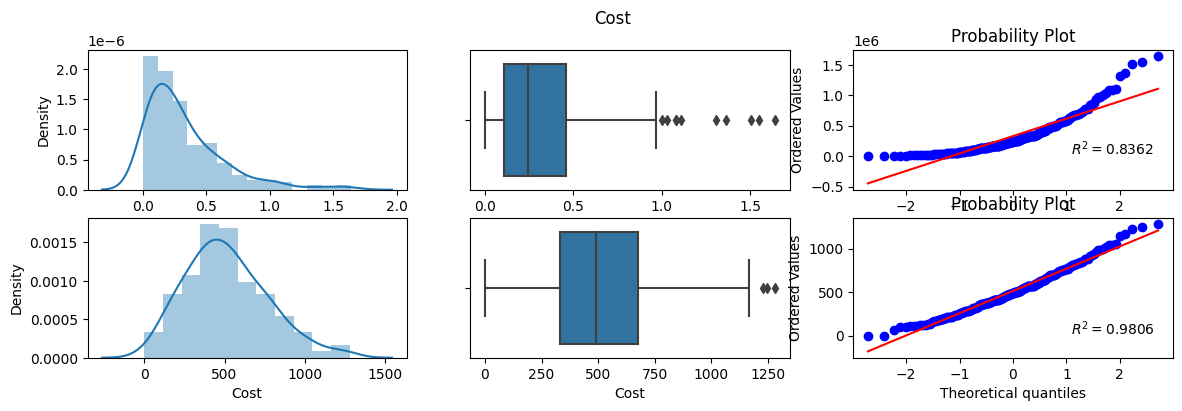

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


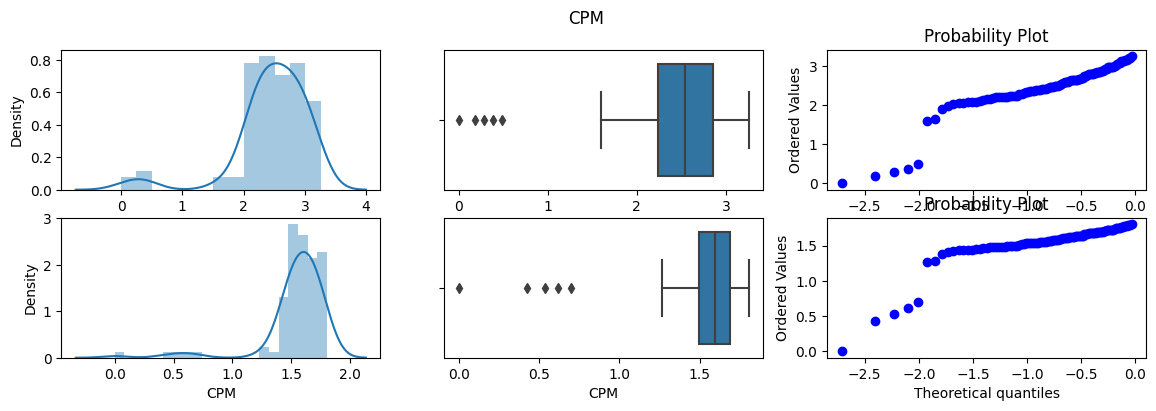

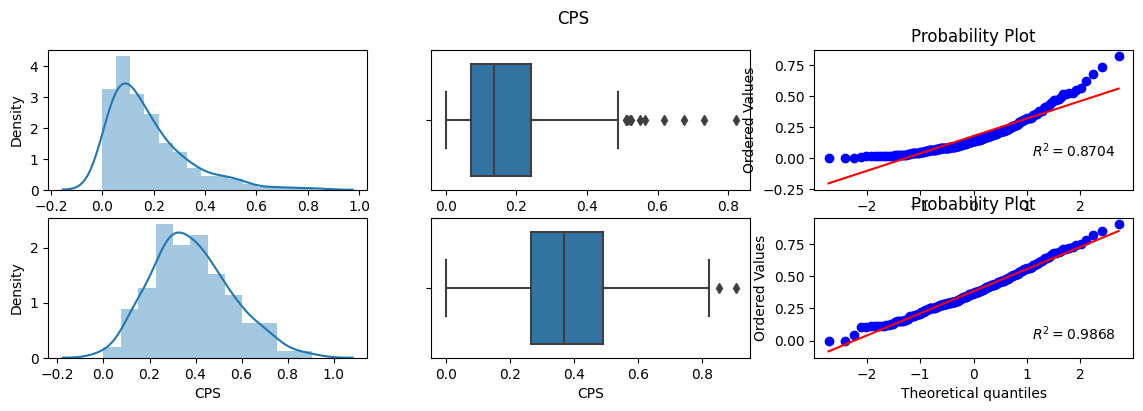

posx and posy should be finite values
posx and posy should be finite values


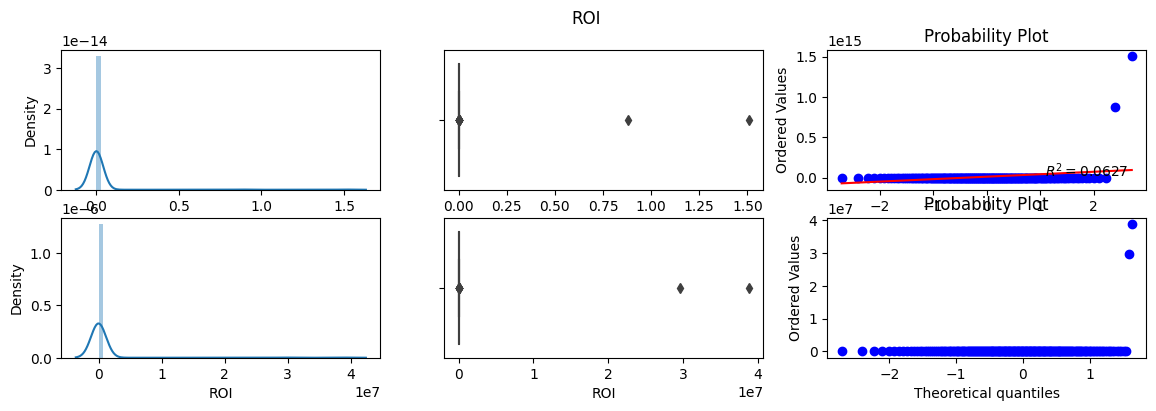

In [34]:
sqrt_transformer = FunctionTransformer(np.sqrt)

for col in outlier_cols:
    apply_transform(sqrt_transformer,col)

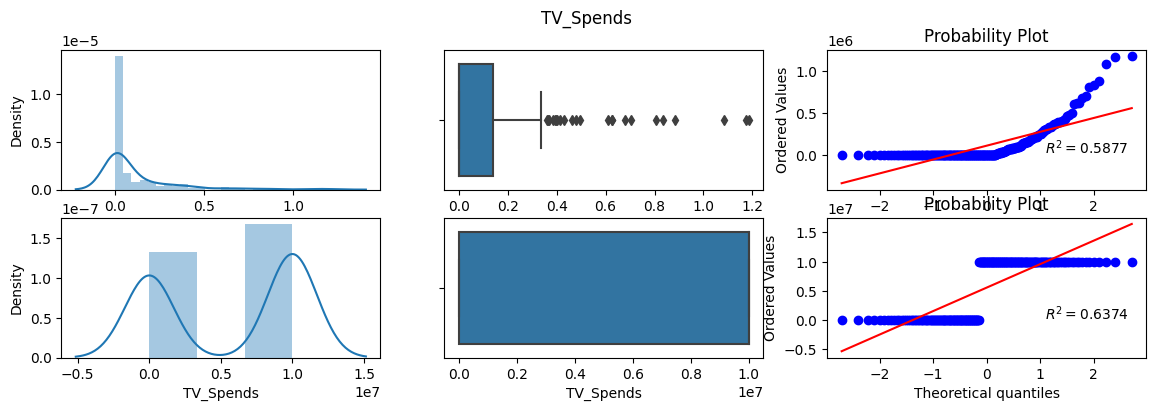

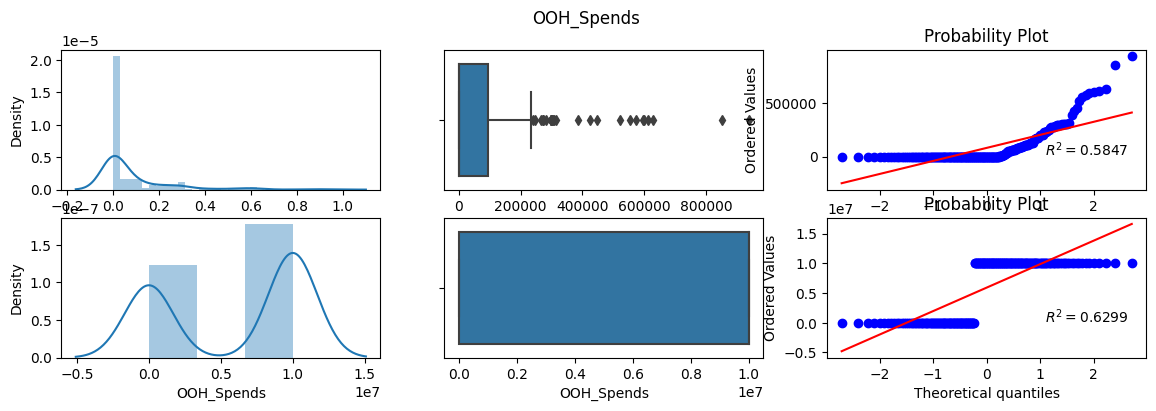

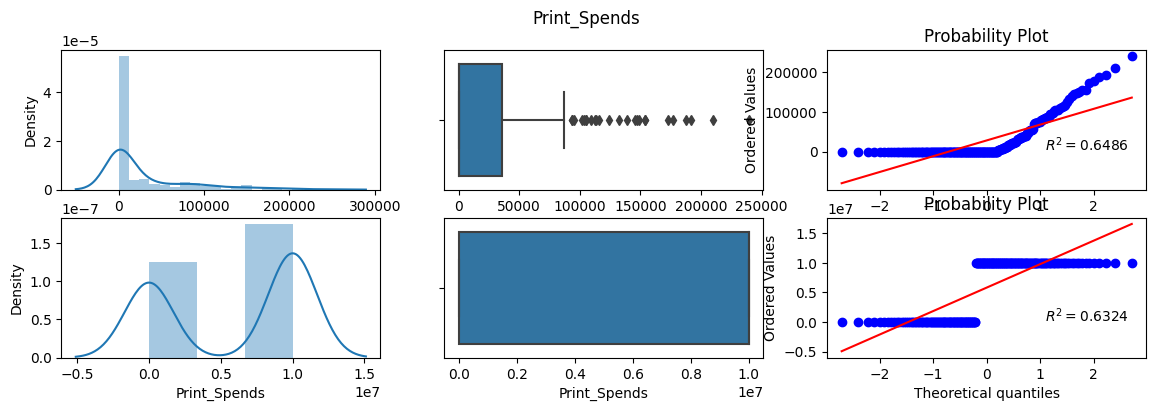

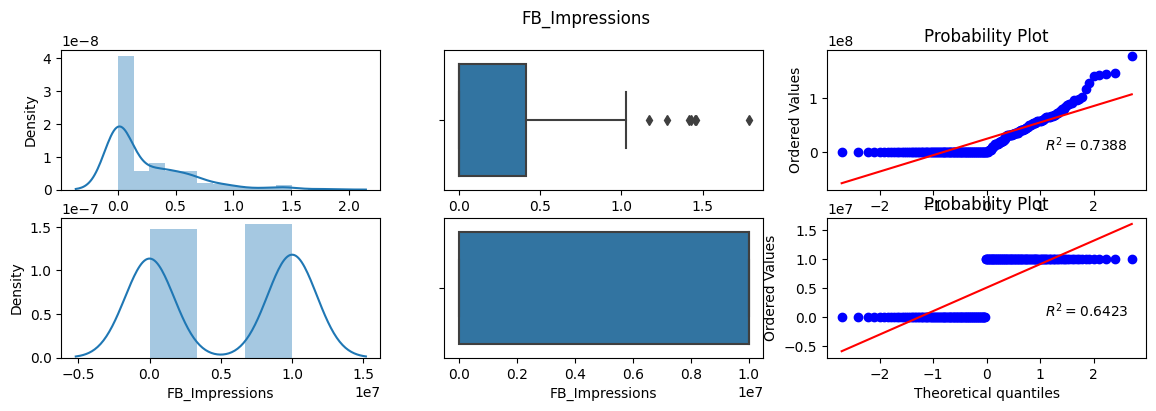

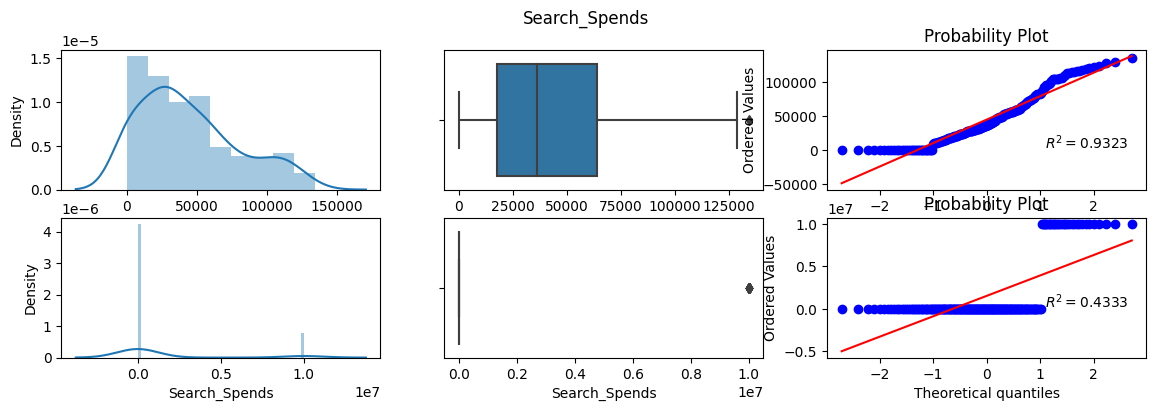

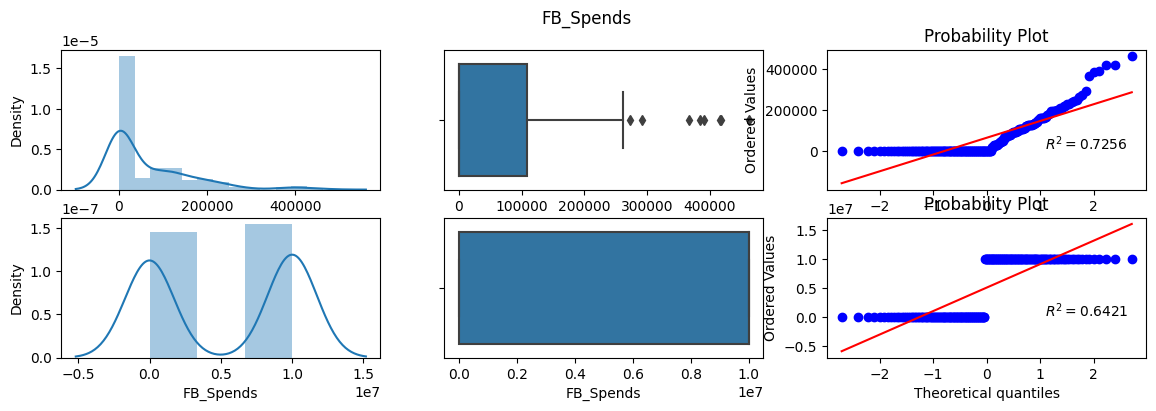

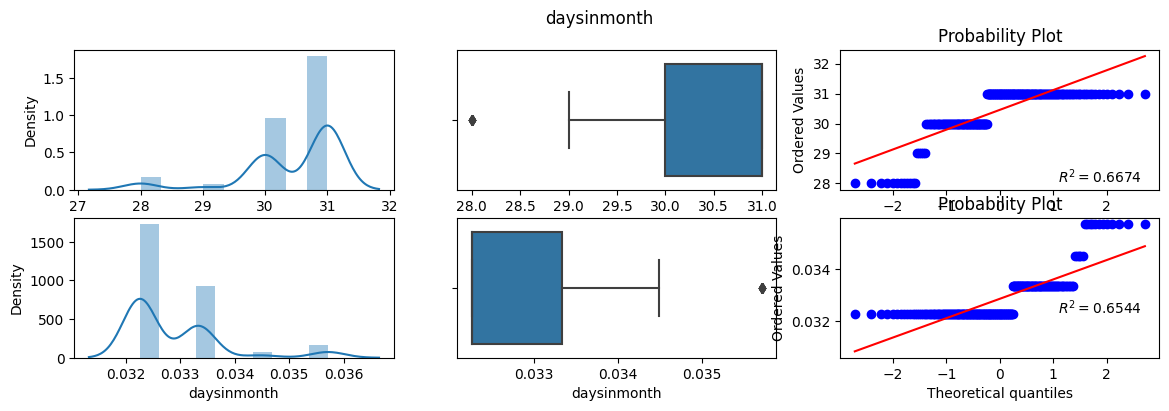

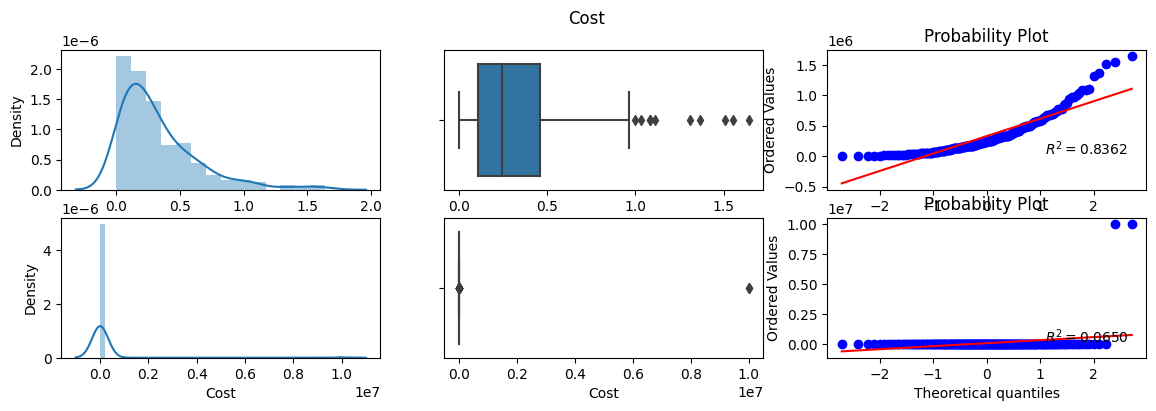

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


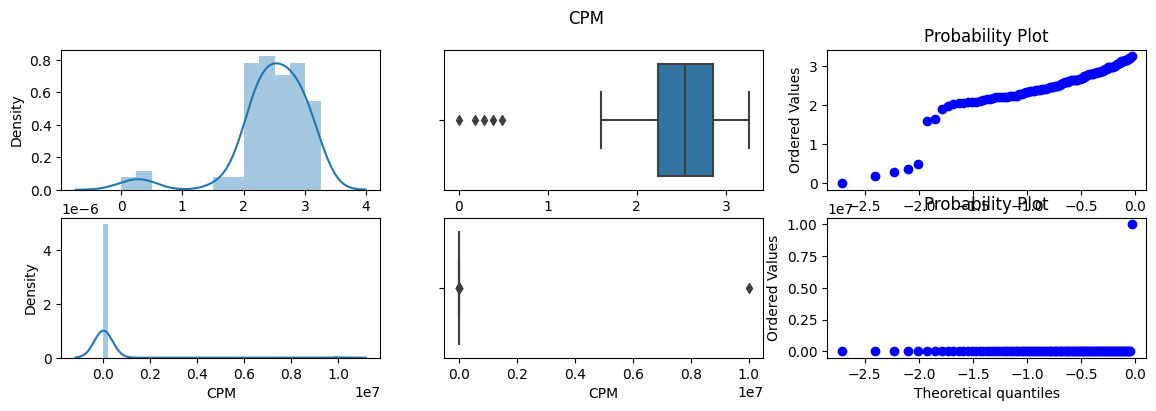

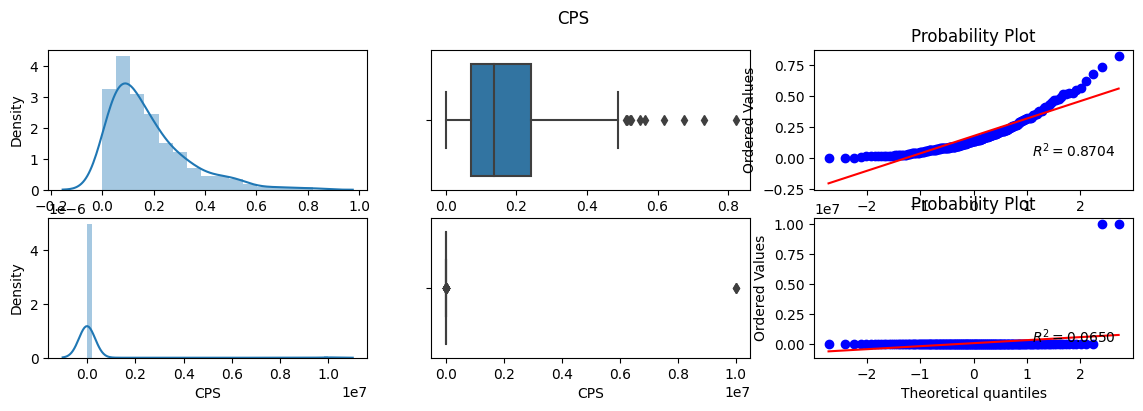

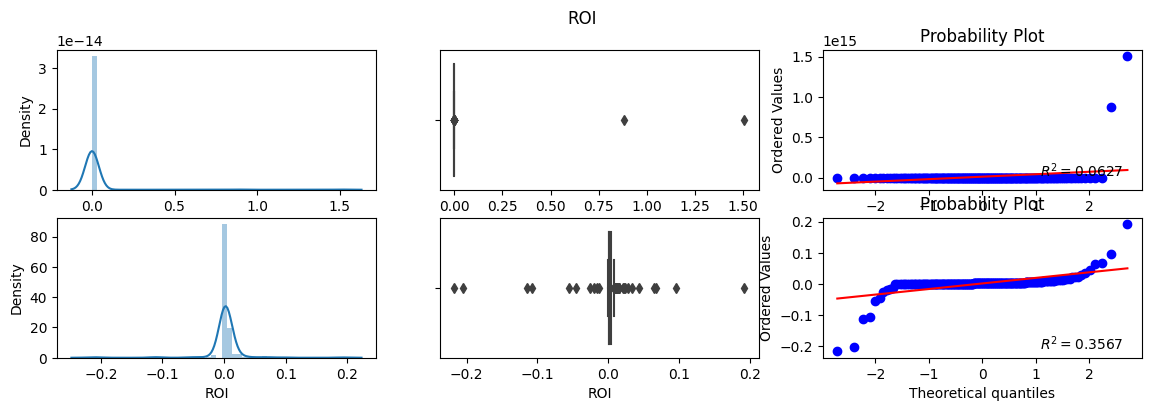

In [35]:
reciprocal_transformer = FunctionTransformer(lambda x: 1/(x+0.0000001))

for col in outlier_cols:
    apply_transform(reciprocal_transformer,col)

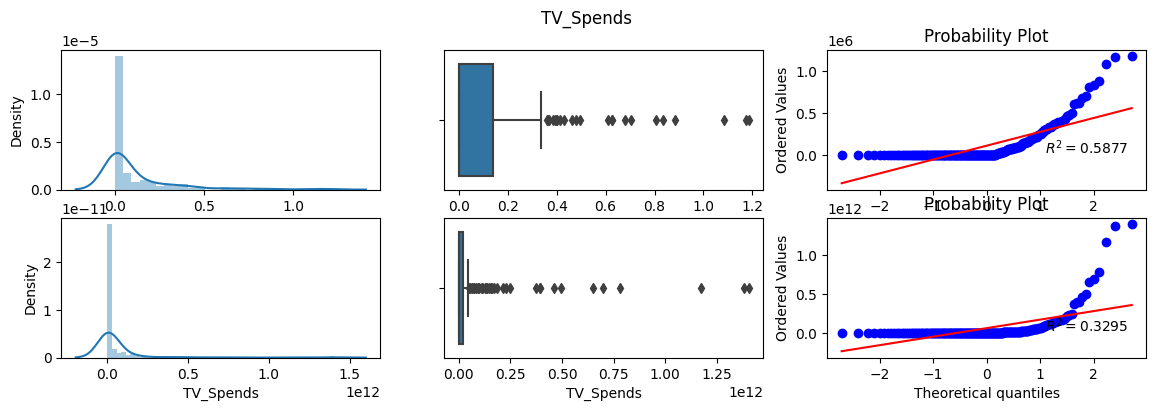

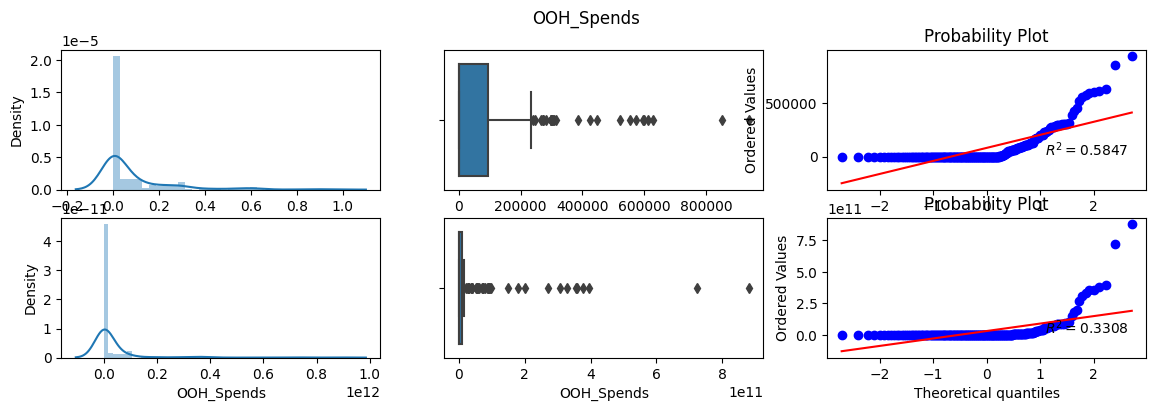

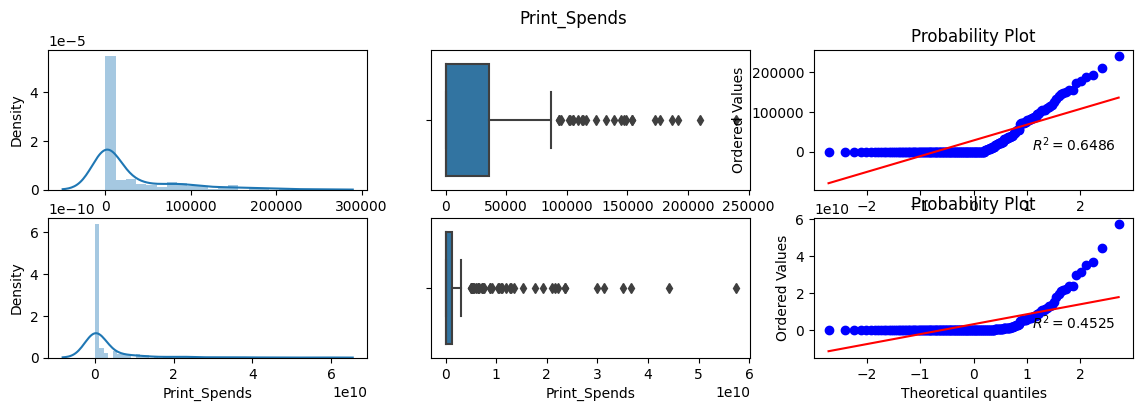

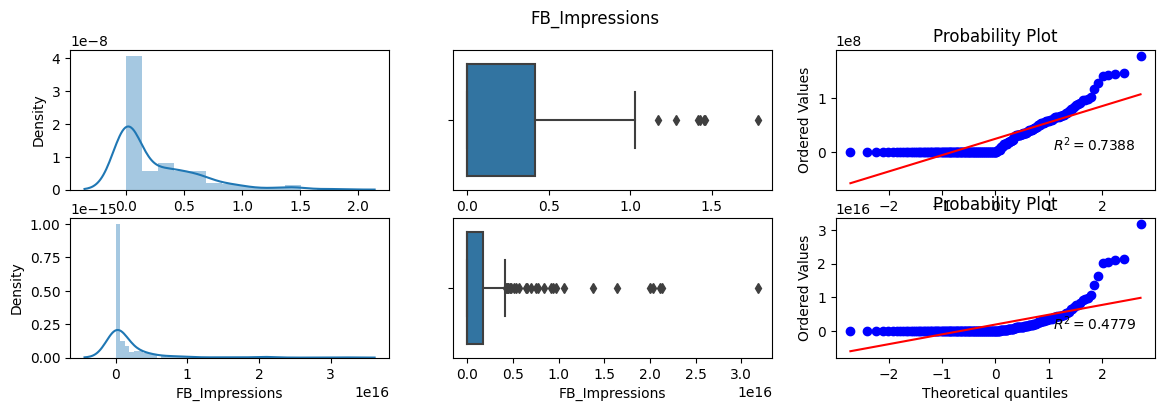

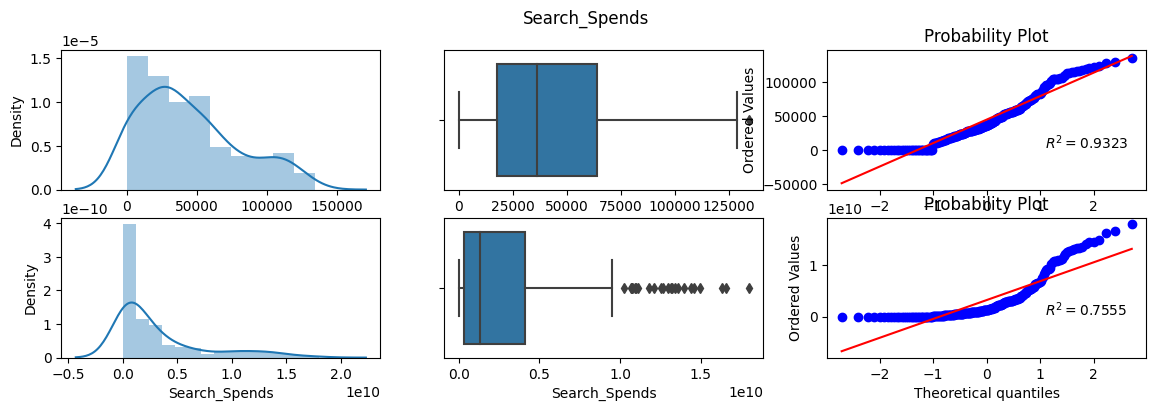

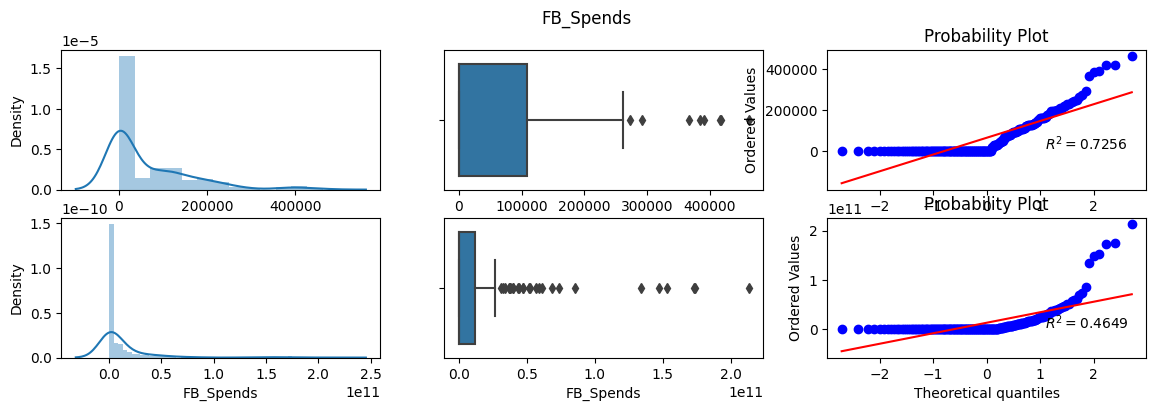

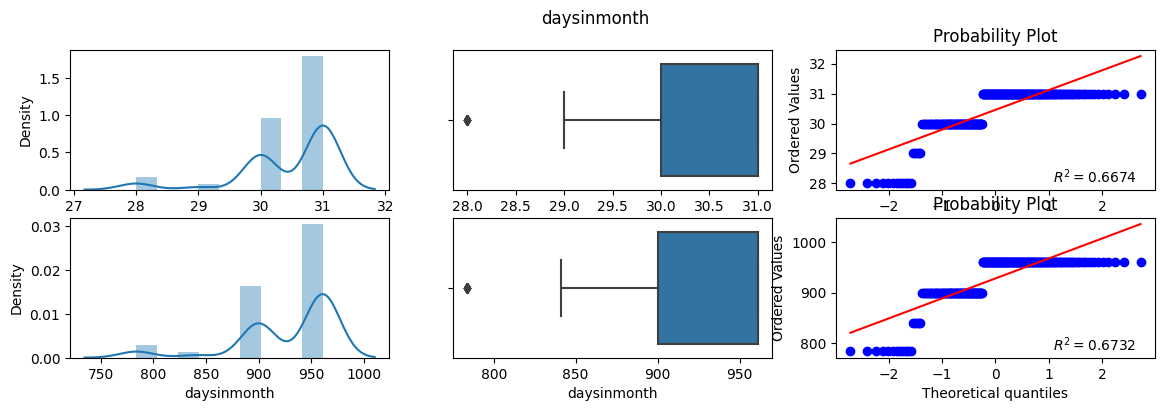

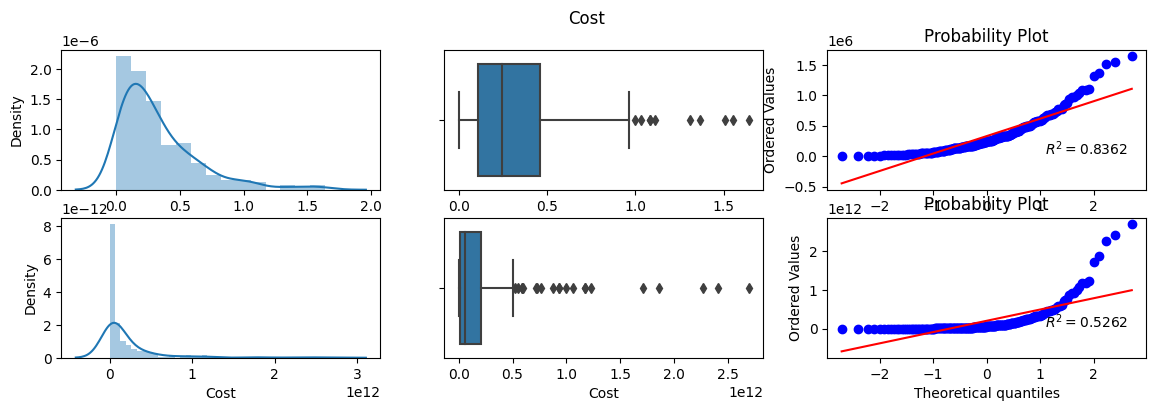

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


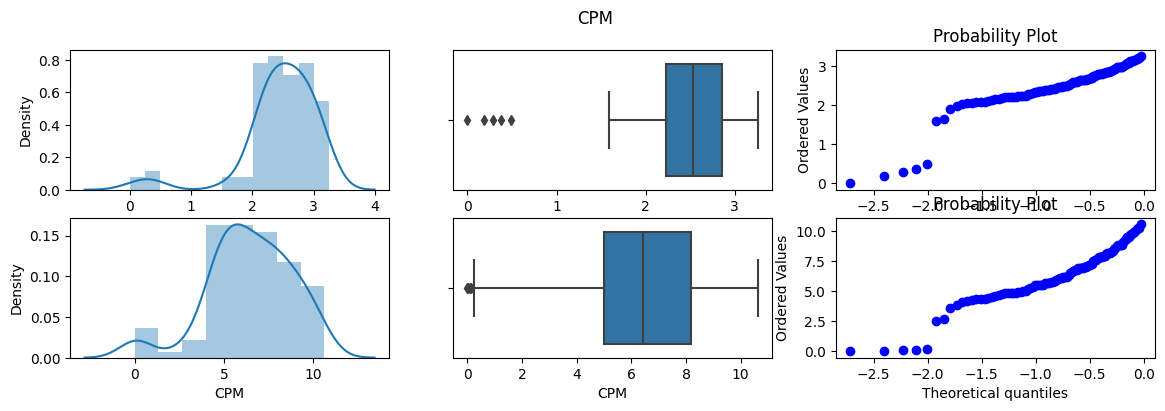

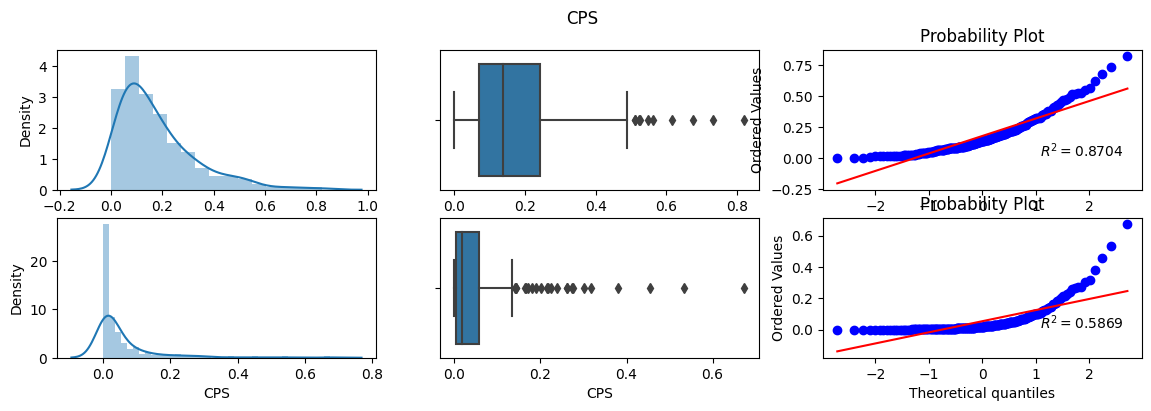

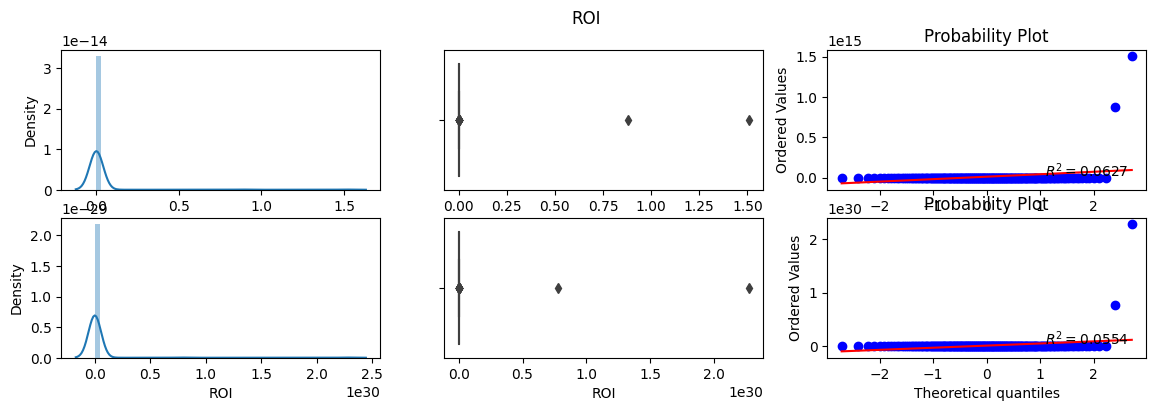

In [36]:
square_transformer = FunctionTransformer(lambda x: x**2)

for col in outlier_cols:
    apply_transform(square_transformer,col)

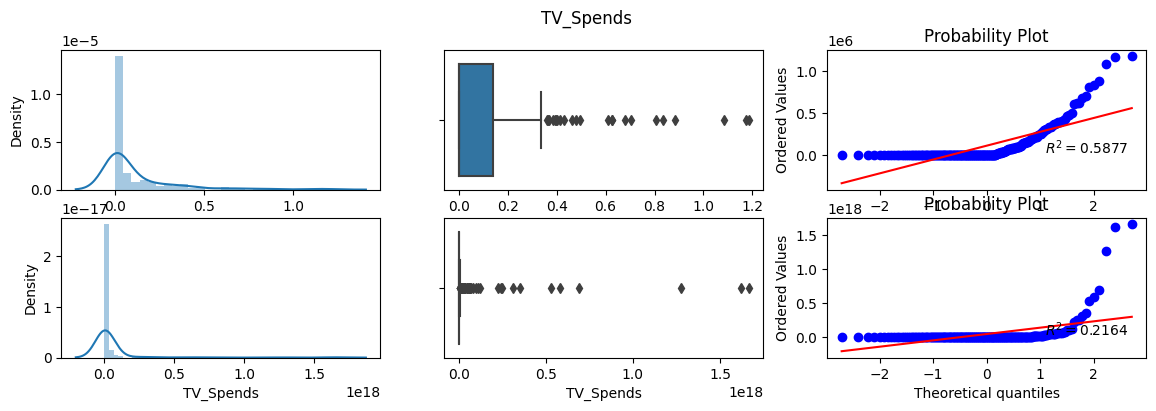

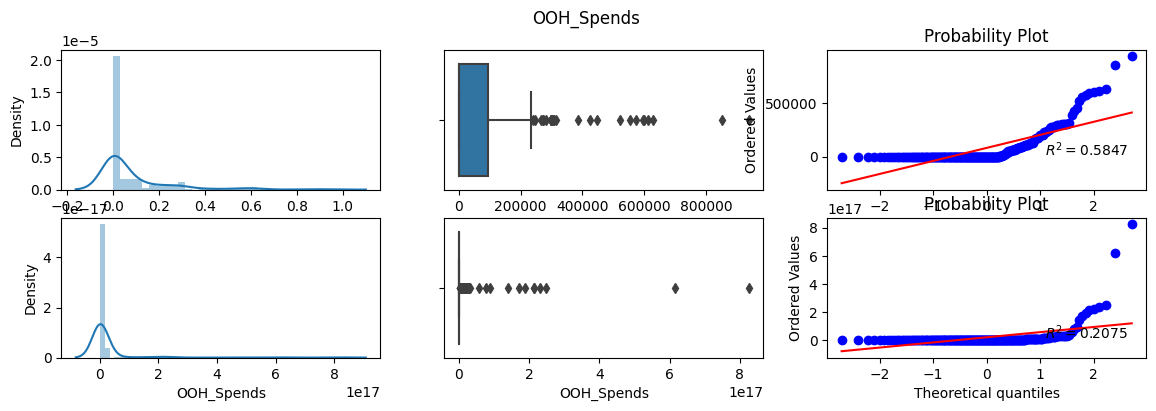

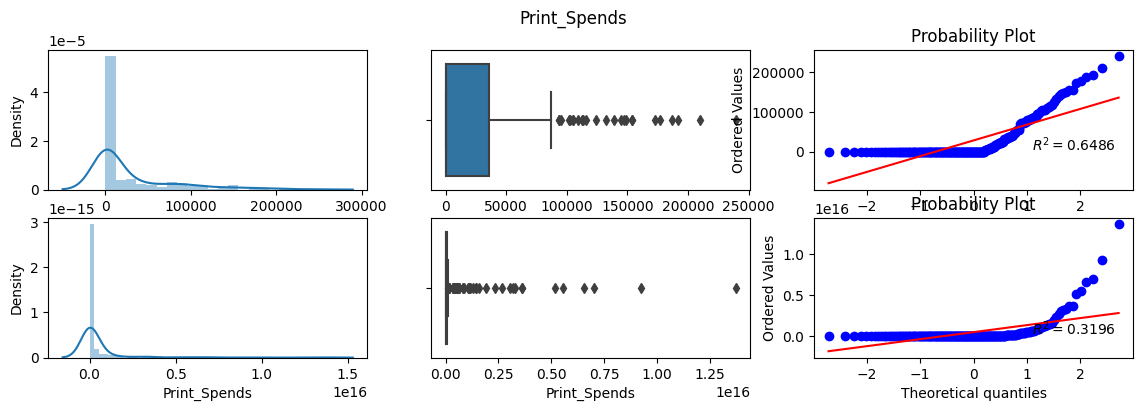

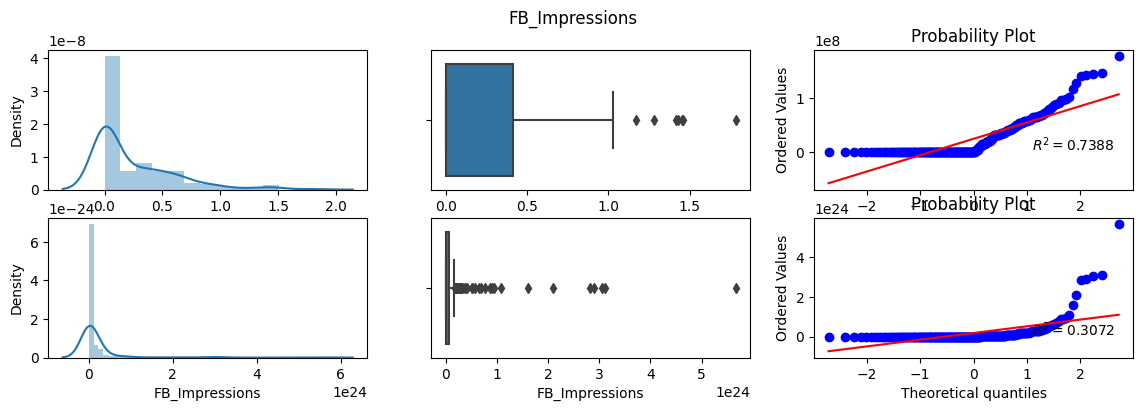

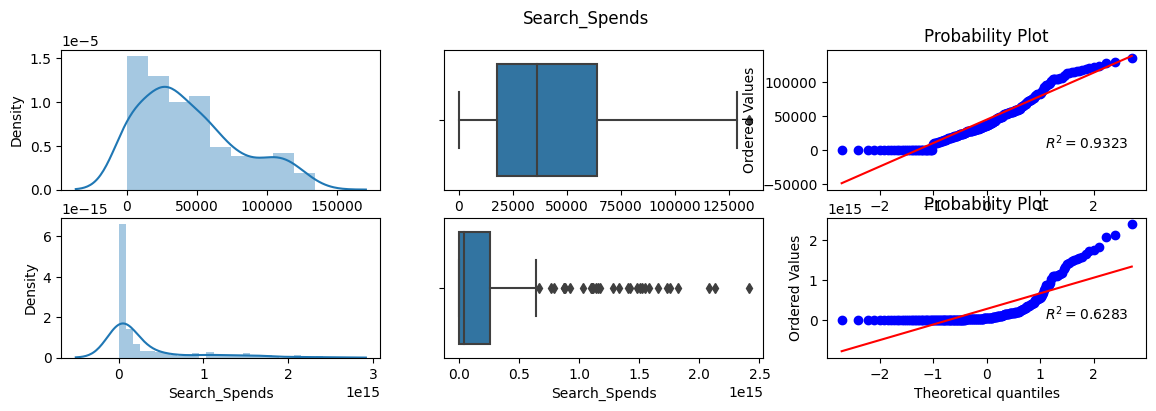

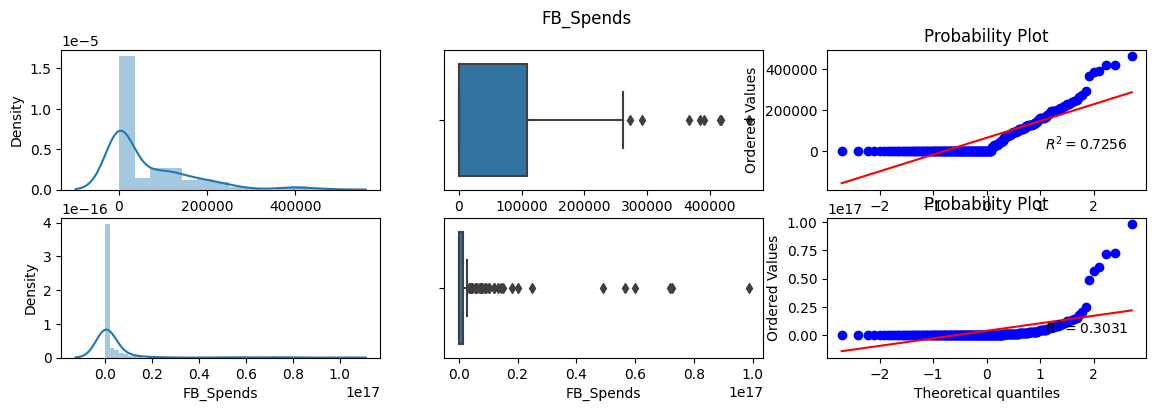

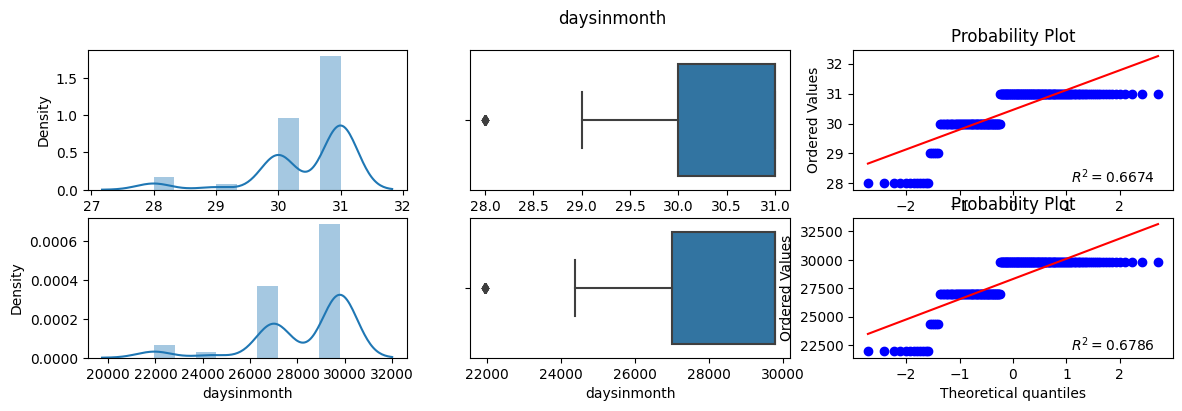

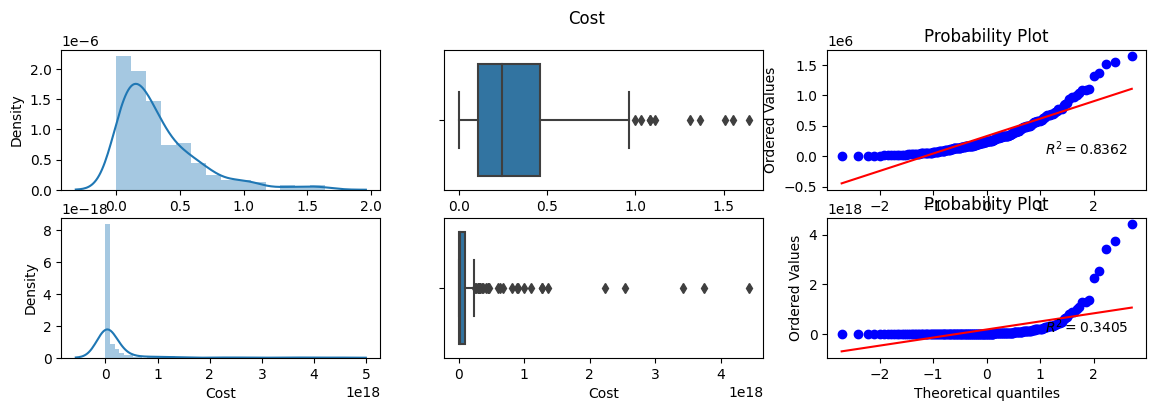

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


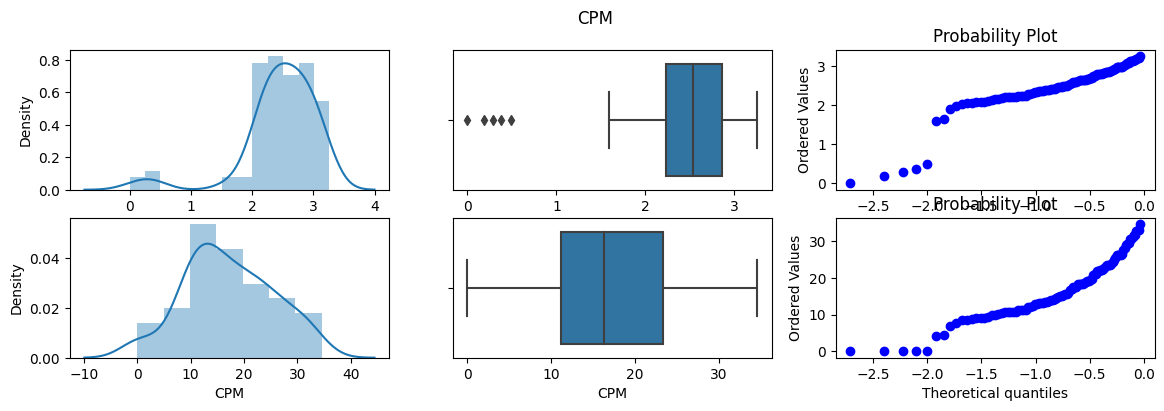

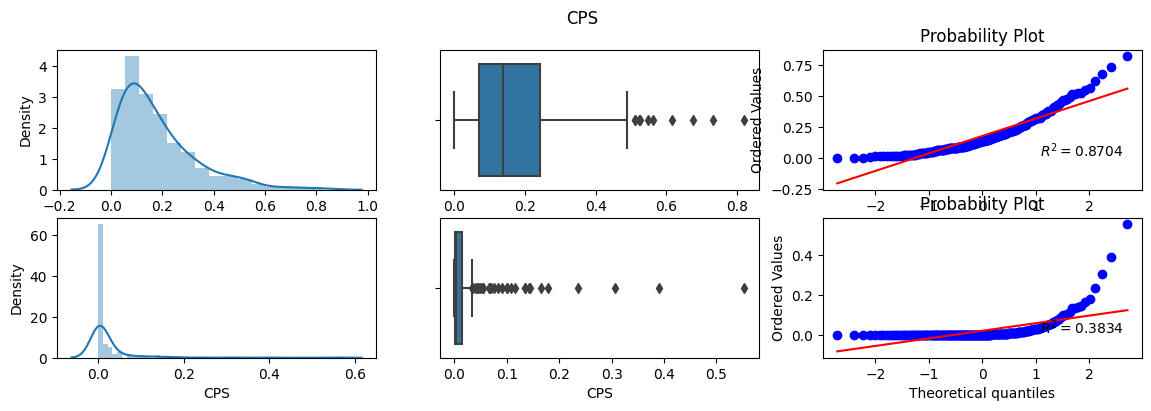

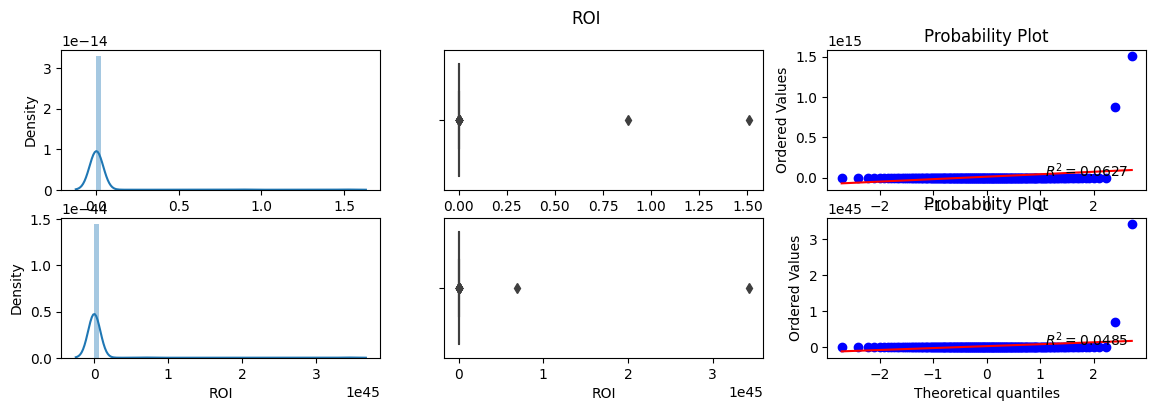

In [37]:
cube_transformer = FunctionTransformer(lambda x: x**3)

for col in outlier_cols:
    apply_transform(cube_transformer,col)

Log Transform: None <br>
Sqrt Transform: TV_Spends, OOH_Spends, Print_Spends, FB_Impressions, Search_Spends, FB_Spends, Cost, CPS <br>
Reciprocal Transform: ROI <br>
Square Transform: None <br>
Cube Transform: daysinmonth, CPM

In [38]:
df.ROI = reciprocal_transformer.fit_transform(df.ROI)

In [39]:
sqrt_cols = ['TV_Spends','OOH_Spends','Print_Spends','FB_Impressions','Search_Spends','FB_Spends','Cost','CPS']

for col in sqrt_cols:
    df[col] = sqrt_transformer.fit_transform(df[col])

In [40]:
cube_cols = ['daysinmonth','CPM']

for col in cube_cols:
    df[col] = cube_transformer.fit_transform(df[col])

### Treatment of Outliers

Skewness of Sales: 0.24521570453575126
Kurtosis of Sales: -0.8304394212678265


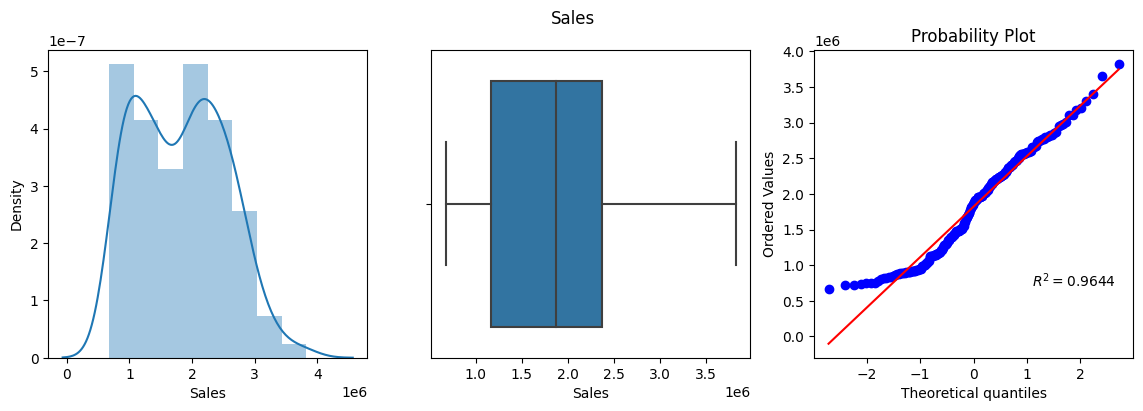

Skewness of TV_Spends: 1.2843203253105715
Kurtosis of TV_Spends: 0.8062730021064808


<Figure size 640x480 with 0 Axes>

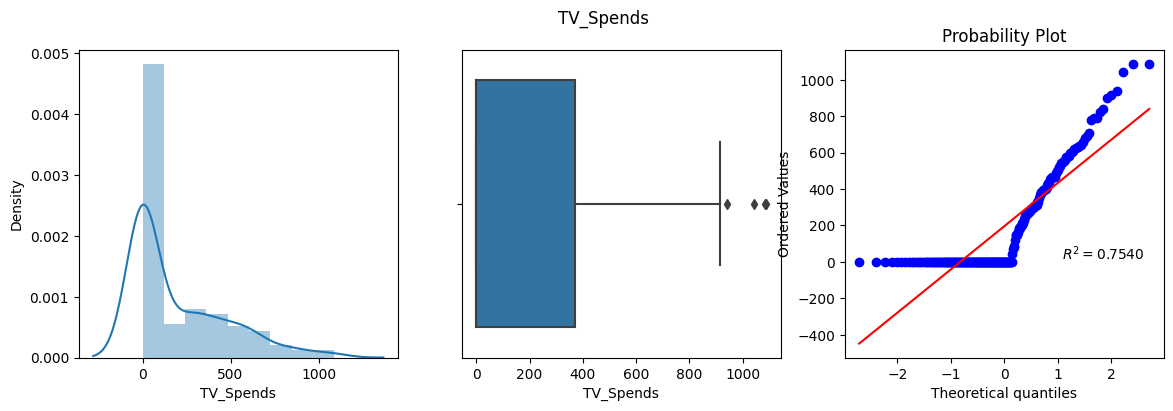

Skewness of OOH_Spends: 1.3053274784737843
Kurtosis of OOH_Spends: 0.7596563404737315


<Figure size 640x480 with 0 Axes>

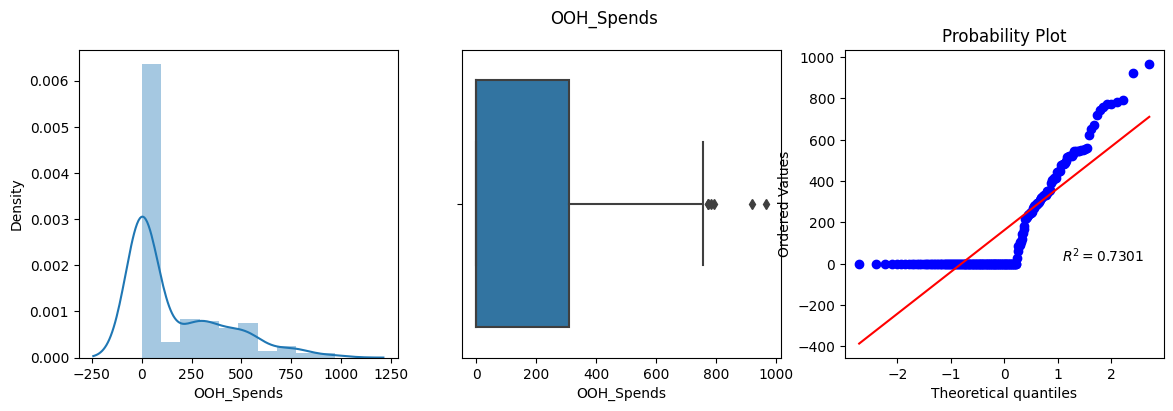

Skewness of Print_Spends: 1.076795872527206
Kurtosis of Print_Spends: -0.17456358552524476


<Figure size 640x480 with 0 Axes>

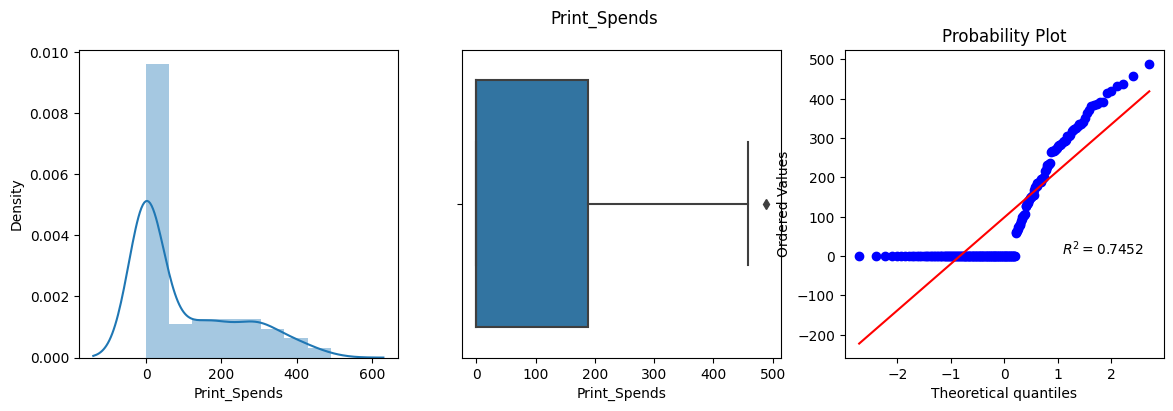

Skewness of FB_Impressions: 0.6444070644176949
Kurtosis of FB_Impressions: -0.9218661210077914


<Figure size 640x480 with 0 Axes>

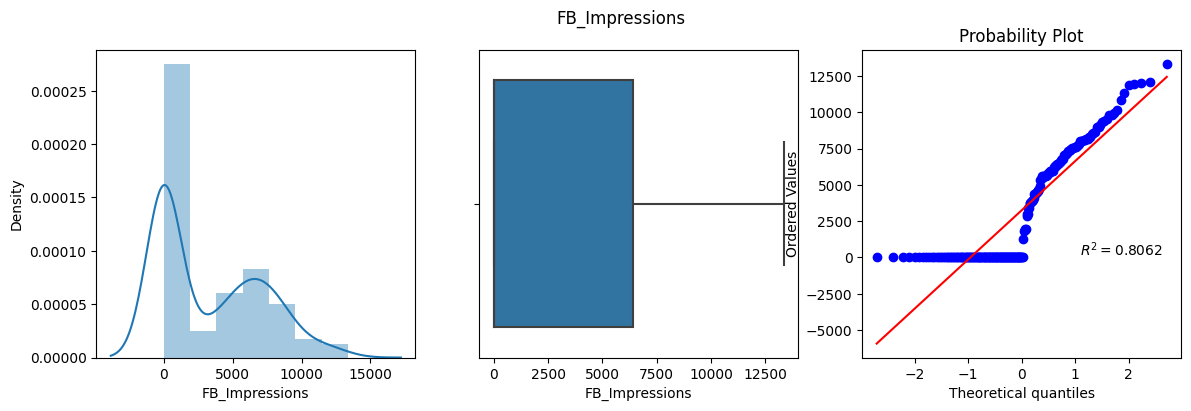

Skewness of Paid_Search_Clicks: 0.7258130394327139
Kurtosis of Paid_Search_Clicks: -0.22398466622431634


<Figure size 640x480 with 0 Axes>

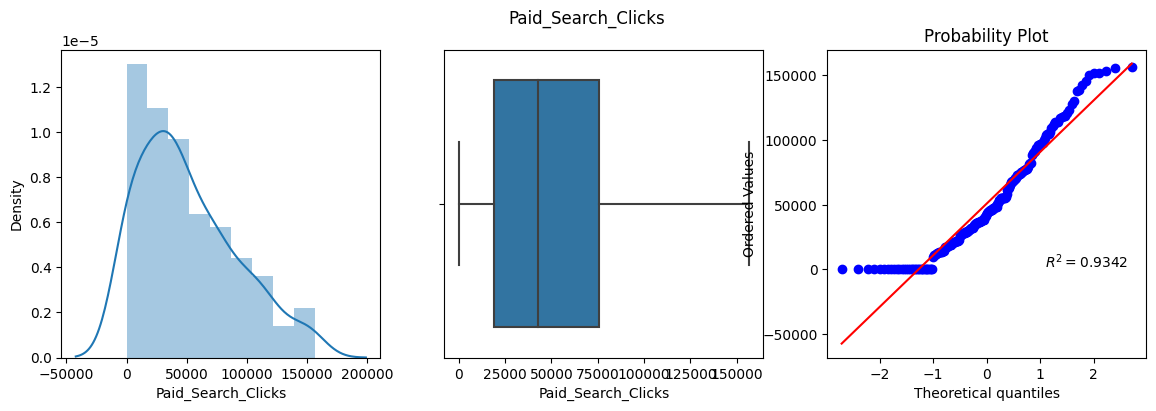

Skewness of Search_Spends: -0.4191792268571211
Kurtosis of Search_Spends: -0.5317203100481112


<Figure size 640x480 with 0 Axes>

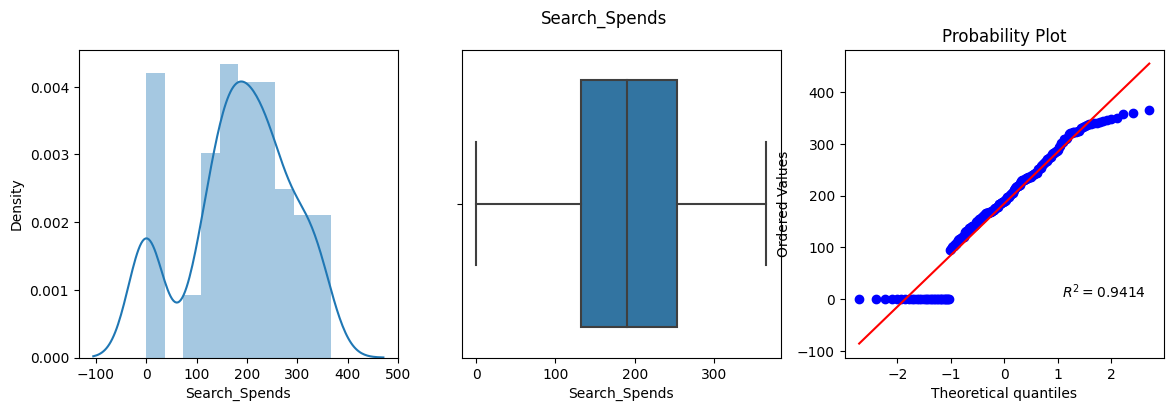

Skewness of competitor_sales_B: 0.1365815441207366
Kurtosis of competitor_sales_B: -1.2275321246206816


<Figure size 640x480 with 0 Axes>

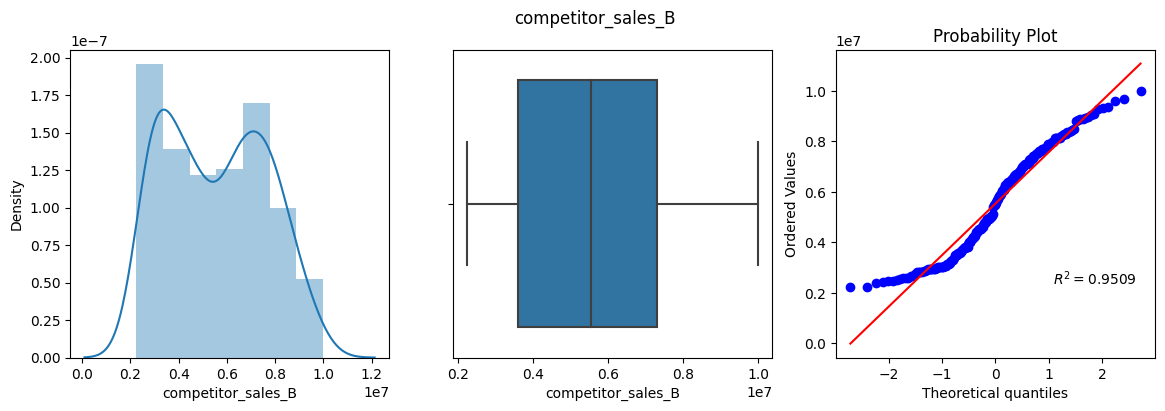

Skewness of FB_Spends: 0.6989410662174937
Kurtosis of FB_Spends: -0.8402603062108098


<Figure size 640x480 with 0 Axes>

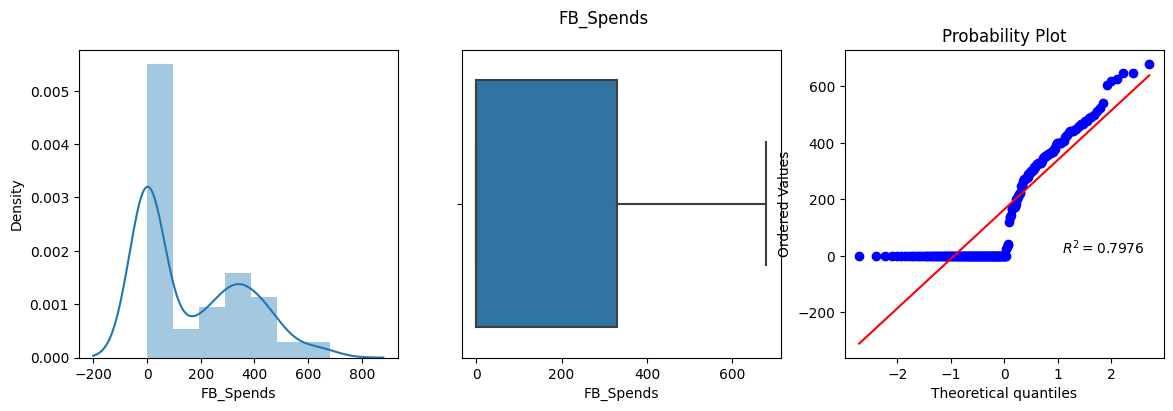

Skewness of year: -0.05078051343279563
Kurtosis of year: -1.1278308430264758


<Figure size 640x480 with 0 Axes>

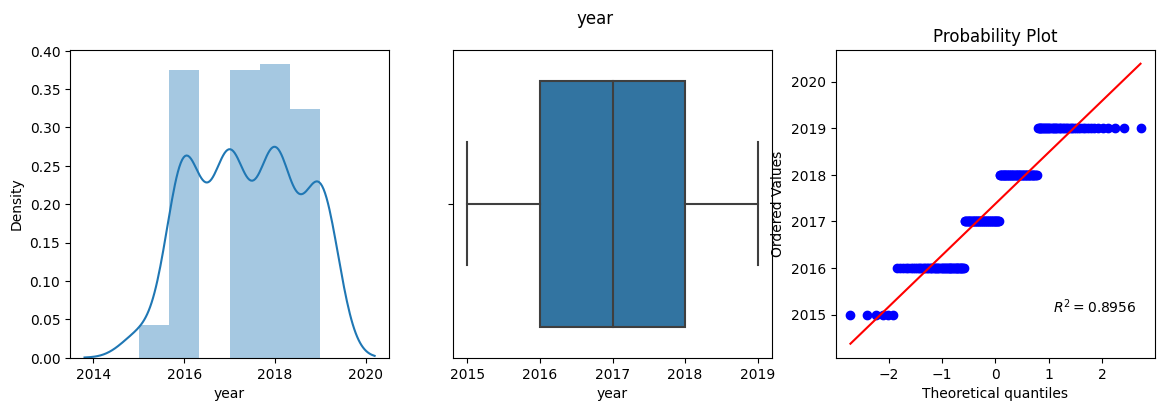

Skewness of daysinmonth: -1.5570736540648071
Kurtosis of daysinmonth: 2.0636998297478177


<Figure size 640x480 with 0 Axes>

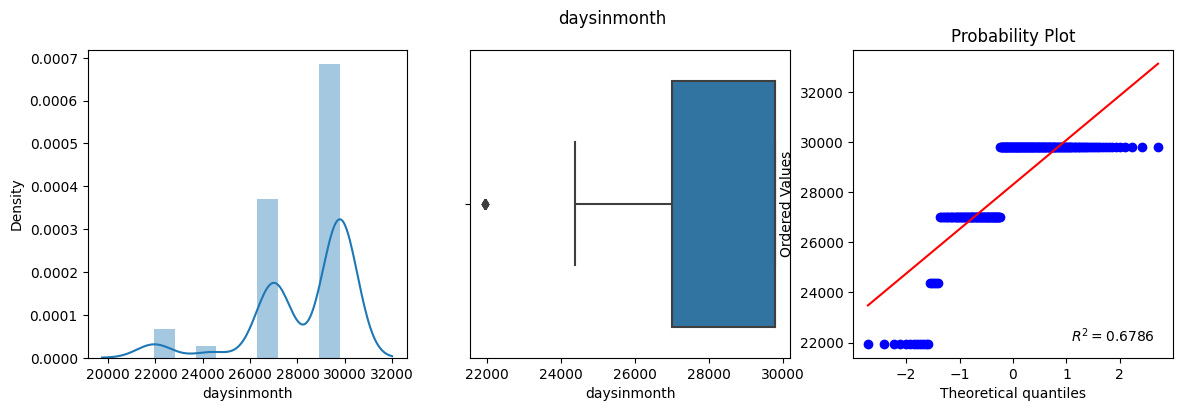

Skewness of Cost: 0.5294601420545173
Kurtosis of Cost: 0.09819930429202683


<Figure size 640x480 with 0 Axes>

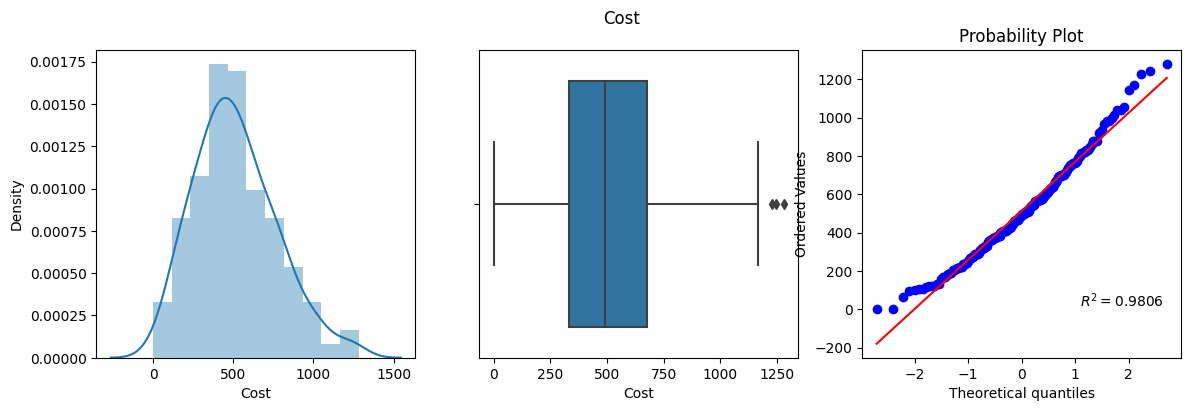

Skewness of Revenue: 0.08141150490176528
Kurtosis of Revenue: -0.9288581219899492


<Figure size 640x480 with 0 Axes>

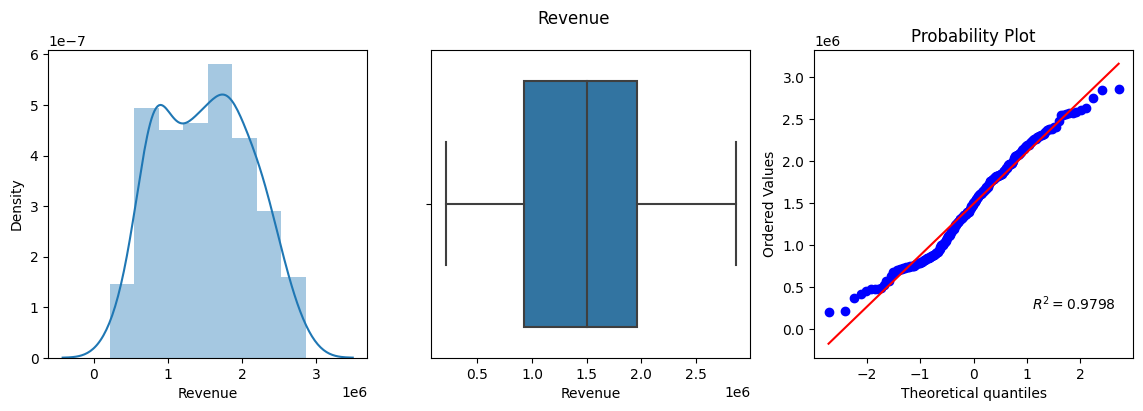

Skewness of CPM: 0.07466030623198328
Kurtosis of CPM: -0.4966099109326909


<Figure size 640x480 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


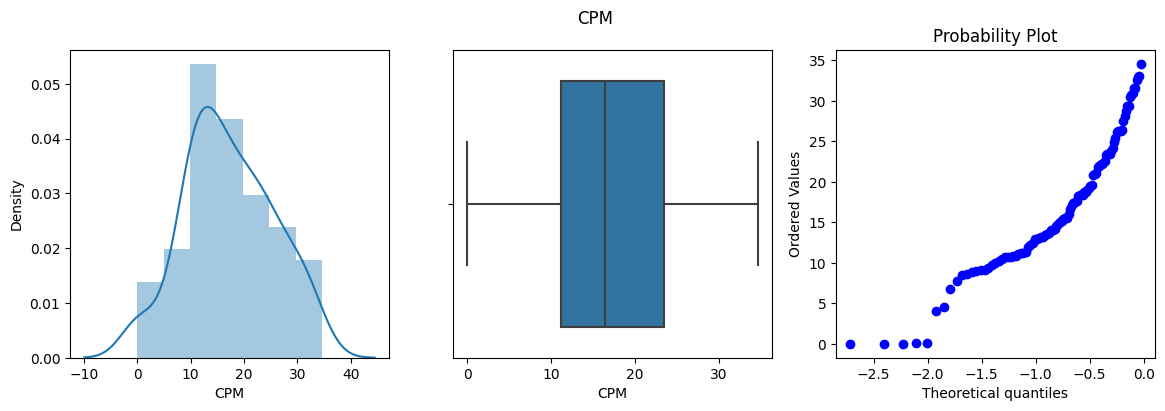

Skewness of CPC: 0.3979455274240653
Kurtosis of CPC: -1.105756446290241


<Figure size 640x480 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


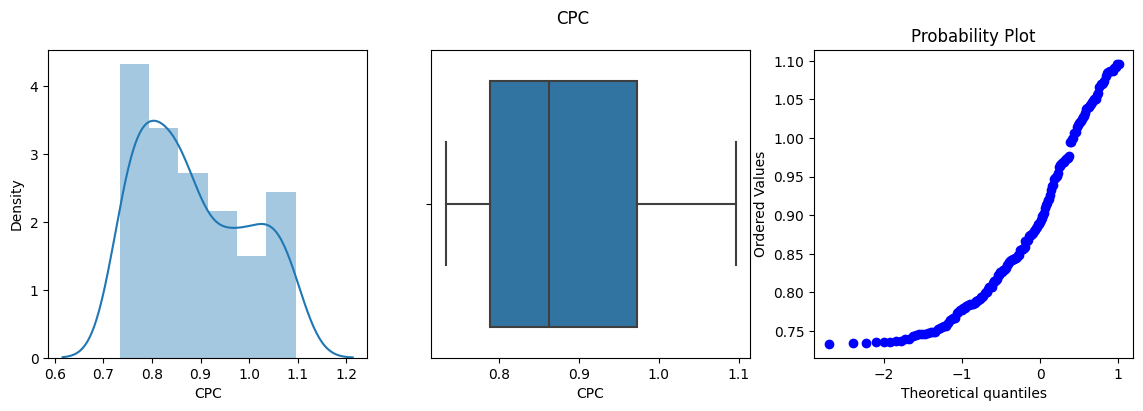

Skewness of CPS: 0.4144631304219167
Kurtosis of CPS: -0.04797378850117884


<Figure size 640x480 with 0 Axes>

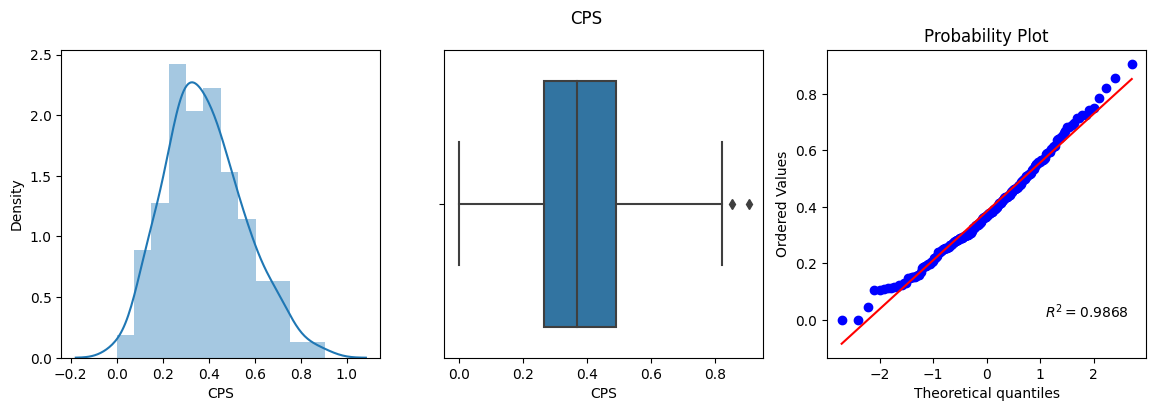

Skewness of ROI: -2.555401002155182
Kurtosis of ROI: 34.1532543248741


<Figure size 640x480 with 0 Axes>

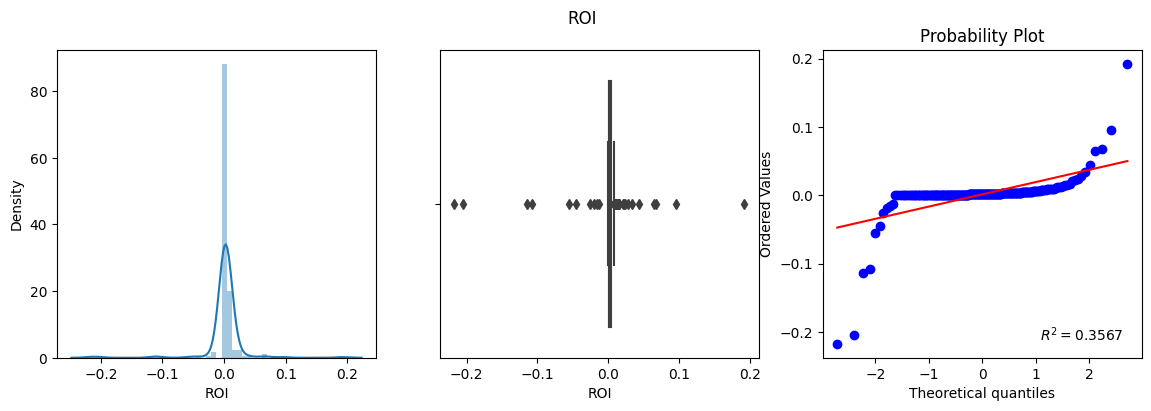

<Figure size 640x480 with 0 Axes>

In [41]:
for col in df.columns:
    if isinstance(df[col][0],np.number):
        print(f"Skewness of {col}:",df[col].skew())
        print(f"Kurtosis of {col}:",df[col].kurtosis())
        plt.figure(figsize=(14,4))
        plt.subplot(131)
        sns.distplot(df[col])
        plt.subplot(132)
        sns.boxplot(df[col])
        plt.subplot(133)
        probplot(df[col],rvalue=True,plot=plt,dist='norm')
        plt.suptitle(col)
        plt.show()
        plt.tight_layout()

In [42]:
outlier_cols = ['TV_Spends','OOH_Spends','Print_Spends','daysinmonth','Cost','CPS','ROI']

In [43]:
def remove_outliers(col):
    lower_limit, upper_limit = df[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [44]:
for col in outlier_cols:
    df[col] = remove_outliers(col)

Skewness of Sales: 0.24521570453575126
Kurtosis of Sales: -0.8304394212678265


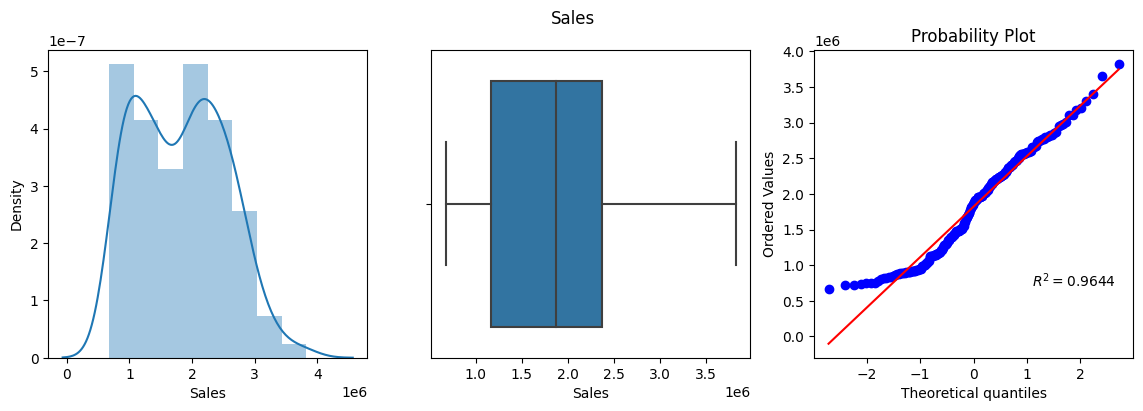

Skewness of TV_Spends: 1.1787652374584585
Kurtosis of TV_Spends: 0.2947058456459817


<Figure size 640x480 with 0 Axes>

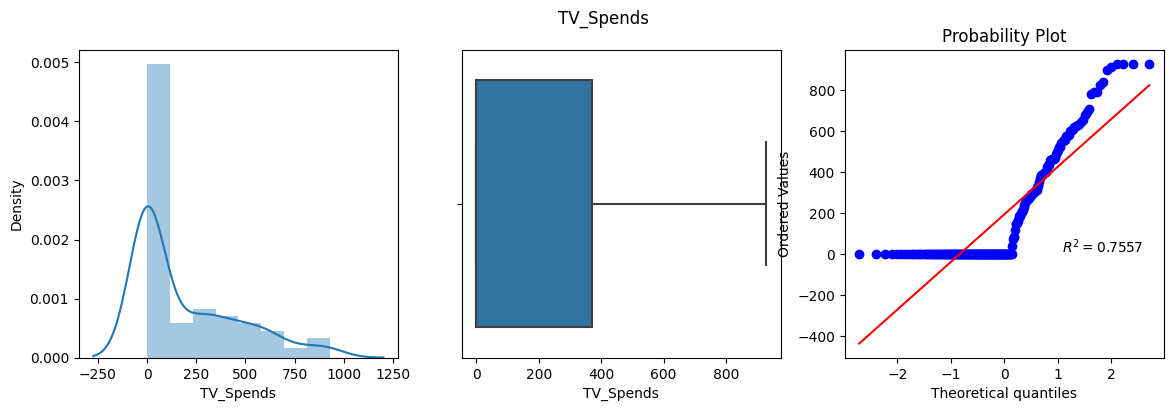

Skewness of OOH_Spends: 1.2028974360228257
Kurtosis of OOH_Spends: 0.2517664470505312


<Figure size 640x480 with 0 Axes>

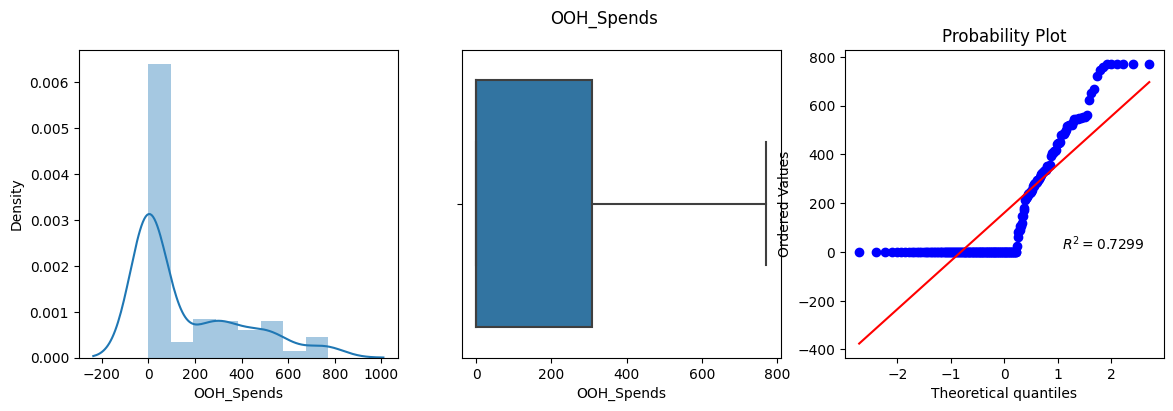

Skewness of Print_Spends: 1.069686877691752
Kurtosis of Print_Spends: -0.20770582573543495


<Figure size 640x480 with 0 Axes>

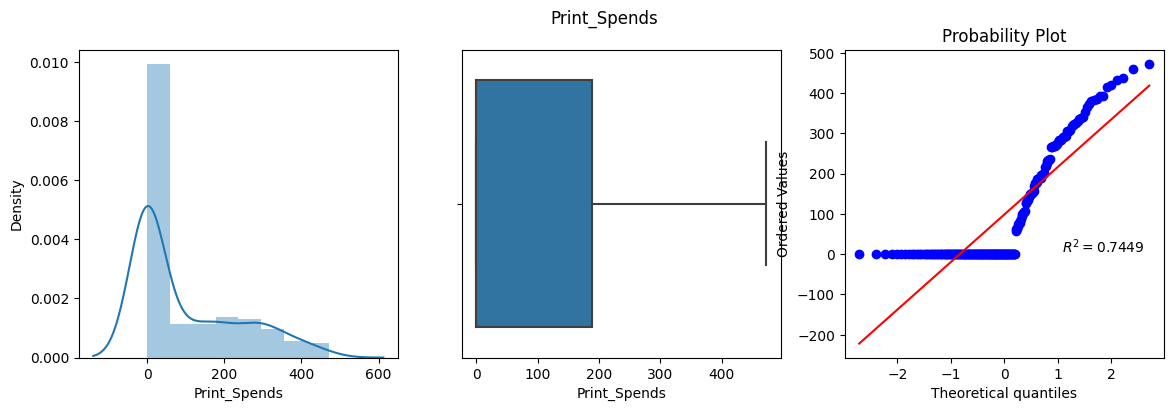

Skewness of FB_Impressions: 0.6444070644176949
Kurtosis of FB_Impressions: -0.9218661210077914


<Figure size 640x480 with 0 Axes>

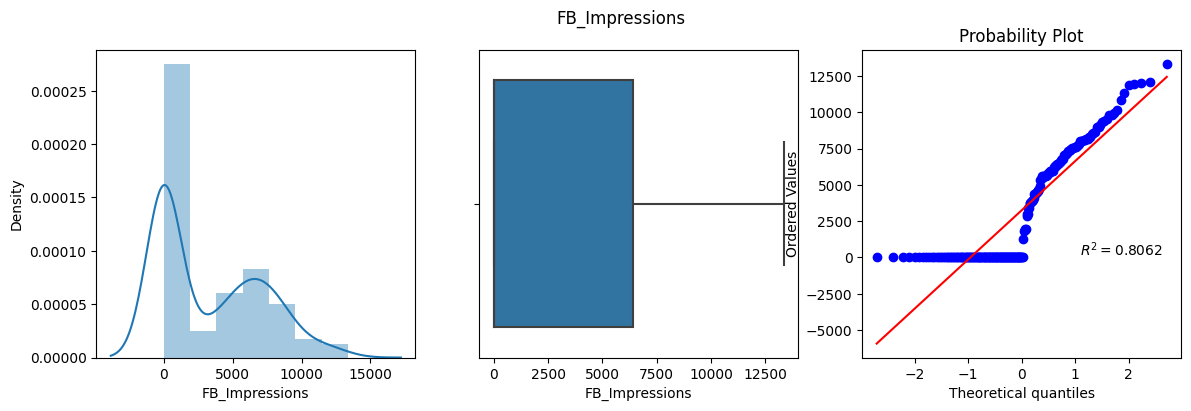

Skewness of Paid_Search_Clicks: 0.7258130394327139
Kurtosis of Paid_Search_Clicks: -0.22398466622431634


<Figure size 640x480 with 0 Axes>

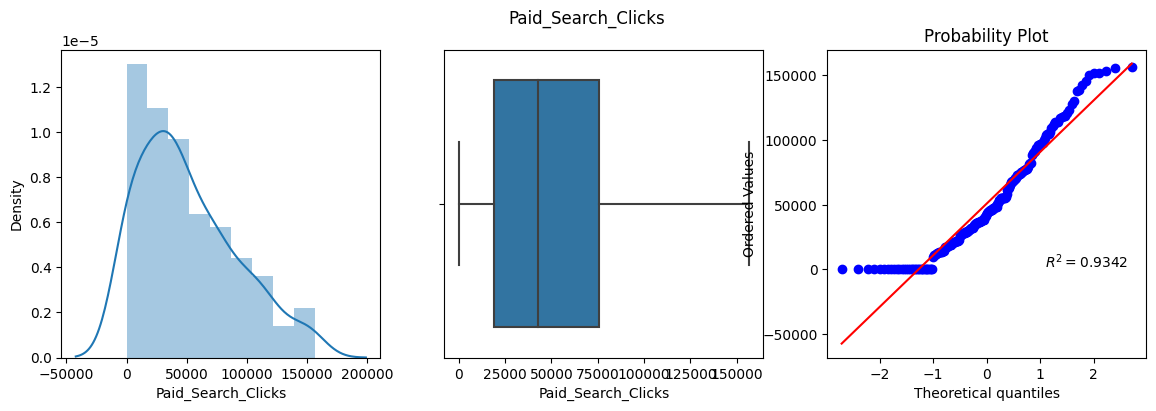

Skewness of Search_Spends: -0.4191792268571211
Kurtosis of Search_Spends: -0.5317203100481112


<Figure size 640x480 with 0 Axes>

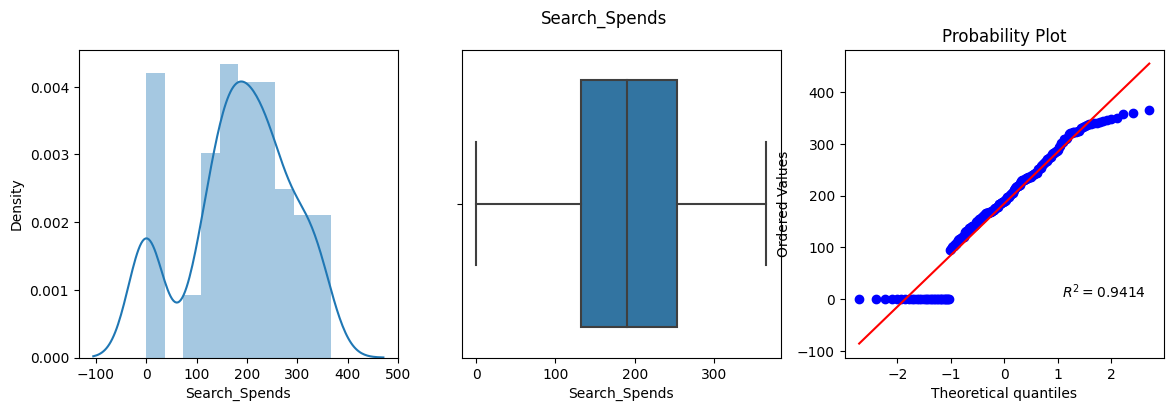

Skewness of competitor_sales_B: 0.1365815441207366
Kurtosis of competitor_sales_B: -1.2275321246206816


<Figure size 640x480 with 0 Axes>

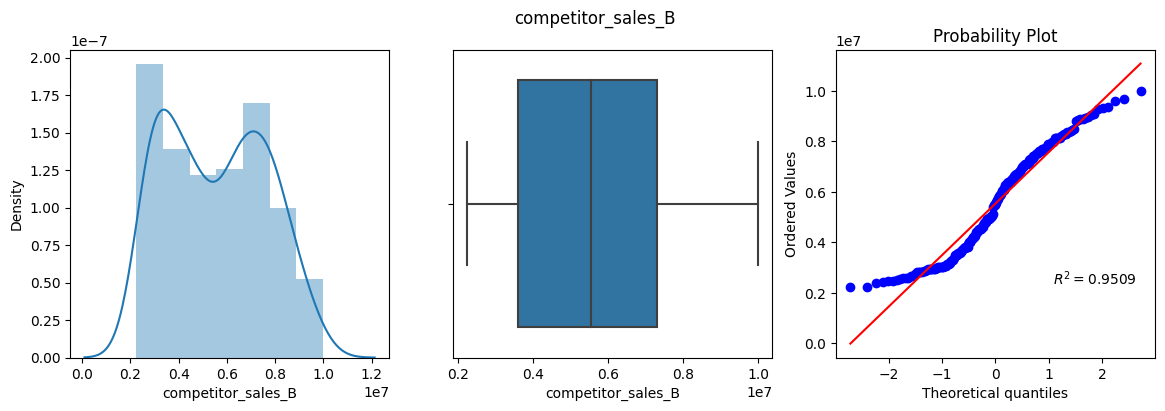

Skewness of FB_Spends: 0.6989410662174937
Kurtosis of FB_Spends: -0.8402603062108098


<Figure size 640x480 with 0 Axes>

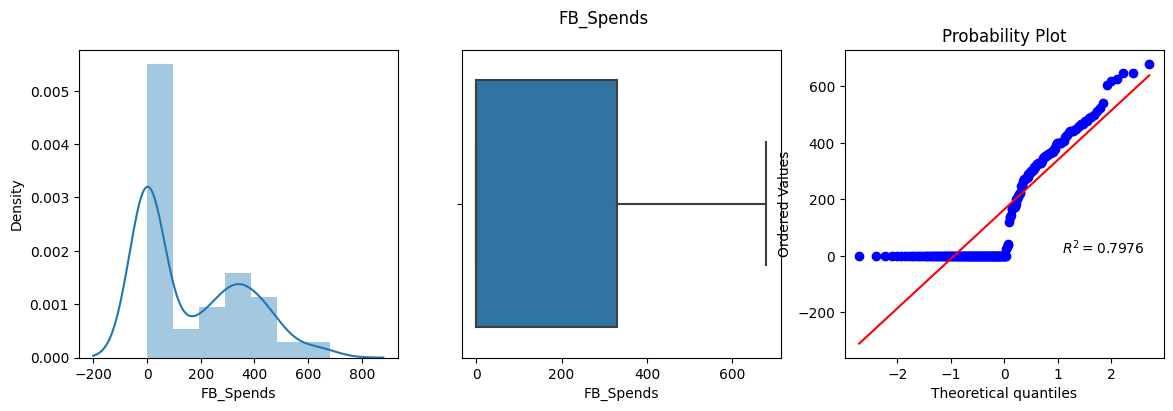

Skewness of year: -0.05078051343279563
Kurtosis of year: -1.1278308430264758


<Figure size 640x480 with 0 Axes>

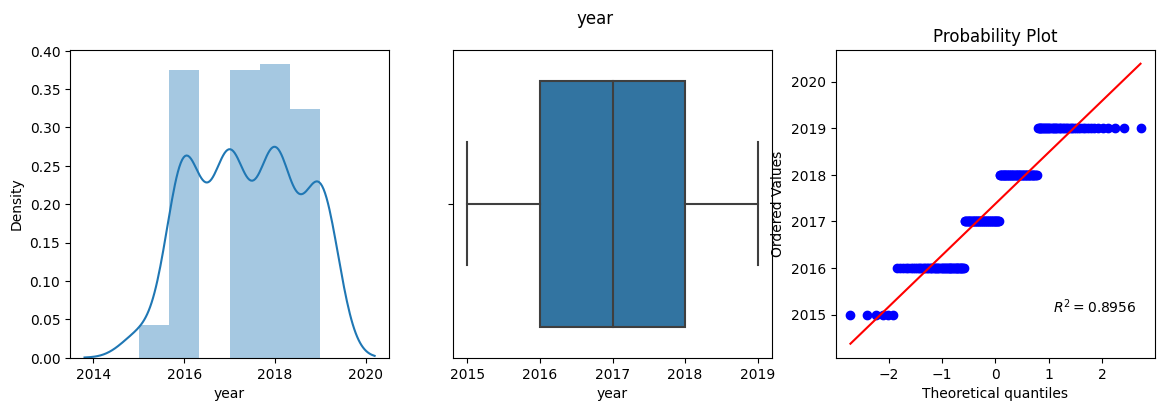

Skewness of daysinmonth: -1.3250691086958846
Kurtosis of daysinmonth: 1.1255890781072182


<Figure size 640x480 with 0 Axes>

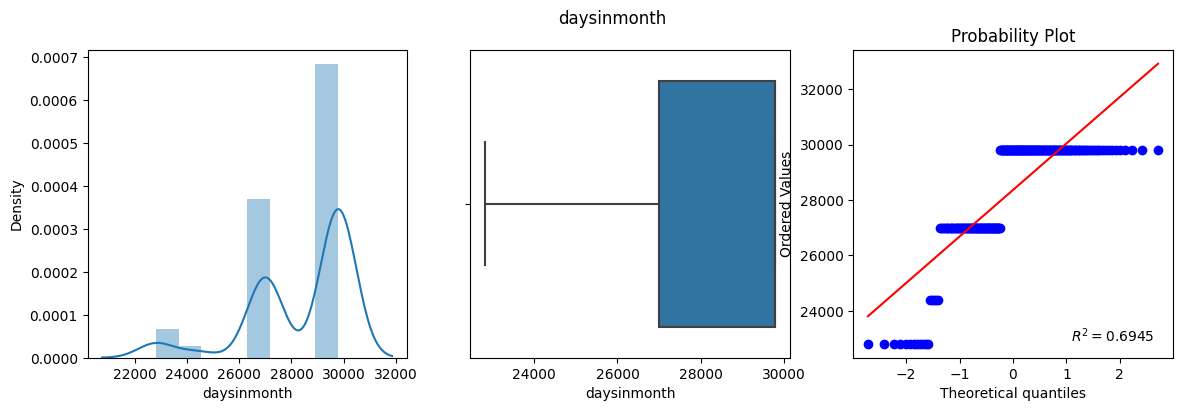

Skewness of Cost: 0.4794285620200815
Kurtosis of Cost: -0.06747686137304676


<Figure size 640x480 with 0 Axes>

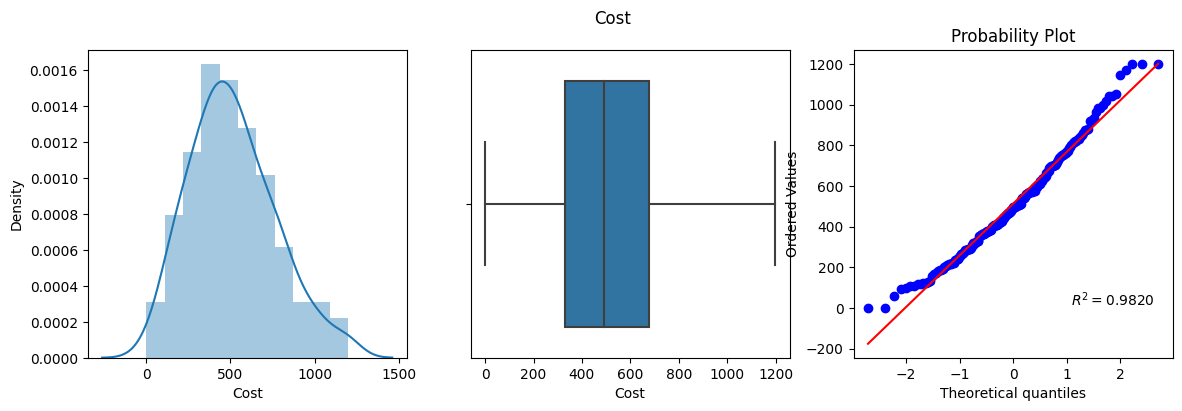

Skewness of Revenue: 0.08141150490176528
Kurtosis of Revenue: -0.9288581219899492


<Figure size 640x480 with 0 Axes>

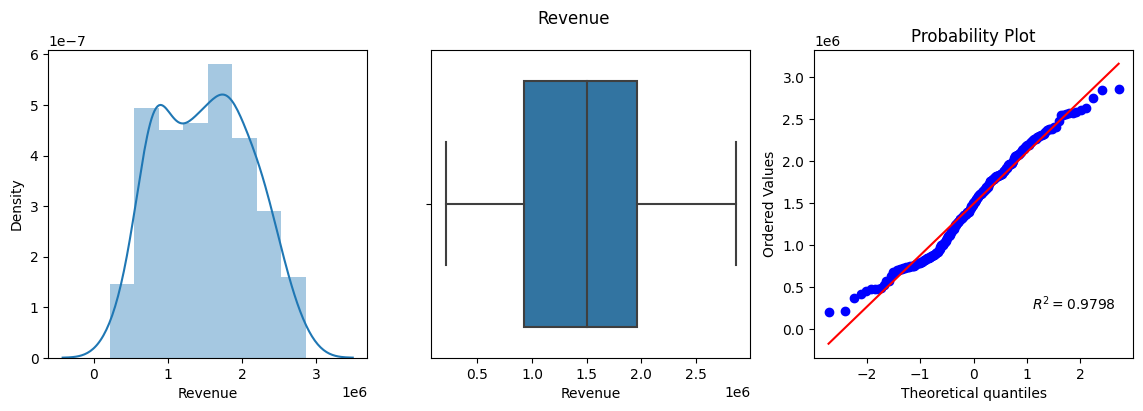

Skewness of CPM: 0.07466030623198328
Kurtosis of CPM: -0.4966099109326909


<Figure size 640x480 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


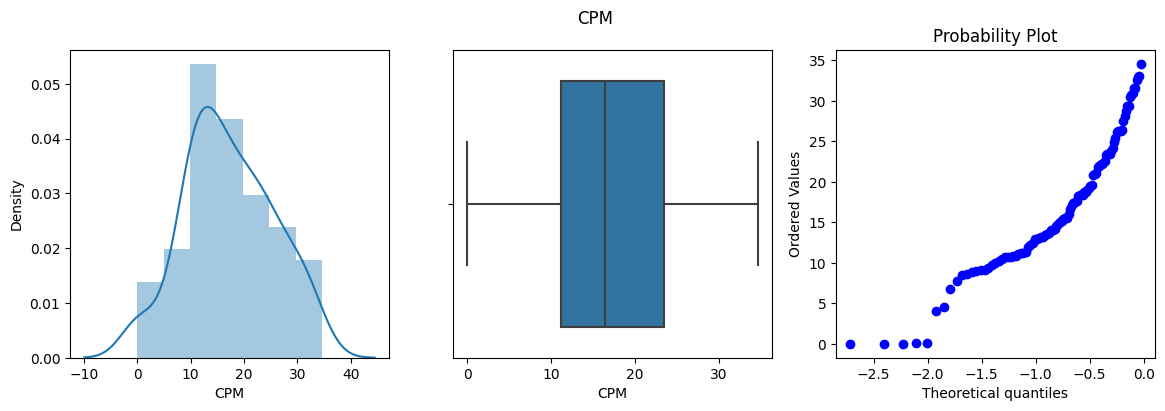

Skewness of CPC: 0.3979455274240653
Kurtosis of CPC: -1.105756446290241


<Figure size 640x480 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


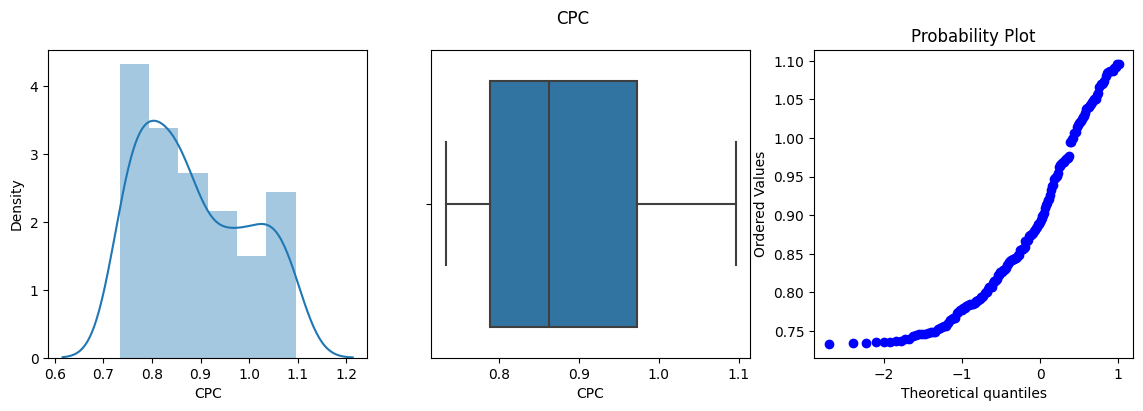

Skewness of CPS: 0.364319265471017
Kurtosis of CPS: -0.20878980765172006


<Figure size 640x480 with 0 Axes>

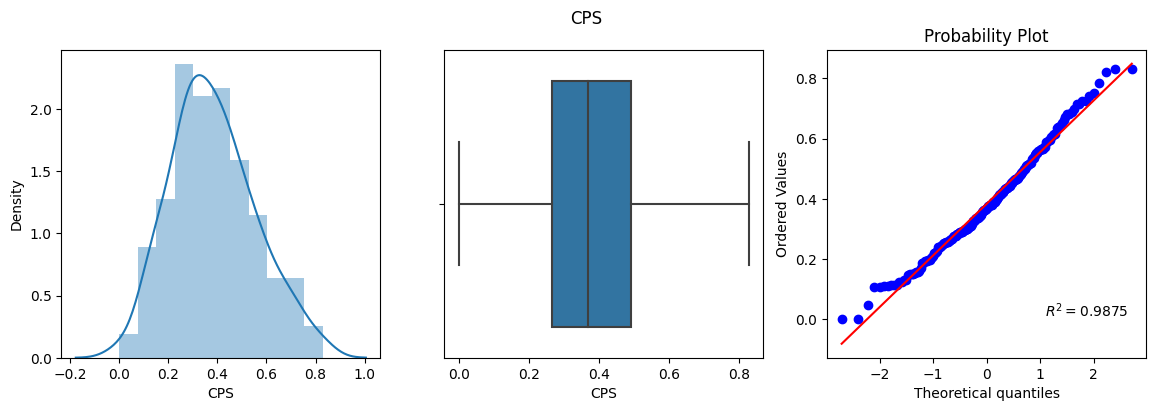

Skewness of ROI: 0.5488605928482503
Kurtosis of ROI: 0.1641579657165555


<Figure size 640x480 with 0 Axes>

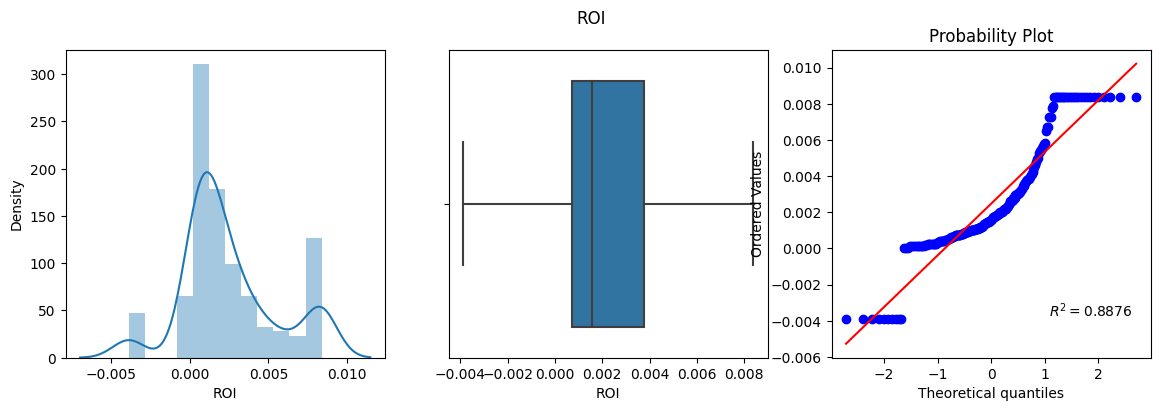

<Figure size 640x480 with 0 Axes>

In [45]:
for col in df.columns:
    if isinstance(df[col][0],np.number):
        print(f"Skewness of {col}:",df[col].skew())
        print(f"Kurtosis of {col}:",df[col].kurtosis())
        plt.figure(figsize=(14,4))
        plt.subplot(131)
        sns.distplot(df[col])
        plt.subplot(132)
        sns.boxplot(df[col])
        plt.subplot(133)
        probplot(df[col],rvalue=True,plot=plt,dist='norm')
        plt.suptitle(col)
        plt.show()
        plt.tight_layout()

### Categorical Encoding

In [46]:
events_encoded = pd.get_dummies(df.events)
df = pd.concat([df,events_encoded],axis=1)
df.head()

DATE        Sales   TV_Spends  OOH_Spends  Print_Spends  \
0 2015-11-23  2754371.667  409.496764    0.000000    308.971951   
1 2015-11-30  2584276.667  463.250364    0.000000      0.000000   
2 2015-12-07  2547386.667    0.000000  498.018072     58.343809   
3 2015-12-14  2875220.000  791.124074    0.000000    364.142829   
4 2015-12-21  2215953.333    0.000000  721.113722      0.000000   

   FB_Impressions  Paid_Search_Clicks  Search_Spends  competitor_sales_B  \
0     8538.375297             0.00000       0.000000             8125009   
1     4071.989630         29511.71546     176.068169             7901549   
2     7067.869104         36132.35896     168.522995             8300197   
3     5625.770794         36804.21096     178.605711             8122883   
4     2966.861891         28401.74407     164.620776             7105985   

    FB_Spends  ...       ROI event0 event1  event10  event2  event5  event6  \
0  477.717477  ...  0.002774      0      0        0       0       0       0   
1  185.090717  ...  0.001382      0      0        0       0       0       0   
2  357.339140  ...  0.002352      1      0        0       0       0       0   
3  289.852929  ...  0.007762      0      0        0       0       0       0   
4  143.831423  ...  0.005256      0      0        0       0       0       0   

   event7  event9  na  
0       0       0   1  
1       0       0   1  
2       0       0   0  
3       0       0   1  
4       0       0   1  

[5 rows x 30 columns]

In [47]:
df.drop(['DATE','events'],axis=1,inplace=True) # Dropping the encoded features

In [48]:
oe = OrdinalEncoder(categories=[['January','February','March','April','May','June','July','August','September','October','November','December']])
df.month = oe.fit_transform(df[['month']])
df.month = df.month.astype(int)

In [49]:
df.day.unique()

array(['Monday'], dtype=object)

In [50]:
df.drop('day',axis=1,inplace=True)

### Splitting the dataset into independent and dependent features

In [51]:
X = df.drop('Sales',axis=1)
y = df.Sales

### Dividing the dataset into training and test sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101,shuffle=True)

### Feature Selection

In [53]:
# Imputing the missing values of features "CPM" and "CPC" using KNN Imputer
knn = KNNImputer()
X_train.CPM = knn.fit_transform(X_train[['CPM']])
X_test.CPM = knn.transform(X_test[['CPM']])
X_train.CPC = knn.fit_transform(X_train[['CPC']])
X_test.CPC = knn.transform(X_test[['CPC']])

In [54]:
kbest = SelectKBest(k=10,score_func=f_regression)
kbest.fit(X_train,y_train)

SelectKBest(score_func=<function f_regression at 0x000002D852B68C10>)

In [55]:
selected_features = kbest.get_feature_names_out()
selected_features

array(['TV_Spends', 'Print_Spends', 'FB_Impressions',
       'Paid_Search_Clicks', 'Search_Spends', 'competitor_sales_B',
       'FB_Spends', 'month', 'Cost', 'Revenue'], dtype=object)

In [56]:
p_values = sorted(kbest.pvalues_)[-11:-1]
p_values

[0.29621362809634305,
 0.4117374290552849,
 0.4854282592677701,
 0.5191069637621774,
 0.5240722060102341,
 0.5260145210689713,
 0.5610557516486525,
 0.6247269979130835,
 0.7174908169529665,
 0.8149251225529097]

In [57]:
percentile = SelectPercentile(percentile=40,score_func=mutual_info_regression)
percentile.fit(X_train,y_train)

SelectPercentile(percentile=40,
                 score_func=<function mutual_info_regression at 0x000002D852B6B640>)

In [58]:
selected_features = percentile.get_feature_names_out()
selected_features

array(['FB_Impressions', 'Paid_Search_Clicks', 'Search_Spends',
       'competitor_sales_B', 'FB_Spends', 'month', 'daysinmonth', 'Cost',
       'Revenue', 'CPC'], dtype=object)

In [59]:
scores = percentile.scores_
scores

array([7.23428038e-02, 0.00000000e+00, 0.00000000e+00, 1.38218084e-01,
       2.26453768e-01, 3.91721631e-01, 1.85563034e+00, 1.40362830e-01,
       1.03035418e+00, 0.00000000e+00, 2.08168839e-01, 1.57324862e-01,
       9.97497534e-01, 7.60956266e-02, 7.85898066e-02, 2.71179576e-03,
       0.00000000e+00, 1.11022302e-16, 2.22044605e-16, 2.29885057e-03,
       2.29885057e-03, 0.00000000e+00, 0.00000000e+00, 6.89655172e-03,
       0.00000000e+00, 1.11484289e-02])

In [60]:
sfm = SelectFromModel(estimator=RandomForestRegressor(),threshold='median',max_features=10)
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestRegressor(), max_features=10,
                threshold='median')

In [61]:
selected_features = sfm.get_feature_names_out()
selected_features

array(['TV_Spends', 'competitor_sales_B', 'FB_Spends', 'month', 'Cost',
       'Revenue', 'CPM', 'CPC', 'CPS', 'ROI'], dtype=object)

In [62]:
rfe = RFECV(estimator=RandomForestRegressor(),step=2,min_features_to_select=10,cv=RepeatedKFold(n_splits=5,n_repeats=2),verbose=1)
rfe.fit(X_train,y_train)

Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 fe

RFECV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=None),
      estimator=RandomForestRegressor(), min_features_to_select=10, step=2,
      verbose=1)

In [63]:
selected_features = rfe.get_feature_names_out()
selected_features

array(['TV_Spends', 'Print_Spends', 'FB_Impressions',
       'competitor_sales_B', 'month', 'Cost', 'Revenue', 'CPM', 'CPS',
       'ROI'], dtype=object)

In [64]:
cv_results = pd.DataFrame(rfe.cv_results_)
cv_results

mean_test_score  std_test_score  split0_test_score  split1_test_score  \
0         0.953846        0.025036           0.934461           0.952460   
1         0.952678        0.024481           0.930628           0.952234   
2         0.949106        0.026685           0.936129           0.947903   
3         0.949527        0.023309           0.927902           0.955995   
4         0.950482        0.025952           0.931175           0.948924   
5         0.950338        0.027089           0.933802           0.956256   
6         0.948114        0.024669           0.938335           0.944549   
7         0.947927        0.027466           0.930386           0.943013   
8         0.951625        0.027313           0.923922           0.952528   

   split2_test_score  split3_test_score  split4_test_score  split5_test_score  \
0           0.940314           0.975687           0.965355           0.890721   
1           0.948455           0.973885           0.955913           0.893063   
2           0.933233           0.977461           0.955181           0.882879   
3           0.933202           0.971943           0.955299           0.895417   
4           0.935897           0.974741           0.959209           0.887646   
5           0.925562           0.976685           0.949434           0.886238   
6           0.923984           0.966755           0.957468           0.891066   
7           0.924109           0.973171           0.953808           0.884101   
8           0.942030           0.975498           0.966201           0.886765   

   split6_test_score  split7_test_score  split8_test_score  split9_test_score  
0           0.969035           0.962953           0.971764           0.975711  
1           0.975375           0.948622           0.972257           0.976344  
2           0.967702           0.946654           0.965795           0.978122  
3           0.965198           0.949570           0.964098           0.976647  
4           0.971468           0.948388           0.971165           0.976204  
5           0.974094           0.955891           0.969869           0.975545  
6           0.969384           0.945269           0.965521           0.978805  
7           0.970971           0.952419           0.970093           0.977198  
8           0.970642           0.946651           0.971830           0.980185

In [65]:
sfs = SequentialFeatureSelector(estimator=RandomForestRegressor(),direction='backward',n_features_to_select=10)
sfs.fit(X_train,y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=RandomForestRegressor(),
                          n_features_to_select=10)

In [66]:
selected_features = sfs.get_feature_names_out()
selected_features

array(['TV_Spends', 'competitor_sales_B', 'year', 'Cost', 'Revenue',
       'CPS', 'event1', 'event10', 'event5', 'event6'], dtype=object)

In [67]:
lasso = SelectFromModel(estimator=LassoCV(),max_features=10,threshold='median')
lasso.fit(X_train,y_train)

SelectFromModel(estimator=LassoCV(), max_features=10, threshold='median')

In [68]:
selected_features = lasso.get_feature_names_out()
selected_features

array(['TV_Spends', 'OOH_Spends', 'Print_Spends', 'FB_Impressions',
       'Paid_Search_Clicks', 'Search_Spends', 'competitor_sales_B',
       'FB_Spends', 'month', 'Revenue'], dtype=object)

In [69]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [70]:
feat_imp = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
feat_imp = feat_imp.sort_values('importance',ascending=False)
feat_imp.head(10)

feature  importance
6   competitor_sales_B    0.526396
12             Revenue    0.421944
11                Cost    0.015886
13                 CPM    0.006584
0            TV_Spends    0.006431
8                month    0.004104
14                 CPC    0.002922
2         Print_Spends    0.002623
15                 CPS    0.002502
7            FB_Spends    0.002249

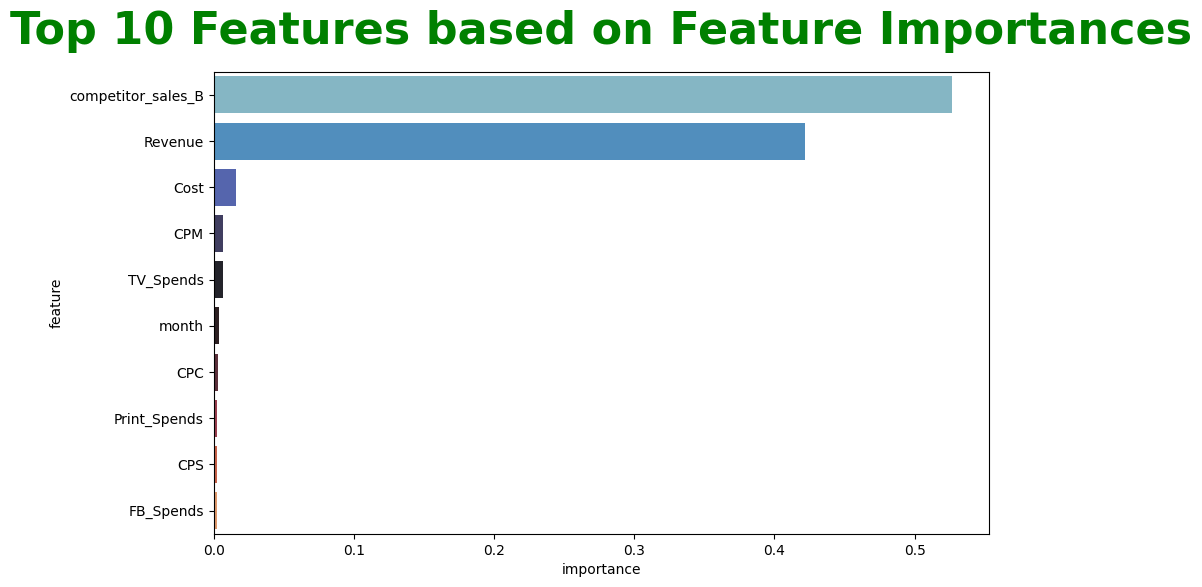

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance',y='feature',data=feat_imp[:10],orient='horizontal',palette='icefire')
plt.title('Top 10 Features based on Feature Importances',fontsize=32,fontweight='bold',color='green',pad=20);

Final selected features: TV_Spends, Print_Spends, FB_Impressions, Paid_Search_Clicks, Search_Spends, competitor_sales_B, FB_Spends, month, Cost, Revenue

In [72]:
selected_features = kbest.get_feature_names_out()
selected_features

array(['TV_Spends', 'Print_Spends', 'FB_Impressions',
       'Paid_Search_Clicks', 'Search_Spends', 'competitor_sales_B',
       'FB_Spends', 'month', 'Cost', 'Revenue'], dtype=object)

In [73]:
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

### Feature Scaling and Normalization

In [74]:
scaler = StandardScaler()
features = X_train_final.columns
X_train_final = scaler.fit_transform(X_train_final)
X_train_final = pd.DataFrame(X_train_final,columns=features)
X_test_final = scaler.transform(X_test_final)
X_test_final = pd.DataFrame(X_test_final,columns=features)
X_train_final.head()

TV_Spends  Print_Spends  FB_Impressions  Paid_Search_Clicks  Search_Spends  \
0  -0.783061     -0.664231       -0.848186           -0.858039      -0.695131   
1   2.711955      1.312909        0.890787           -0.573911      -0.296307   
2  -0.783061     -0.664231       -0.848186            0.618792       0.527713   
3  -0.219207      0.466012       -0.848186            2.490902       1.796331   
4  -0.783061      0.620425        1.103090            0.549877       0.798168   

   competitor_sales_B  FB_Spends     month      Cost   Revenue  
0           -0.793617  -0.824788  0.204947 -1.524125 -0.565995  
1            0.433057   0.748810  1.078983  2.647512 -1.189587  
2           -0.936747  -0.824788  0.204947 -0.334867 -0.948763  
3            1.580243  -0.824788  1.370329 -0.343566  1.658552  
4            1.825973   1.104739  1.370329 -0.074813  1.739348

In [75]:
X_test_final.head()

TV_Spends  Print_Spends  FB_Impressions  Paid_Search_Clicks  Search_Spends  \
0  -0.783061      0.428265       -0.848186            0.332446       0.310150   
1   1.254396      1.819061       -0.848186            1.097669       0.874541   
2   0.979124      0.564416       -0.848186           -1.296380      -1.903236   
3  -0.475982     -0.664231       -0.848186            1.120051       0.984434   
4  -0.783061     -0.664231       -0.848186           -0.294711       0.094439   

   competitor_sales_B  FB_Spends     month      Cost   Revenue  
0           -1.163592  -0.824788 -0.669090 -0.960187 -1.000680  
1            0.416524  -0.824788 -1.543127  0.705407  0.356319  
2           -1.531122  -0.824788 -0.377745 -0.020802 -1.563172  
3            0.854017  -0.824788  0.787638 -0.522858  0.898265  
4           -1.454583  -0.824788 -0.377745 -1.157502 -1.266453

## Model Training & Evaluation

In [76]:
models = []
r2_scores = []
rmse_scores = []
mape_scores = []
rmsle_scores = []

In [77]:
# Custom function for training and evaluating the performance of machine learning algorithms
def train_and_evaluate_model(model):
    models.append(model)
    model.fit(X_train_final,y_train)
    pred = model.predict(X_test_final)
    mape = mean_absolute_percentage_error(y_test,pred)
    print("Mean Absolute Percentage Error:",mape)
    mape_scores.append(mape)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    print("Root Mean Squared Error:",rmse)
    rmse_scores.append(rmse)
    rmsle = np.sqrt(mean_squared_log_error(y_test,pred))
    print("Root Mean Squared Log Error:",rmsle)
    rmsle_scores.append(rmsle)
    r2 = r2_score(y_test,pred)
    print("R2 Score:",r2)
    r2_scores.append(r2)

In [78]:
train_and_evaluate_model(LinearRegression())

Mean Absolute Percentage Error: 0.037602824334626514
Root Mean Squared Error: 95719.65932929565
Root Mean Squared Log Error: 0.054083587741203705
R2 Score: 0.9776935128173896


In [79]:
train_and_evaluate_model(RidgeCV())

Mean Absolute Percentage Error: 0.037576727144972885
Root Mean Squared Error: 95459.3213232264
Root Mean Squared Log Error: 0.05398820597383878
R2 Score: 0.9778146860267136


In [80]:
train_and_evaluate_model(LassoCV())

Mean Absolute Percentage Error: 0.03783084232199294
Root Mean Squared Error: 94616.6682867993
Root Mean Squared Log Error: 0.05441759560536869
R2 Score: 0.9782046324533435


In [81]:
train_and_evaluate_model(ElasticNetCV())

Mean Absolute Percentage Error: 0.387978940632649
Root Mean Squared Error: 637848.9992897833
Root Mean Squared Log Error: 0.3986055426448395
R2 Score: 0.009476800952389897


In [82]:
train_and_evaluate_model(PassiveAggressiveRegressor())

Mean Absolute Percentage Error: 0.907267207643512
Root Mean Squared Error: 1796564.495941118
Root Mean Squared Log Error: 2.4916878409008674
R2 Score: -6.8580451575580055


In [83]:
train_and_evaluate_model(SGDRegressor())

Mean Absolute Percentage Error: 0.037566835227451675
Root Mean Squared Error: 94392.6483730361
Root Mean Squared Log Error: 0.0537273258228889
R2 Score: 0.9783077182264387


In [84]:
train_and_evaluate_model(HuberRegressor())

Mean Absolute Percentage Error: 0.03257423090991409
Root Mean Squared Error: 97713.81345166509
Root Mean Squared Log Error: 0.05412793580298358
R2 Score: 0.9767543968080068


In [85]:
train_and_evaluate_model(GammaRegressor())

Mean Absolute Percentage Error: 0.12822104797443734
Root Mean Squared Error: 226768.91995867676
Root Mean Squared Log Error: 0.1575623544267843
R2 Score: 0.8748024132026497


In [86]:
train_and_evaluate_model(PoissonRegressor())

Mean Absolute Percentage Error: 0.06294067286451101
Root Mean Squared Error: 135480.1809989763
Root Mean Squared Log Error: 0.08324090746272196
R2 Score: 0.9553130791185408


In [87]:
train_and_evaluate_model(QuantileRegressor())

Mean Absolute Percentage Error: 0.39378914922931957
Root Mean Squared Error: 641197.4596635281
Root Mean Squared Log Error: 0.4024142776336646
R2 Score: -0.000950223165545161


In [88]:
train_and_evaluate_model(TweedieRegressor())

Mean Absolute Percentage Error: 0.12217514530929383
Root Mean Squared Error: 203452.77840820202
Root Mean Squared Log Error: 0.15316495344984618
R2 Score: 0.8992242254554426


In [89]:
train_and_evaluate_model(RANSACRegressor())

Mean Absolute Percentage Error: 0.03760282433462657
Root Mean Squared Error: 95719.65932929545
Root Mean Squared Log Error: 0.05408358774120371
R2 Score: 0.9776935128173897


In [90]:
train_and_evaluate_model(TheilSenRegressor())

Mean Absolute Percentage Error: 0.030573411988741174
Root Mean Squared Error: 100104.28013287541
Root Mean Squared Log Error: 0.051124515831031954
R2 Score: 0.9756031257114411


In [91]:
train_and_evaluate_model(ARDRegression())

Mean Absolute Percentage Error: 0.3897500536465553
Root Mean Squared Error: 640895.4233972202
Root Mean Squared Log Error: 0.40018403325881324
R2 Score: -7.4494259607593705e-06


In [92]:
train_and_evaluate_model(KNeighborsRegressor())

Mean Absolute Percentage Error: 0.09621601222885663
Root Mean Squared Error: 194296.93162217078
Root Mean Squared Log Error: 0.11857938575928037
R2 Score: 0.9080904205389178


In [93]:
train_and_evaluate_model(SVR())

Mean Absolute Percentage Error: 0.3937790005193053
Root Mean Squared Error: 641184.4895068462
Root Mean Squared Log Error: 0.40240644405243603
R2 Score: -0.0009097290877075892


In [94]:
train_and_evaluate_model(LinearSVR())

Mean Absolute Percentage Error: 0.9999072672076434
Root Mean Squared Error: 1932579.9619044955
Root Mean Squared Log Error: 9.369523419245049
R2 Score: -8.092929816658131


In [95]:
train_and_evaluate_model(DecisionTreeRegressor())

Mean Absolute Percentage Error: 0.05747376450124135
Root Mean Squared Error: 178053.0501159588
Root Mean Squared Log Error: 0.08933740009013505
R2 Score: 0.9228159203428141


In [96]:
train_and_evaluate_model(RandomForestRegressor())

Mean Absolute Percentage Error: 0.031220698049212087
Root Mean Squared Error: 94152.49581950194
Root Mean Squared Log Error: 0.04413921764540404
R2 Score: 0.9784179562594475


In [97]:
train_and_evaluate_model(BaggingRegressor())

Mean Absolute Percentage Error: 0.03229415620859832
Root Mean Squared Error: 93314.61261437052
Root Mean Squared Log Error: 0.0459340413587151
R2 Score: 0.9788003734975818


In [98]:
train_and_evaluate_model(ExtraTreesRegressor())

Mean Absolute Percentage Error: 0.020760607330991044
Root Mean Squared Error: 80884.65690320772
Root Mean Squared Log Error: 0.04130882721501735
R2 Score: 0.9840720020957423


In [99]:
train_and_evaluate_model(GradientBoostingRegressor())

Mean Absolute Percentage Error: 0.025872045660698333
Root Mean Squared Error: 79388.0408617185
Root Mean Squared Log Error: 0.04022760523143929
R2 Score: 0.9846559832574224


In [100]:
train_and_evaluate_model(AdaBoostRegressor())

Mean Absolute Percentage Error: 0.06038815051975686
Root Mean Squared Error: 130780.25885881713
Root Mean Squared Log Error: 0.07690470681856508
R2 Score: 0.958359754639006


In [101]:
train_and_evaluate_model(HistGradientBoostingRegressor())

Mean Absolute Percentage Error: 0.04854479957493201
Root Mean Squared Error: 133895.73833799115
Root Mean Squared Log Error: 0.0674887118995013
R2 Score: 0.9563521955001669


In [102]:
train_and_evaluate_model(MLPRegressor())

Mean Absolute Percentage Error: 0.9999917598610703
Root Mean Squared Error: 1932698.5618114949
Root Mean Squared Log Error: 11.735067605729451
R2 Score: -8.09404589334577


In [103]:
train_and_evaluate_model(XGBRegressor())

Mean Absolute Percentage Error: 0.042062524512644826
Root Mean Squared Error: 128363.67129137942
Root Mean Squared Log Error: 0.06035237338180336
R2 Score: 0.959884412763658


In [104]:
train_and_evaluate_model(CatBoostRegressor(silent=True))

Mean Absolute Percentage Error: 0.03515162308993974
Root Mean Squared Error: 108755.73903371001
Root Mean Squared Log Error: 0.061378420723152506
R2 Score: 0.9712039272265389


In [105]:
train_and_evaluate_model(LGBMRegressor())

Mean Absolute Percentage Error: 0.04485766673147905
Root Mean Squared Error: 126248.80450768779
Root Mean Squared Log Error: 0.06491580174683761
R2 Score: 0.9611953792536151


In [106]:
train_and_evaluate_model(VotingRegressor(estimators=[
    ('CAT',CatBoostRegressor(silent=True)),
    ('LR',LinearRegression()),
    ('SGD',SGDRegressor()),
    ('GB',GradientBoostingRegressor()),
    ('ET',ExtraTreesRegressor()),
    ('BAG',BaggingRegressor()),
    ('RF',RandomForestRegressor()),
    ('THEIL',TheilSenRegressor()),
    ('RANSAC',RANSACRegressor()),
    ('HUBER',HuberRegressor()),
    ('LASSO',LassoCV()),
    ('RIDGE',RidgeCV())
]))

Mean Absolute Percentage Error: 0.02410496728707758
Root Mean Squared Error: 74835.45294225398
Root Mean Squared Log Error: 0.03774425811193272
R2 Score: 0.9863653599329305


## Baseline Model Performance Comparison

In [107]:
model_perfs = pd.DataFrame({'Model': models, 'MAPE': mape_scores, 'RMSE': rmse_scores, 'RMSLE': rmsle_scores, 'R2': r2_scores})
model_perfs = model_perfs.sort_values('R2',ascending=False)
model_perfs

Model      MAPE          RMSE  \
28  VotingRegressor(estimators=[('CAT',\n         ...  0.024105  7.483545e+04   
21  ([DecisionTreeRegressor(criterion='friedman_ms...  0.025872  7.938804e+04   
20  (ExtraTreeRegressor(random_state=2090432581), ...  0.020761  8.088466e+04   
19  (DecisionTreeRegressor(random_state=174724458)...  0.032294  9.331461e+04   
18  (DecisionTreeRegressor(max_features=1.0, rando...  0.031221  9.415250e+04   
5                                      SGDRegressor()  0.037567  9.439265e+04   
2                                           LassoCV()  0.037831  9.461667e+04   
1                                           RidgeCV()  0.037577  9.545932e+04   
11                                  RANSACRegressor()  0.037603  9.571966e+04   
0                                  LinearRegression()  0.037603  9.571966e+04   
6                                    HuberRegressor()  0.032574  9.771381e+04   
12                                TheilSenRegressor()  0.030573  1.001043e+05   
26  <catboost.core.CatBoostRegressor object at 0x0...  0.035152  1.087557e+05   
27                                    LGBMRegressor()  0.044858  1.262488e+05   
25  XGBRegressor(base_score=None, booster=None, ca...  0.042063  1.283637e+05   
22  (DecisionTreeRegressor(max_depth=3, random_sta...  0.060388  1.307803e+05   
23                    HistGradientBoostingRegressor()  0.048545  1.338957e+05   
8                                  PoissonRegressor()  0.062941  1.354802e+05   
17                            DecisionTreeRegressor()  0.057474  1.780531e+05   
14                              KNeighborsRegressor()  0.096216  1.942969e+05   
10                                 TweedieRegressor()  0.122175  2.034528e+05   
7                                    GammaRegressor()  0.128221  2.267689e+05   
3                                      ElasticNetCV()  0.387979  6.378490e+05   
13                                    ARDRegression()  0.389750  6.408954e+05   
15                                              SVR()  0.393779  6.411845e+05   
9                                 QuantileRegressor()  0.393789  6.411975e+05   
4                        PassiveAggressiveRegressor()  0.907267  1.796564e+06   
16                                        LinearSVR()  0.999907  1.932580e+06   
24                                     MLPRegressor()  0.999992  1.932699e+06   

        RMSLE        R2  
28   0.037744  0.986365  
21   0.040228  0.984656  
20   0.041309  0.984072  
19   0.045934  0.978800  
18   0.044139  0.978418  
5    0.053727  0.978308  
2    0.054418  0.978205  
1    0.053988  0.977815  
11   0.054084  0.977694  
0    0.054084  0.977694  
6    0.054128  0.976754  
12   0.051125  0.975603  
26   0.061378  0.971204  
27   0.064916  0.961195  
25   0.060352  0.959884  
22   0.076905  0.958360  
23   0.067489  0.956352  
8    0.083241  0.955313  
17   0.089337  0.922816  
14   0.118579  0.908090  
10   0.153165  0.899224  
7    0.157562  0.874802  
3    0.398606  0.009477  
13   0.400184 -0.000007  
15   0.402406 -0.000910  
9    0.402414 -0.000950  
4    2.491688 -6.858045  
16   9.369523 -8.092930  
24  11.735068 -8.094046

Among the baseline models, the Voting Regressor produced the best performance by achieving the maximum r2 score of more than 98.5%, closely followed by Extra Trees Regressor and Decision Tree Regressor, which obtained r2 scores of 98.47% and 98.32% respectively.

## Cross Validation and Model Optimization using Hyperparameter Tuning

In [108]:
param_grid = {'n_estimators': [200,400,600,800,1000], 
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
              'max_features': ['auto','sqrt','log2'],
              'bootstrap': [True,False],
              'oob_score': [True,False]}

grid_rf = RandomizedSearchCV(RandomForestRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, criterion=squared_error, max_features=sqrt, n_estimators=400, oob_score=False; total time=   1.1s
[CV] END bootstrap=False, criterion=squared_error, max_features=sqrt, n_estimators=400, oob_score=False; total time=   1.1s
[CV] END bootstrap=False, criterion=squared_error, max_features=sqrt, n_estimators=400, oob_score=False; total time=   1.1s
[CV] END bootstrap=False, criterion=squared_error, max_features=sqrt, n_estimators=400, oob_score=False; total time=   1.1s
[CV] END bootstrap=False, criterion=squared_error, max_features=sqrt, n_estimators=400, oob_score=False; total time=   1.1s
[CV] END bootstrap=True, criterion=absolute_error, max_features=auto, n_estimators=600, oob_score=True; total time=   5.0s
[CV] END bootstrap=True, criterion=absolute_error, max_features=auto, n_estimators=600, oob_score=True; total time=   5.2s
[CV] END bootstrap=True, criterion=absolute_error, max_features=auto, n_e

In [109]:
grid_rf.best_params_

{'oob_score': True,
 'n_estimators': 600,
 'max_features': 'auto',
 'criterion': 'absolute_error',
 'bootstrap': True}

In [110]:
param_grid = {'n_neighbors': [2,5,8,12,20],
              'weights': ['uniform','distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'metric': ['minkowski','manhattan','euclidean','chebyshev']
             }

grid_knn = RandomizedSearchCV(KNeighborsRegressor(),param_grid,cv=RepeatedKFold(n_splits=5,n_repeats=3),verbose=2)
train_and_evaluate_model(grid_knn)

Fitting 15 folds for each of 10 candidates, totalling 150 fits
[CV] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=uniform; total 

[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=k

In [111]:
grid_knn.best_params_

{'weights': 'uniform',
 'n_neighbors': 5,
 'metric': 'manhattan',
 'algorithm': 'kd_tree'}

In [112]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.8,1.0],
              'loss': ['squared_error','absolute_error','poisson','quantile'],
              'max_bins': np.arange(0,255,50),
              'interaction_cst': ['pairwise','no_interaction']}
grid_hgb = RandomizedSearchCV(HistGradientBoostingRegressor(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_hgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END interaction_cst=no_interaction, learning_rate=1.0, loss=quantile, max_bins=100; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=1.0, loss=quantile, max_bins=100; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=1.0, loss=quantile, max_bins=100; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=1.0, loss=quantile, max_bins=100; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=1.0, loss=quantile, max_bins=100; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.5, loss=absolute_error, max_bins=150; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.5, loss=absolute_error, max_bins=150; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.5, loss=absolute_error, max_bins=150; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.

In [113]:
grid_hgb.best_params_

{'max_bins': 100,
 'loss': 'absolute_error',
 'learning_rate': 0.2,
 'interaction_cst': 'pairwise'}

In [114]:
param_grid = {'C': [0.001,0.01,0.1,1,5],
             'gamma': ['scale','auto'],
             'epsilon': np.linspace(0.001,1,5),
             'kernel': ['linear','poly','rbf','sigmoid'],
             'degree': [2,3,4,5],
             'shrinking': [True,False]
             }
grid_svr = RandomizedSearchCV(SVR(),param_grid,verbose=2,cv=RepeatedKFold(n_splits=5,n_repeats=3))
train_and_evaluate_model(grid_svr)

Fitting 15 folds for each of 10 candidates, totalling 150 fits
[CV] END C=5, degree=3, epsilon=1.0, gamma=scale, kernel=linear, shrinking=True; total time=   0.0s
[CV] END C=5, degree=3, epsilon=1.0, gamma=scale, kernel=linear, shrinking=True; total time=   0.0s
[CV] END C=5, degree=3, epsilon=1.0, gamma=scale, kernel=linear, shrinking=True; total time=   0.0s
[CV] END C=5, degree=3, epsilon=1.0, gamma=scale, kernel=linear, shrinking=True; total time=   0.0s
[CV] END C=5, degree=3, epsilon=1.0, gamma=scale, kernel=linear, shrinking=True; total time=   0.0s
[CV] END C=5, degree=3, epsilon=1.0, gamma=scale, kernel=linear, shrinking=True; total time=   0.0s
[CV] END C=5, degree=3, epsilon=1.0, gamma=scale, kernel=linear, shrinking=True; total time=   0.0s
[CV] END C=5, degree=3, epsilon=1.0, gamma=scale, kernel=linear, shrinking=True; total time=   0.0s
[CV] END C=5, degree=3, epsilon=1.0, gamma=scale, kernel=linear, shrinking=True; total time=   0.0s
[CV] END C=5, degree=3, epsilon=1.0, 

[CV] END C=0.1, degree=3, epsilon=0.5005, gamma=scale, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.5005, gamma=scale, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.5005, gamma=scale, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.5005, gamma=scale, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.5005, gamma=scale, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.5005, gamma=scale, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=0.1, degree=3, epsilon=0.5005, gamma=scale, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=0.01, degree=5, epsilon=0.75025, gamma=scale, kernel=rbf, shrinking=False; total time=   0.0s
[CV] END C=0.01, degree=5, epsilon=0.75025, gamma=scale, kernel=rbf, shrinking=False; total time=   0.0s
[CV] END C=0.01, degree=5, epsilon=0.75025, gamma=scale, kernel=rbf, 

In [115]:
grid_svr.best_params_

{'shrinking': True,
 'kernel': 'linear',
 'gamma': 'scale',
 'epsilon': 1.0,
 'degree': 3,
 'C': 5}

In [116]:
param_grid = {'loss': ['epsilon_insensitive','squared_epsilon_insensitive'],
             'C': [0.0001,0.001,0.01,0.1,1],
             'epsilon': np.linspace(0.001,1,5)}

grid_lsvr = RandomizedSearchCV(LinearSVR(),param_grid,cv=RepeatedKFold(n_splits=6,n_repeats=2),verbose=2)
train_and_evaluate_model(grid_lsvr)

Fitting 12 folds for each of 10 candidates, totalling 120 fits
[CV] END C=0.01, epsilon=0.75025, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.75025, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.75025, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.75025, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.75025, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.75025, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.75025, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.75025, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.75025, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.75025, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.75025, loss=squared_epsilon_insensitive;

[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.1, epsilon=1.0, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.25075, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END C=0.01, epsilon=0.25075, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] E

In [117]:
grid_lsvr.best_params_

{'loss': 'squared_epsilon_insensitive', 'epsilon': 0.25075, 'C': 0.1}

In [118]:
param_grid = {'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
              'splitter': ['best','random'],
              'max_features': ['auto','sqrt','log2']
             }

grid_dt = RandomizedSearchCV(DecisionTreeRegressor(),param_grid,verbose=2,cv=RepeatedKFold(n_splits=6,n_repeats=3))
train_and_evaluate_model(grid_dt)

Fitting 18 folds for each of 10 candidates, totalling 180 fits
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=

[CV] END criterion=friedman_mse, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_features=

In [119]:
grid_dt.best_params_

{'splitter': 'best', 'max_features': 'auto', 'criterion': 'absolute_error'}

In [120]:
param_grid = {'loss': ['squared_error','absolute_error','huber','quantile'],
              'n_estimators': [100,400,700,1000],
              'learning_rate': [0.2,0.4,0.7,1],
              'criterion': ['friedman_mse','squared_error'],
              'max_features': ['auto','sqrt','log2']
             }

grid_gb = RandomizedSearchCV(GradientBoostingRegressor(),param_grid,verbose=3,cv=6)
train_and_evaluate_model(grid_gb)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 1/6] END criterion=friedman_mse, learning_rate=0.7, loss=squared_error, max_features=sqrt, n_estimators=100;, score=0.941 total time=   0.1s
[CV 2/6] END criterion=friedman_mse, learning_rate=0.7, loss=squared_error, max_features=sqrt, n_estimators=100;, score=0.934 total time=   0.1s
[CV 3/6] END criterion=friedman_mse, learning_rate=0.7, loss=squared_error, max_features=sqrt, n_estimators=100;, score=0.834 total time=   0.0s
[CV 4/6] END criterion=friedman_mse, learning_rate=0.7, loss=squared_error, max_features=sqrt, n_estimators=100;, score=0.691 total time=   0.0s
[CV 5/6] END criterion=friedman_mse, learning_rate=0.7, loss=squared_error, max_features=sqrt, n_estimators=100;, score=0.872 total time=   0.0s
[CV 6/6] END criterion=friedman_mse, learning_rate=0.7, loss=squared_error, max_features=sqrt, n_estimators=100;, score=0.908 total time=   0.1s
[CV 1/6] END criterion=friedman_mse, learning_rate=0.4, loss=absolute

[CV 4/6] END criterion=friedman_mse, learning_rate=0.2, loss=absolute_error, max_features=log2, n_estimators=700;, score=0.924 total time=   3.2s
[CV 5/6] END criterion=friedman_mse, learning_rate=0.2, loss=absolute_error, max_features=log2, n_estimators=700;, score=0.987 total time=   3.2s
[CV 6/6] END criterion=friedman_mse, learning_rate=0.2, loss=absolute_error, max_features=log2, n_estimators=700;, score=0.938 total time=   3.3s
Mean Absolute Percentage Error: 0.04955312777685866
Root Mean Squared Error: 124443.5743405015
Root Mean Squared Log Error: 0.06493449355405546
R2 Score: 0.9622971788486705


In [121]:
grid_gb.best_params_

{'n_estimators': 100,
 'max_features': 'auto',
 'loss': 'absolute_error',
 'learning_rate': 0.4,
 'criterion': 'squared_error'}

In [122]:
param_grid = {'learning_rate': [0.2,0.4,0.7,1],
              'n_estimators': [100,400,700,1000]
             }

grid_cat = RandomizedSearchCV(CatBoostRegressor(silent=True),param_grid,verbose=5,cv=5)
train_and_evaluate_model(grid_cat)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.4, n_estimators=700;, score=0.927 total time=   2.2s
[CV 2/5] END learning_rate=0.4, n_estimators=700;, score=0.961 total time=   2.1s
[CV 3/5] END learning_rate=0.4, n_estimators=700;, score=0.884 total time=   2.0s
[CV 4/5] END learning_rate=0.4, n_estimators=700;, score=0.975 total time=   2.3s
[CV 5/5] END learning_rate=0.4, n_estimators=700;, score=0.941 total time=   3.0s
[CV 1/5] END .learning_rate=1, n_estimators=100;, score=0.887 total time=   1.1s
[CV 2/5] END .learning_rate=1, n_estimators=100;, score=0.919 total time=   1.2s
[CV 3/5] END .learning_rate=1, n_estimators=100;, score=0.815 total time=   1.0s
[CV 4/5] END .learning_rate=1, n_estimators=100;, score=0.935 total time=   0.9s
[CV 5/5] END .learning_rate=1, n_estimators=100;, score=0.920 total time=   1.0s
[CV 1/5] END learning_rate=0.4, n_estimators=400;, score=0.927 total time=   1.7s
[CV 2/5] END learning_rate=0.4, n_estimato

In [123]:
grid_cat.best_params_

{'n_estimators': 1000, 'learning_rate': 0.2}

In [124]:
param_grid = {'n_estimators': [100,300,500,800,1000],
              'max_samples': [0.24,0.58,0.71,0.96],
              'max_features': np.linspace(0,1,5),
              'bootstrap': [True,False],
              'oob_score': [True,False]
             }
grid_bag = RandomizedSearchCV(BaggingRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_bag)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_features=0.0, max_samples=0.58, n_estimators=800, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=0.0, max_samples=0.58, n_estimators=800, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=0.0, max_samples=0.58, n_estimators=800, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=0.0, max_samples=0.58, n_estimators=800, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=0.0, max_samples=0.58, n_estimators=800, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, max_features=0.5, max_samples=0.24, n_estimators=500, oob_score=False; total time=   2.0s
[CV] END bootstrap=False, max_features=0.5, max_samples=0.24, n_estimators=500, oob_score=False; total time=   1.8s
[CV] END bootstrap=False, max_features=0.5, max_samples=0.24, n_estimators=500, oob_score=False; total time=   1.9s
[CV] END bo

In [125]:
grid_bag.best_params_

{'oob_score': False,
 'n_estimators': 1000,
 'max_samples': 0.58,
 'max_features': 1.0,
 'bootstrap': False}

In [126]:
param_grid = {'boosting_type': ['gbdt','dart','goss','rf'],
              'learning_rate': np.linspace(0,1,6)[1:],
              'n_estimators': [100,300,500,800,1000],
              'importance_type': ['split','gain'],
              'min_split_gain': [0.68,0.79,0.87,1]}

grid_lgbm = RandomizedSearchCV(LGBMRegressor(),param_grid,verbose=3)
train_and_evaluate_model(grid_lgbm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END boosting_type=goss, importance_type=gain, learning_rate=1.0, min_split_gain=1, n_estimators=300;, score=0.786 total time=   0.0s
[CV 2/5] END boosting_type=goss, importance_type=gain, learning_rate=1.0, min_split_gain=1, n_estimators=300;, score=0.846 total time=   0.0s
[CV 3/5] END boosting_type=goss, importance_type=gain, learning_rate=1.0, min_split_gain=1, n_estimators=300;, score=0.665 total time=   0.0s
[CV 4/5] END boosting_type=goss, importance_type=gain, learning_rate=1.0, min_split_gain=1, n_estimators=300;, score=0.811 total time=   0.0s
[CV 5/5] END boosting_type=goss, importance_type=gain, learning_rate=1.0, min_split_gain=1, n_estimators=300;, score=0.802 total time=   0.0s
[CV 1/5] END boosting_type=goss, importance_type=split, learning_rate=0.4, min_split_gain=0.68, n_estimators=1000;, score=0.663 total time=   0.0s
[CV 2/5] END boosting_type=goss, importance_type=split, learning_rate=0.4, min_spl

In [127]:
grid_lgbm.best_params_

{'n_estimators': 500,
 'min_split_gain': 0.87,
 'learning_rate': 0.2,
 'importance_type': 'split',
 'boosting_type': 'dart'}

In [128]:
param_grid = {'n_estimators': [100,300,500,800,1000],
             'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"],
             'max_features': ['auto','sqrt','log2'],
             'bootstrap': [True,False],
             'oob_score': [True,False],
             'max_samples': [0.2,0.45,0.7,0.95]
             }

grid_et = RandomizedSearchCV(ExtraTreesRegressor(),param_grid,verbose=2)
train_and_evaluate_model(grid_et)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, criterion=poisson, max_features=log2, max_samples=0.7, n_estimators=300, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, criterion=poisson, max_features=log2, max_samples=0.7, n_estimators=300, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, criterion=poisson, max_features=log2, max_samples=0.7, n_estimators=300, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, criterion=poisson, max_features=log2, max_samples=0.7, n_estimators=300, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, criterion=poisson, max_features=log2, max_samples=0.7, n_estimators=300, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, criterion=friedman_mse, max_features=log2, max_samples=0.45, n_estimators=300, oob_score=False; total time=   0.0s
[CV] END bootstrap=False, criterion=friedman_mse, max_features=log2, max_samples=0.45, n_estimators=300, oob_score=False; t

In [129]:
grid_et.best_params_

{'oob_score': False,
 'n_estimators': 300,
 'max_samples': 0.95,
 'max_features': 'auto',
 'criterion': 'squared_error',
 'bootstrap': True}

In [130]:
param_grid = {'n_estimators': [100,400,700,900,1000],
              'grow_policy': [0,1],
              'learning_rate': [0.1,0.4,0.6,0.8,1],
              'booster': ['gbtree','gblinear','dart'],
              'sampling_method': ['uniform','gradient_based'],
              'importance_type': ['gain','weight','cover','total_gain','total_cover']
              }

grid_xgb = RandomizedSearchCV(XGBRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_xgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END booster=gbtree, grow_policy=0, importance_type=gain, learning_rate=0.6, n_estimators=900, sampling_method=uniform; total time=   0.0s
[CV] END booster=gbtree, grow_policy=0, importance_type=gain, learning_rate=0.6, n_estimators=900, sampling_method=uniform; total time=   0.0s
[CV] END booster=gbtree, grow_policy=0, importance_type=gain, learning_rate=0.6, n_estimators=900, sampling_method=uniform; total time=   0.0s
[CV] END booster=gbtree, grow_policy=0, importance_type=gain, learning_rate=0.6, n_estimators=900, sampling_method=uniform; total time=   0.0s
[CV] END booster=gbtree, grow_policy=0, importance_type=gain, learning_rate=0.6, n_estimators=900, sampling_method=uniform; total time=   0.0s
[CV] END booster=gbtree, grow_policy=0, importance_type=total_cover, learning_rate=0.4, n_estimators=700, sampling_method=uniform; total time=   0.0s
[CV] END booster=gbtree, grow_policy=0, importance_type=total_cover, learn

[CV] END booster=gblinear, grow_policy=1, importance_type=gain, learning_rate=0.6, n_estimators=900, sampling_method=gradient_based; total time=   0.1s
[CV] END booster=dart, grow_policy=1, importance_type=total_gain, learning_rate=0.6, n_estimators=900, sampling_method=uniform; total time=   0.0s
[CV] END booster=dart, grow_policy=1, importance_type=total_gain, learning_rate=0.6, n_estimators=900, sampling_method=uniform; total time=   0.0s
[CV] END booster=dart, grow_policy=1, importance_type=total_gain, learning_rate=0.6, n_estimators=900, sampling_method=uniform; total time=   0.0s
[CV] END booster=dart, grow_policy=1, importance_type=total_gain, learning_rate=0.6, n_estimators=900, sampling_method=uniform; total time=   0.0s
[CV] END booster=dart, grow_policy=1, importance_type=total_gain, learning_rate=0.6, n_estimators=900, sampling_method=uniform; total time=   0.0s
[CV] END booster=gbtree, grow_policy=0, importance_type=gain, learning_rate=0.8, n_estimators=700, sampling_metho

In [131]:
grid_xgb.best_params_

{'sampling_method': 'uniform',
 'n_estimators': 1000,
 'learning_rate': 0.4,
 'importance_type': 'weight',
 'grow_policy': 0,
 'booster': 'gblinear'}

In [132]:
param_grid = {'loss': ['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'l1_ratio': [0.15,0.45,0.68,0.81,0.97],
              'alpha': [0.0001,0.001,0.01,0.1,1],
              'shuffle': [True,False],
              'learning_rate': ['adaptive','constant','optimal','invscaling'],
              'epsilon': np.linspace(0.001,100,10),
              'average': [True,False]
             }

grid_sgd = RandomizedSearchCV(SGDRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_sgd)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=0.0001, average=False, epsilon=77.77799999999999, l1_ratio=0.81, learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=elasticnet, shuffle=False; total time=   0.0s
[CV] END alpha=0.0001, average=False, epsilon=77.77799999999999, l1_ratio=0.81, learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=elasticnet, shuffle=False; total time=   0.0s
[CV] END alpha=0.0001, average=False, epsilon=77.77799999999999, l1_ratio=0.81, learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=elasticnet, shuffle=False; total time=   0.0s
[CV] END alpha=0.0001, average=False, epsilon=77.77799999999999, l1_ratio=0.81, learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=elasticnet, shuffle=False; total time=   0.0s
[CV] END alpha=0.0001, average=False, epsilon=77.77799999999999, l1_ratio=0.81, learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=elasticnet, shu

[CV] END alpha=0.0001, average=True, epsilon=55.55599999999999, l1_ratio=0.97, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2, shuffle=False; total time=   0.0s
Mean Absolute Percentage Error: 0.03718946069196165
Root Mean Squared Error: 95872.0581446856
Root Mean Squared Log Error: 0.05382280057016872
R2 Score: 0.9776224263035687


In [133]:
grid_sgd.best_params_

{'shuffle': False,
 'penalty': 'elasticnet',
 'loss': 'squared_epsilon_insensitive',
 'learning_rate': 'invscaling',
 'l1_ratio': 0.81,
 'epsilon': 77.77799999999999,
 'average': False,
 'alpha': 0.0001}

In [134]:
param_grid = {'epsilon': np.linspace(1,10,10),
             'alpha': np.linspace(0.0001,10,10)}

grid_huber = RandomizedSearchCV(HuberRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_huber)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........................alpha=10.0, epsilon=10.0; total time=   0.0s
[CV] END ...........................alpha=10.0, epsilon=10.0; total time=   0.0s
[CV] END ...........................alpha=10.0, epsilon=10.0; total time=   0.0s
[CV] END ...........................alpha=10.0, epsilon=10.0; total time=   0.0s
[CV] END ...........................alpha=10.0, epsilon=10.0; total time=   0.0s
[CV] END ...............alpha=7.777799999999999, epsilon=6.0; total time=   0.0s
[CV] END ...............alpha=7.777799999999999, epsilon=6.0; total time=   0.0s
[CV] END ...............alpha=7.777799999999999, epsilon=6.0; total time=   0.0s
[CV] END ...............alpha=7.777799999999999, epsilon=6.0; total time=   0.0s
[CV] END ...............alpha=7.777799999999999, epsilon=6.0; total time=   0.0s
[CV] END ..........................alpha=3.3334, epsilon=2.0; total time=   0.0s
[CV] END ..........................alpha=3.3334,

In [135]:
grid_huber.best_params_

{'epsilon': 2.0, 'alpha': 3.3334}

In [136]:
param_grid = {'link': ['auto', 'identity', 'log'],
              'solver': ['lbfgs', 'newton-cholesky'],
              'power': [0,1,(1,2),2,3],
              'alpha': np.linspace(0.0001,10,10)}

grid_tweedie = RandomizedSearchCV(TweedieRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_tweedie)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=10.0, link=identity, power=(1, 2), solver=newton-cholesky; total time=   0.0s
[CV] END alpha=10.0, link=identity, power=(1, 2), solver=newton-cholesky; total time=   0.0s
[CV] END alpha=10.0, link=identity, power=(1, 2), solver=newton-cholesky; total time=   0.0s
[CV] END alpha=10.0, link=identity, power=(1, 2), solver=newton-cholesky; total time=   0.0s
[CV] END alpha=10.0, link=identity, power=(1, 2), solver=newton-cholesky; total time=   0.0s
[CV] END alpha=2.2223, link=auto, power=3, solver=newton-cholesky; total time=   0.0s
[CV] END alpha=2.2223, link=auto, power=3, solver=newton-cholesky; total time=   0.0s
[CV] END alpha=2.2223, link=auto, power=3, solver=newton-cholesky; total time=   0.0s
[CV] END alpha=2.2223, link=auto, power=3, solver=newton-cholesky; total time=   0.0s
[CV] END alpha=2.2223, link=auto, power=3, solver=newton-cholesky; total time=   0.0s
[CV] END alpha=5.5556, link=log, power=2, so

In [137]:
grid_tweedie.best_params_

{'solver': 'newton-cholesky', 'power': 2, 'link': 'auto', 'alpha': 0.0001}

In [138]:
param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
              'loss': ['epsilon_insensitive','squared_epsilon_insensitive'],
              'epsilon': np.linspace(0.001,1,5),
              'shuffle': [True,False],
              'average': [True,False]}

grid_pa = RandomizedSearchCV(PassiveAggressiveRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_pa)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=0.1, average=False, epsilon=0.25075, loss=squared_epsilon_insensitive, shuffle=True; total time=   0.0s
[CV] END C=0.1, average=False, epsilon=0.25075, loss=squared_epsilon_insensitive, shuffle=True; total time=   0.0s
[CV] END C=0.1, average=False, epsilon=0.25075, loss=squared_epsilon_insensitive, shuffle=True; total time=   0.0s
[CV] END C=0.1, average=False, epsilon=0.25075, loss=squared_epsilon_insensitive, shuffle=True; total time=   0.0s
[CV] END C=0.1, average=False, epsilon=0.25075, loss=squared_epsilon_insensitive, shuffle=True; total time=   0.0s
[CV] END C=0.0001, average=True, epsilon=0.75025, loss=epsilon_insensitive, shuffle=False; total time=   0.0s
[CV] END C=0.0001, average=True, epsilon=0.75025, loss=epsilon_insensitive, shuffle=False; total time=   0.0s
[CV] END C=0.0001, average=True, epsilon=0.75025, loss=epsilon_insensitive, shuffle=False; total time=   0.0s
[CV] END C=0.0001, average=True, e

In [139]:
grid_pa.best_params_

{'shuffle': True,
 'loss': 'squared_epsilon_insensitive',
 'epsilon': 0.25075,
 'average': False,
 'C': 0.1}

In [140]:
param_grid = {
    'eps': [0.0001,0.001,0.01,0.1,1],
    'positive': [True,False],
    'selection': ['cyclic','random']
}

grid_lasso = RandomizedSearchCV(LassoCV(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_lasso)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........eps=0.001, positive=False, selection=cyclic; total time=   0.0s
[CV] END ........eps=0.001, positive=False, selection=cyclic; total time=   0.0s
[CV] END ........eps=0.001, positive=False, selection=cyclic; total time=   0.0s
[CV] END ........eps=0.001, positive=False, selection=cyclic; total time=   0.0s
[CV] END ........eps=0.001, positive=False, selection=cyclic; total time=   0.0s
[CV] END .............eps=1, positive=True, selection=random; total time=   0.0s
[CV] END .............eps=1, positive=True, selection=random; total time=   0.0s
[CV] END .............eps=1, positive=True, selection=random; total time=   0.0s
[CV] END .............eps=1, positive=True, selection=random; total time=   0.0s
[CV] END .............eps=1, positive=True, selection=random; total time=   0.0s
[CV] END .............eps=1, positive=True, selection=cyclic; total time=   0.0s
[CV] END .............eps=1, positive=True, sele

In [141]:
grid_lasso.best_params_

{'selection': 'random', 'positive': True, 'eps': 0.01}

In [142]:
param_grid = {
    'alphas': [(0.1, 1.0, 10.0),(0.01,0.1,1),(0.001,0.01,0.1)],
    'gcv_mode': ['auto', 'svd', 'eigen'],
    'store_cv_values': [True,False],
    'alpha_per_target': [True,False]
}

grid_ridge = RandomizedSearchCV(RidgeCV(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_ridge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha_per_target=True, alphas=(0.001, 0.01, 0.1), gcv_mode=svd, store_cv_values=False; total time=   0.0s
[CV] END alpha_per_target=True, alphas=(0.001, 0.01, 0.1), gcv_mode=svd, store_cv_values=False; total time=   0.0s
[CV] END alpha_per_target=True, alphas=(0.001, 0.01, 0.1), gcv_mode=svd, store_cv_values=False; total time=   0.0s
[CV] END alpha_per_target=True, alphas=(0.001, 0.01, 0.1), gcv_mode=svd, store_cv_values=False; total time=   0.0s
[CV] END alpha_per_target=True, alphas=(0.001, 0.01, 0.1), gcv_mode=svd, store_cv_values=False; total time=   0.0s
[CV] END alpha_per_target=False, alphas=(0.001, 0.01, 0.1), gcv_mode=svd, store_cv_values=False; total time=   0.0s
[CV] END alpha_per_target=False, alphas=(0.001, 0.01, 0.1), gcv_mode=svd, store_cv_values=False; total time=   0.0s
[CV] END alpha_per_target=False, alphas=(0.001, 0.01, 0.1), gcv_mode=svd, store_cv_values=False; total time=   0.0s
[CV] END alpha_p

In [143]:
grid_ridge.best_params_

{'store_cv_values': True,
 'gcv_mode': 'eigen',
 'alphas': (0.1, 1.0, 10.0),
 'alpha_per_target': False}

In [144]:
param_grid = {'selection': ['cyclic','random'],
              'l1_ratio': [0.1,0.3,0.5,0.8,1],
              'positive': [True,False]}

grid_elasticnet = RandomizedSearchCV(ElasticNetCV(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_elasticnet)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......l1_ratio=0.3, positive=True, selection=random; total time=   0.0s
[CV] END ......l1_ratio=0.3, positive=True, selection=random; total time=   0.0s
[CV] END ......l1_ratio=0.3, positive=True, selection=random; total time=   0.0s
[CV] END ......l1_ratio=0.3, positive=True, selection=random; total time=   0.0s
[CV] END ......l1_ratio=0.3, positive=True, selection=random; total time=   0.0s
[CV] END .....l1_ratio=0.3, positive=False, selection=random; total time=   0.0s
[CV] END .....l1_ratio=0.3, positive=False, selection=random; total time=   0.0s
[CV] END .....l1_ratio=0.3, positive=False, selection=random; total time=   0.0s
[CV] END .....l1_ratio=0.3, positive=False, selection=random; total time=   0.0s
[CV] END .....l1_ratio=0.3, positive=False, selection=random; total time=   0.0s
[CV] END .....l1_ratio=0.1, positive=False, selection=random; total time=   0.0s
[CV] END .....l1_ratio=0.1, positive=False, sele

In [145]:
grid_elasticnet.best_params_

{'selection': 'cyclic', 'positive': True, 'l1_ratio': 1}

In [146]:
param_grid = {'n_estimators': np.arange(100,1001,300),
             'learning_rate': [0.1,0.4,0.6,0.8,1],
             'loss': ['linear', 'square', 'exponential']}

grid_ab = RandomizedSearchCV(AdaBoostRegressor(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_ab)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..learning_rate=0.8, loss=linear, n_estimators=1000; total time=   3.4s
[CV] END ..learning_rate=0.8, loss=linear, n_estimators=1000; total time=   3.3s
[CV] END ..learning_rate=0.8, loss=linear, n_estimators=1000; total time=   3.4s
[CV] END ..learning_rate=0.8, loss=linear, n_estimators=1000; total time=   3.4s
[CV] END ..learning_rate=0.8, loss=linear, n_estimators=1000; total time=   3.4s
[CV] END ...learning_rate=0.8, loss=square, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.8, loss=square, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.8, loss=square, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.8, loss=square, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.8, loss=square, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.6, loss=exponential, n_estimators=1000; total time=   3.5s
[CV] END learning_rate=0.6, loss=exponential,

In [147]:
grid_ab.best_params_

{'n_estimators': 400, 'loss': 'square', 'learning_rate': 0.8}

In [148]:
param_grid = {'solver': ['lbfgs', 'newton-cholesky'],
              'fit_intercept': [True,False],
              'alpha': [0.001,0.01,0.1,1,10],
              'warm_start': [True,False]}

grid_poisson = RandomizedSearchCV(PoissonRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_poisson)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=1, fit_intercept=True, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=1, fit_intercept=False, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=1, fit_intercept=False, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=1, fit_intercept=False, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=1, fit_intercept=False, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=1, fit_intercept=False, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, so

In [149]:
grid_poisson.best_params_

{'warm_start': True,
 'solver': 'newton-cholesky',
 'fit_intercept': True,
 'alpha': 10}

In [150]:
param_grid = {'solver': ['lbfgs', 'newton-cholesky'],
              'fit_intercept': [True,False],
              'alpha': [0.001,0.01,0.1,1,10],
              'warm_start': [True,False]}

grid_gamma = RandomizedSearchCV(GammaRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_gamma)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=0.001, fit_intercept=True, solver=newton-cholesky, warm_start=True; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, solver=newton-cholesky, warm_start=True; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, solver=newton-cholesky, warm_start=True; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, solver=newton-cholesky, warm_start=True; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, solver=newton-cholesky, warm_start=True; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, solver=lbfgs, warm_start=True; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, solver=lbfgs, warm_start=True; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, solver=lbfgs, warm_start=True; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, solver=lbfgs, warm_start=True; total time=   0.0s
[CV] END alpha=1, fit_intercept=True, solver=lbfgs, warm_start=True; total ti

In [151]:
grid_gamma.best_params_

{'warm_start': True, 'solver': 'lbfgs', 'fit_intercept': True, 'alpha': 0.001}

In [152]:
param_grid = {'alpha_1': [1e-5,1e-6,1e-7,1e-8],
              'alpha_2': [1e-5,1e-6,1e-7,1e-8],
              'lambda_1': [1e-5,1e-6,1e-7,1e-8],
              'lambda_2': [1e-5,1e-6,1e-7,1e-8],
              'fit_intercept': [True,False],
              'compute_score': [True,False]}

grid_ard = RandomizedSearchCV(ARDRegression(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_ard)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha_1=1e-05, alpha_2=1e-07, compute_score=False, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-07, compute_score=False, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-07, compute_score=False, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-07, compute_score=False, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-07, compute_score=False, fit_intercept=False, lambda_1=1e-05, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-08, alpha_2=1e-07, compute_score=False, fit_intercept=True, lambda_1=1e-08, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-08, alpha_2=1e-07, compute_score=False, fit_intercept=True, lambda_1=1e-08, lambda_2=1e-07; total time=   0.1s
[CV] END alpha_1=

In [153]:
grid_ard.best_params_

{'lambda_2': 1e-06,
 'lambda_1': 1e-08,
 'fit_intercept': True,
 'compute_score': False,
 'alpha_2': 1e-07,
 'alpha_1': 1e-08}

In [154]:
param_grid = {'fit_intercept': [True,False],
             'positive': [True,False]}

grid_lr = RandomizedSearchCV(LinearRegression(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_lr)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=False, positive=True; total time=   0.0s
[CV] END .................fit_intercept=False, po

In [155]:
grid_lr.best_params_

{'positive': False, 'fit_intercept': True}

## Hyperparameter-Optimized Model Performance Comparison

In [156]:
model_perfs = pd.DataFrame({'Model': models, 'MAPE': mape_scores, 'RMSE': rmse_scores, 'RMSLE': rmsle_scores, 'R2': r2_scores})
model_perfs = model_perfs.sort_values('R2',ascending=False)
model_perfs

Model      MAPE          RMSE  \
28  VotingRegressor(estimators=[('CAT',\n         ...  0.024105  7.483545e+04   
39  RandomizedSearchCV(estimator=ExtraTreesRegress...  0.024178  7.749662e+04   
21  ([DecisionTreeRegressor(criterion='friedman_ms...  0.025872  7.938804e+04   
20  (ExtraTreeRegressor(random_state=2090432581), ...  0.020761  8.088466e+04   
47  RandomizedSearchCV(cv=5, estimator=ElasticNetC...  0.037549  8.923582e+04   
45  RandomizedSearchCV(cv=5, estimator=LassoCV(),\...  0.036074  8.948055e+04   
51  RandomizedSearchCV(cv=5, estimator=ARDRegressi...  0.037679  9.266416e+04   
19  (DecisionTreeRegressor(random_state=174724458)...  0.032294  9.331461e+04   
18  (DecisionTreeRegressor(max_features=1.0, rando...  0.031221  9.415250e+04   
5                                      SGDRegressor()  0.037567  9.439265e+04   
2                                           LassoCV()  0.037831  9.461667e+04   
37  RandomizedSearchCV(cv=5, estimator=BaggingRegr...  0.031812  9.470061e+04   
1                                           RidgeCV()  0.037577  9.545932e+04   
46  RandomizedSearchCV(cv=5, estimator=RidgeCV(),\...  0.037577  9.545932e+04   
11                                  RANSACRegressor()  0.037603  9.571966e+04   
0                                  LinearRegression()  0.037603  9.571966e+04   
52  RandomizedSearchCV(cv=5, estimator=LinearRegre...  0.037603  9.571966e+04   
40  RandomizedSearchCV(cv=5,\n                   e...  0.037618  9.574424e+04   
41  RandomizedSearchCV(cv=5, estimator=SGDRegresso...  0.037189  9.587206e+04   
29  RandomizedSearchCV(cv=5, estimator=RandomFores...  0.032077  9.628709e+04   
6                                    HuberRegressor()  0.032574  9.771381e+04   
12                                TheilSenRegressor()  0.030573  1.001043e+05   
33  RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...  0.043065  1.029213e+05   
44  RandomizedSearchCV(cv=5, estimator=PassiveAggr...  0.034113  1.030828e+05   
26  <catboost.core.CatBoostRegressor object at 0x0...  0.035152  1.087557e+05   
35  RandomizedSearchCV(cv=6, estimator=GradientBoo...  0.049553  1.244436e+05   
48  RandomizedSearchCV(cv=5, estimator=AdaBoostReg...  0.063824  1.253858e+05   
27                                    LGBMRegressor()  0.044858  1.262488e+05   
34  RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...  0.044681  1.281810e+05   
25  XGBRegressor(base_score=None, booster=None, ca...  0.042063  1.283637e+05   
22  (DecisionTreeRegressor(max_depth=3, random_sta...  0.060388  1.307803e+05   
23                    HistGradientBoostingRegressor()  0.048545  1.338957e+05   
36  RandomizedSearchCV(cv=5,\n                   e...  0.044126  1.349660e+05   
50  RandomizedSearchCV(cv=5, estimator=GammaRegres...  0.058742  1.352316e+05   
49  RandomizedSearchCV(cv=5, estimator=PoissonRegr...  0.062941  1.354796e+05   
8                                  PoissonRegressor()  0.062941  1.354802e+05   
43  RandomizedSearchCV(cv=5, estimator=TweedieRegr...  0.059141  1.360808e+05   
31  RandomizedSearchCV(cv=5, estimator=HistGradien...  0.050687  1.376967e+05   
38  RandomizedSearchCV(estimator=LGBMRegressor(),\...  0.052871  1.422376e+05   
30  RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...  0.081620  1.754687e+05   
17                            DecisionTreeRegressor()  0.057474  1.780531e+05   
14                              KNeighborsRegressor()  0.096216  1.942969e+05   
10                                 TweedieRegressor()  0.122175  2.034528e+05   
7                                    GammaRegressor()  0.128221  2.267689e+05   
3                                      ElasticNetCV()  0.387979  6.378490e+05   
32  RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...  0.392319  6.393462e+05   
42  RandomizedSearchCV(cv=5, estimator=HuberRegres...  0.388217  6.408426e+05   
13                                    ARDRegression()  0.389750  6.408954e+05   
15                                              SVR()  0.393779  6.411845e+05  

After completion of the entire hyperparameter tuning process, it is clearly evident that the Voting Regressor outperforms all the other models by obtaining an astounding r2 score of approximately 98.64%. 

## Saving the best performing model for future use

In [158]:
vc = VotingRegressor(estimators=[
    ('CAT',CatBoostRegressor(silent=True)),
    ('LR',LinearRegression()),
    ('SGD',SGDRegressor()),
    ('GB',GradientBoostingRegressor()),
    ('ET',ExtraTreesRegressor()),
    ('BAG',BaggingRegressor()),
    ('RF',RandomForestRegressor()),
    ('THEIL',TheilSenRegressor()),
    ('RANSAC',RANSACRegressor()),
    ('HUBER',HuberRegressor()),
    ('LASSO',LassoCV()),
    ('RIDGE',RidgeCV())
])
vc.fit(X_train_final,y_train)

VotingRegressor(estimators=[('CAT',
                             <catboost.core.CatBoostRegressor object at 0x000002D85DE76530>),
                            ('LR', LinearRegression()), ('SGD', SGDRegressor()),
                            ('GB', GradientBoostingRegressor()),
                            ('ET', ExtraTreesRegressor()),
                            ('BAG', BaggingRegressor()),
                            ('RF', RandomForestRegressor()),
                            ('THEIL', TheilSenRegressor()),
                            ('RANSAC', RANSACRegressor()),
                            ('HUBER', HuberRegressor()), ('LASSO', LassoCV()),
                            ('RIDGE', RidgeCV())])

In [159]:
vc_pred = vc.predict(X_test_final)
print("R2:",r2_score(y_test,vc_pred))

R2: 0.9851030297616545


In [160]:
joblib.dump(vc,'sales_predictor.h5')

['sales_predictor.h5']

In [161]:
model = joblib.load('sales_predictor.h5')
model

VotingRegressor(estimators=[('CAT',
                             <catboost.core.CatBoostRegressor object at 0x000002D85E465E70>),
                            ('LR', LinearRegression()), ('SGD', SGDRegressor()),
                            ('GB', GradientBoostingRegressor()),
                            ('ET', ExtraTreesRegressor()),
                            ('BAG', BaggingRegressor()),
                            ('RF', RandomForestRegressor()),
                            ('THEIL', TheilSenRegressor()),
                            ('RANSAC', RANSACRegressor()),
                            ('HUBER', HuberRegressor()), ('LASSO', LassoCV()),
                            ('RIDGE', RidgeCV())])